# Importamos las librerias necesarias 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix , roc_curve, roc_auc_score, auc, classification_report
import warnings
warnings.simplefilter('ignore')

import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D

import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Data Frame a utilizar 

In [2]:
# Carga datos de dataset
# Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección 
# y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
# tras observar los datos del día de hoy, el objetivo es predecir las variables target:
# -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
# -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path= 'weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

# 3) Análisis descriptivo de los datos

In [3]:
### Vista de datos
df.head()
df.tail()
print("Tamaño: "+str(df.shape))

# Borramos columna de índices porque no la necesitamos, y además, tiene faltantes.
df.drop(df.columns[0], axis=1, inplace=True)
df.tail()

Tamaño: (145412, 25)


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145407  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145408  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145409  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145410  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145411  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
145407       NaN           E           31.0        ESE  ...        27.0   
145408       NaN           E           31.0         SE  ...        24.0   
145409       NaN         NNW           22.0         SE  ...        21.0   
145410       NaN           N           37.0         SE  ...        24.0   
145411       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
145407       1024.7       1021.2       NaN       NaN      9.4     20.9   
145408       1024.6       1020.3       NaN       NaN     10.1     22.4   
145409       1023.5       1019.1       NaN       NaN     10.9     24.5   
145410       1021.0       1016.8       NaN       NaN     12.5     26.1   
145411       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RainTomorrow  RainfallTomorrow  
145407         No            No               0.0  
145408         No            No               0.0  
145409         No            No               0.0  
145410         No            No               0.0  
145411         No            No               0.0  

[5 rows x 24 columns]

In [4]:
# Columnas del dataframe
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [5]:
# Columnas, ¿cuáles son variables numéricas y cuales variables categóricas?
tipos_de_datos = df.dtypes

variables_categoricas = tipos_de_datos[df.dtypes == 'object'].index
variables_numericas = tipos_de_datos[df.dtypes != 'object'].index

print("Variables Categóricas:")
print(variables_categoricas)
print("\nVariables Numéricas:")
print(variables_numericas)

Variables Categóricas:
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

Variables Numéricas:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainfallTomorrow'],
      dtype='object')


**Significado de las variables categóricas**

Date [String]: fecha de la muestra, expresada en AAAA-MM-DD.

Location [String]: ciudad donde se toma la muestra.

WindGustDir [String]: dirección desde la cual se registró la ráfaga de viento más fuerte.

WindDir9am [String]: dirección del viento a las 9am.

WindDir3pm [String]: dirección del viento a las 3pm.

RainToday [String]: indica si llovió ese día.

RainTomorrow [String] (OBJ): predice si lloverá al día siguiente.

In [6]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8         No            No   
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   
3       1012.8       NaN       NaN     18.1     26.5         No            No   
4       1006.0       7.0       8.0     17.8     29.7         No            No   

   RainfallTomorrow  
0               0.0  
1               0.0  
2               0.0  
3               1.0  
4               0.2  

[5 rows x 24 columns]

In [7]:
# new 
# Convertimos la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Luego, verificamos si los datos están ordenados por fecha de menor a mayor
if df['Date'].is_monotonic_increasing:
    print("Los datos están ordenados por fecha de menor a mayor.")
else:
    print("Los datos no están ordenados por fecha.")

Los datos no están ordenados por fecha.


In [8]:
# new
# Como los datos no estan ordenados por fecha los ordenamos
df = df.sort_values(by='Date', ignore_index=True)

# Esto nos va servir para en el futuro dividir los datos de train y test en funcion de la fecha
# Por si nos sirve para despues guardamos la fecha que dividie a los datos en 80 y 20, 
# ya que luego la fecha la vamos a perder, porque la vamos a transformar

# Calculamos el cuantil que divide los datos en 80% para entrenamiento y 20% para prueba
quantile_80 = df['Date'].quantile(0.8)

print("Fecha que divide los datos en 80% para entrenamiento y 20% para prueba:", quantile_80)
# El índice 17778 es el último de nuestro dataset de training
print(df[df["Date"]==quantile_80])

Fecha que divide los datos en 80% para entrenamiento y 20% para prueba: 2015-11-09 00:00:00
             Date          Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
116306 2015-11-09         Nuriootpa     16.0     35.5       0.0          7.8   
116307 2015-11-09          Canberra      9.7     27.8       0.0          NaN   
116308 2015-11-09     SydneyAirport     13.8     23.3       0.0          6.4   
116309 2015-11-09            Albury     12.0     29.6       0.0          NaN   
116310 2015-11-09             Cobar     16.1     30.3       0.0          9.6   
116311 2015-11-09        Townsville     25.8     31.8       0.0         12.4   
116312 2015-11-09           Walpole     13.4     17.5      10.6          NaN   
116313 2015-11-09        Launceston      9.8     25.8       0.0          NaN   
116314 2015-11-09         NorahHead     14.8     22.8       1.6          NaN   
116315 2015-11-09          Watsonia     11.0     32.5       0.0          8.6   
116316 2015-11-09          A

In [9]:
# Valores que asumen las variables categóricas.
print(df['Location'].unique())
print(df['WindGustDir'].unique())
print(df['WindDir9am'].unique())
print(df['WindDir3pm'].unique())
print(df['RainToday'].unique())
print(df['RainTomorrow'].unique())

['Canberra' 'Sydney' 'Brisbane' 'Perth' 'Melbourne' 'Adelaide' 'Darwin'
 'Hobart' 'Albany' 'Albury' 'Townsville' 'Penrith' 'AliceSprings'
 'MountGambier' 'MountGinini' 'Wollongong' 'Launceston' 'Cairns'
 'Tuggeranong' 'Ballarat' 'Bendigo' 'Newcastle' 'GoldCoast' 'Nuriootpa'
 'NorfolkIsland' 'SalmonGums' 'CoffsHarbour' 'BadgerysCreek' 'WaggaWagga'
 'NorahHead' 'Watsonia' 'Woomera' 'Portland' 'Walpole' 'Richmond'
 'Mildura' 'MelbourneAirport' 'PerthAirport' 'Sale' 'SydneyAirport'
 'Williamtown' 'PearceRAAF' 'Dartmoor' 'Cobar' 'Moree' 'Witchcliffe'
 'Nhil' 'Katherine' 'Uluru']
['NW' 'ENE' 'SSE' 'SE' 'E' 'S' 'N' 'WNW' 'ESE' 'NE' 'NNE' 'NNW' 'SW' 'W'
 'WSW' nan 'SSW']
['SW' 'E' 'N' 'WNW' 'SSE' 'SE' 'S' 'WSW' 'NNE' 'NNW' 'ENE' 'SSW' 'NW'
 'ESE' 'NE' 'W' nan]
['NW' 'W' 'NNE' 'ESE' 'E' 'ENE' 'WSW' 'NE' 'NNW' 'SE' 'S' 'SW' 'WNW' 'N'
 'SSW' 'SSE' nan]
['No' 'Yes' nan]
['Yes' 'No' nan]


**Significado de las variables numéricas**

-MinTemp: temperatura mínima registrada en ese día, en °C.

-MaxTemp: temperatura máxima registrada en ese día, en °C.

-Rainfall: cantidad de lluvia registrada ese día, en mm.

-Evaporation: cantidad de agua evaporada durante ese día, en mm.

-Sunshine: cantidad de horas de sol durante ese día.

-WindGustSpeed: velocidad máxima del viento registrada ese día, en km/h.

-WindSpeed9am: velocidad del viento registrada ese día a las 9am, en km/h.

-WindSpeed3pm: velocidad del viento registrada ese día a las 3pm, en km/h.

-Humidity9am: porcentaje de humedad en el aire a las 9am.

-Humidity3pm: porcentaje de humedad en el aire a las 3pm.

-Pressure9am: presión atmosférica registrada a las 9am, en hPa.

-Pressure3pm: presión atmosférica registrada a las 3pm, en hPa.

-Cloud9am: variable sin unidad, representando la cantidad de nubes registrada a las 9am.

-Cloud3pm: variable sin unidad, representando la cantidad de nubes registrada a las 3pm.

-Temp9am: temperatura registrada a las 9am, en °C.

-Temp3pm: temperatura registrada a las 3pm, en °C.

-RainfallTomorrow (OBJ): cantidad de lluvia registrada al día siguiente, en mm.

In [10]:
# Ejecutamos algunos comandos para deducir las unidades de arriba.
df_filtered = df[df['Rainfall'] != 0]
promedio = df_filtered['Rainfall'].mean()
mediana = df_filtered['Rainfall'].median()
print("Promedio de 'Rainfall' después de filtrar los valores 0:", promedio)
print("Mediana de 'Rainfall' después de filtrar los valores 0:", mediana)

Promedio de 'Rainfall' después de filtrar los valores 0: 6.5682012952708915
Mediana de 'Rainfall' después de filtrar los valores 0: 2.2


In [11]:
# A continuación se muestran algunos datos de cada columna, como la cantidad de datos, media, desvío, cuartiles
# Solo sobre variables numéricas
df.describe()

Date        MinTemp        MaxTemp  \
count                         145412  143928.000000  144159.000000   
mean   2013-04-04 08:55:50.149918976      12.195873      23.223176   
min              2007-11-01 00:00:00      -8.500000      -4.800000   
25%              2011-01-10 00:00:00       7.600000      17.900000   
50%              2013-06-02 00:00:00      12.000000      22.600000   
75%              2015-06-14 00:00:00      16.900000      28.200000   
max              2017-06-24 00:00:00      33.900000      48.100000   
std                              NaN       6.398018       7.118770   

            Rainfall   Evaporation      Sunshine  WindGustSpeed  \
count  142152.000000  82658.000000  75616.000000  135159.000000   
mean        2.361516      5.468616      7.611241      40.036564   
min         0.000000      0.000000      0.000000       6.000000   
25%         0.000000      2.600000      4.800000      31.000000   
50%         0.000000      4.800000      8.400000      39.000000   
75%         0.800000      7.400000     10.600000      48.000000   
max       371.000000    145.000000     14.500000     135.000000   
std         8.479338      4.193871      3.785612      13.607212   

        WindSpeed9am   WindSpeed3pm    Humidity9am    Humidity3pm  \
count  143645.000000  142351.000000  142759.000000  140907.000000   
mean       14.044742      18.663164      68.877290      51.537432   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.000000      13.000000      57.000000      37.000000   
50%        13.000000      19.000000      70.000000      52.000000   
75%        19.000000      24.000000      83.000000      66.000000   
max       130.000000      87.000000     100.000000     100.000000   
std         8.915610       8.810276      19.029576      20.796720   

         Pressure9am    Pressure3pm      Cloud9am      Cloud3pm  \
count  130351.000000  130388.000000  89542.000000  86076.000000   
mean     1017.649277    1015.255184      4.447287      4.509770   
min       980.500000     977.100000      0.000000      0.000000   
25%      1012.900000    1010.400000      1.000000      2.000000   
50%      1017.600000    1015.200000      5.000000      5.000000   
75%      1022.400000    1020.000000      7.000000      7.000000   
max      1041.000000    1039.600000      9.000000      9.000000   
std         7.107132       7.037981      2.887161      2.720306   

             Temp9am        Temp3pm  RainfallTomorrow  
count  143646.000000  141805.000000     142153.000000  
mean       16.992780      21.685249          2.361242  
min        -7.200000      -5.400000          0.000000  
25%        12.300000      16.600000          0.000000  
50%        16.700000      21.100000          0.000000  
75%        21.600000      26.400000          0.800000  
max        40.200000      46.700000        371.000000  
std         6.488045       6.936358          8.479084

En esta tabla podemos ver:
- count: cantidad todal de datos
- mean: media/promedio
- std: desvio estándar
- min: valor mínimo de los datos
- máx: valor máximo de los datos
- 25%: es el primer cuartil
- 50%: es el segundo cuartil o mediana
- 75% es el tercer cuartil
- max: es el valor máximo de los datos

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              145412 non-null  datetime64[ns]
 1   Location          145412 non-null  object        
 2   MinTemp           143928 non-null  float64       
 3   MaxTemp           144159 non-null  float64       
 4   Rainfall          142152 non-null  float64       
 5   Evaporation       82658 non-null   float64       
 6   Sunshine          75616 non-null   float64       
 7   WindGustDir       135096 non-null  object        
 8   WindGustSpeed     135159 non-null  float64       
 9   WindDir9am        134850 non-null  object        
 10  WindDir3pm        141186 non-null  object        
 11  WindSpeed9am      143645 non-null  float64       
 12  WindSpeed3pm      142351 non-null  float64       
 13  Humidity9am       142759 non-null  float64       
 14  Humi

In [13]:
# De todas las ciudades que contiene el dataset solo nos quedamos con las filas que contienen las ciudad que nos interesan
# Ciudades de interés: Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport.

#Nos quemos con los datos de las locations que nos interesan
ciudades_deseadas = ['Adelaide', 'Canberra', 'Cobar', 'Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier', 'Sydney', 'SydneyAirport']

# Filtrar el DataFrame para mantener solo las filas con las ciudades deseadas
df = df[df['Location'].isin(ciudades_deseadas)]
print("Nuevo tamaño: "+str(df.shape))

Nuevo tamaño: (28233, 24)


In [14]:
#¿Cuántos datos hay de cada ciudad?
#Esto lo podríamos ordenar de ponerlo arriba donde estan los gráficos de la cantidad de datos por ciudad (gráfico violeta)
data_country= df.value_counts('Location')
print(data_country)

Location
Canberra            3435
Sydney              3343
Adelaide            3192
Melbourne           3192
MountGambier        3039
Cobar               3008
Dartmoor            3008
MelbourneAirport    3008
SydneyAirport       3008
Name: count, dtype: int64


## Valores atípicos y faltanes

In [15]:
# Cantidad de valores faltantes.
print(df.isna().sum())

# Tenemos un problema con ciertas columnas: Evaporation, Sunshine, y Cloudxxx tienen MUCHOS nulos.

# Veremos cómo completar las temperaturas:
#print(df[df['MinTemp'].isnull() & df['MaxTemp'].isnull() & df['Temp9am'].isnull() & df['Temp3pm'].isnull()])

# Vemos que cuando una temperatura es nula, casi siempre todas son nulas, así que no podemos usar uno de esos 
# datos para completar. Cambiemos de estrategia.


Date                   0
Location               0
MinTemp              570
MaxTemp              558
Rainfall             986
Evaporation         4353
Sunshine            6713
WindGustDir         1645
WindGustSpeed       1642
WindDir9am          1648
WindDir3pm           437
WindSpeed9am         358
WindSpeed3pm         340
Humidity9am          940
Humidity3pm          890
Pressure9am          839
Pressure3pm          829
Cloud9am            9367
Cloud3pm            9550
Temp9am              585
Temp3pm              576
RainToday            986
RainTomorrow         985
RainfallTomorrow     985
dtype: int64


In [16]:
# En los próximos pasos intentaremos bajar estos porcentajes
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
print(porcentaje_nulos_con_nombres)

   Nombre de columna  Porcentaje de nulos
0               Date                 0.00
1           Location                 0.00
2            MinTemp                 2.02
3            MaxTemp                 1.98
4           Rainfall                 3.49
5        Evaporation                15.42
6           Sunshine                23.78
7        WindGustDir                 5.83
8      WindGustSpeed                 5.82
9         WindDir9am                 5.84
10        WindDir3pm                 1.55
11      WindSpeed9am                 1.27
12      WindSpeed3pm                 1.20
13       Humidity9am                 3.33
14       Humidity3pm                 3.15
15       Pressure9am                 2.97
16       Pressure3pm                 2.94
17          Cloud9am                33.18
18          Cloud3pm                33.83
19           Temp9am                 2.07
20           Temp3pm                 2.04
21         RainToday                 3.49
22      RainTomorrow              

<Axes: >

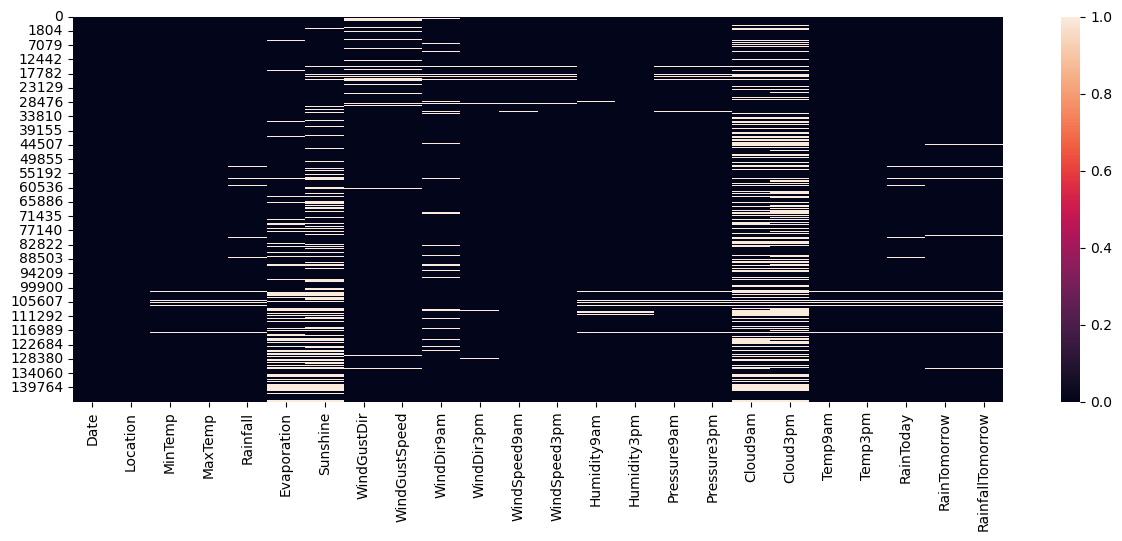

In [17]:
# Visualización de los nulos en una sección del dataframe
fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(df.isnull())

In [18]:
#Cantidad de nulos por Location
#Contamos la cantidad de valores nulos en cada Location y crea un nuevo DataFrame 
#En el nuevo DataFrame contine la Location y el total de valores nulos ("Total_Nulos") para cada grupo de ubicación en el DataFrame original
null_counts_country = df.groupby('Location').apply(lambda x: x.isna().sum().sum()).reset_index(name='Total_Nulos')
print(null_counts_country)

           Location  Total_Nulos
0          Adelaide        10091
1          Canberra         8375
2             Cobar         4057
3          Dartmoor         8909
4         Melbourne         9126
5  MelbourneAirport          106
6      MountGambier         1373
7            Sydney         3525
8     SydneyAirport          220


In [19]:
# Vamos a fusionar Sydney y Melbourne con sus aeropuertos, considerando que esto va a reducir los datos nulos.
df = df.sort_values(by='Date', ignore_index=True)
df_Sydney = df[(df["Location"]=="Sydney")]
df_aSydney = df[(df["Location"]=="SydneyAirport")]
df_Melbourne = df[(df["Location"]=="Melbourne")]
df_AMelbourne = df[(df["Location"]=="MelbourneAirport")]

# Hacemos un join outer sobre "Date" para mantener todos los registros
df_s = df_Sydney.merge(df_aSydney, on='Date', how='outer', suffixes=('', '_ASydney'))
df_m = df_Melbourne.merge(df_AMelbourne, on='Date', how='outer', suffixes=('', '_AMelbourne'))

# Eliminamos la columna Location_Aeropuerto que no necesitamos, y llenamos las vacías con lo que corresponda para cada ciudad
# (en caso de que el registro haya existido en el aeropuerto, y no en la ciudad)
df_s.drop("Location_ASydney", axis=1, inplace=True)
df_m.drop("Location_AMelbourne", axis=1, inplace=True)
df_s["Location"] = "Sydney"
df_m["Location"] = "Melbourne"

In [20]:
# Generamos una lista de columnas numéricas y categóricas que tiene sentido ser completadas con los valores de los aeropuertos.
columnas_numericas = ['MinTemp', 'MaxTemp','Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm', "Rainfall", 'RainfallTomorrow', "WindGustSpeed","WindSpeed9am","WindSpeed3pm"]
columnas_categoricas = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


# Completamos nulos para esas columnas, y a su vez las eliminamos
for columna in columnas_numericas+columnas_categoricas:
    columna_as = columna+"_ASydney"
    columna_am = columna+"_AMelbourne"
    df_s[columna] = df_s[columna].fillna(df_s[columna_as])
    df_m[columna] = df_m[columna].fillna(df_m[columna_am])
    df_s.drop(columna_as, axis=1, inplace=True)
    df_m.drop(columna_am, axis=1, inplace=True)


# Chequeemos que no rompimos nada a nivel columnas
print(df_m.shape[1] == df_s.shape[1])
print(df.shape[1] == df_s.shape[1])
#print(df_m.head())

print("Tamaño pre-mergeo: "+str(df.shape))
# Generemos el nuevo dataframe
df_without_sydney_melbourne = df[(df["Location"]!="Sydney")&(df["Location"]!="SydneyAirport")&(df["Location"]!="Melbourne")&(df["Location"]!="MelbourneAirport")]
df = pd.concat([df_without_sydney_melbourne, df_s, df_m], ignore_index=True)
print("Tamaño post-mergeo: "+str(df.shape))

# Mejoramos un poco los porcentajes?
porcentaje_nulos_2 = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas_2 = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres_2 = pd.DataFrame({'Nombre de columna': porcentaje_nulos_2.index, 'Porcentaje de nulos': porcentaje_nulos_2.values})

print("Nulos, por ciudad, pre mergeo con aeropuertos: ")
print(null_counts_country)
null_counts_country = df.groupby('Location').apply(lambda x: x.isna().sum().sum()).reset_index(name='Total_Nulos')
print("Nulos, por ciudad, post mergeo con aeropuertos: ")
print(null_counts_country)


True
True
Tamaño pre-mergeo: (28233, 24)
Tamaño post-mergeo: (22217, 24)
Nulos, por ciudad, pre mergeo con aeropuertos: 
           Location  Total_Nulos
0          Adelaide        10091
1          Canberra         8375
2             Cobar         4057
3          Dartmoor         8909
4         Melbourne         9126
5  MelbourneAirport          106
6      MountGambier         1373
7            Sydney         3525
8     SydneyAirport          220
Nulos, por ciudad, post mergeo con aeropuertos: 
       Location  Total_Nulos
0      Adelaide        10091
1      Canberra         8375
2         Cobar         4057
3      Dartmoor         8909
4     Melbourne           80
5  MountGambier         1373
6        Sydney          808


## Transformación de variables categóricas

In [21]:
# Veamos sobre cuál hacer one hot encoding
columnas_object = df.select_dtypes(include=['object'])
print(columnas_object)

        Location WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0       Canberra          NW         SW         NW        No          Yes
1       Canberra         ENE          E          W       Yes          Yes
2       Canberra          NW          N        NNE       Yes          Yes
3       Canberra          NW        WNW          W       Yes          Yes
4       Canberra         SSE        SSE        ESE       Yes           No
...          ...         ...        ...        ...       ...          ...
22212  Melbourne           N        NNE          N        No           No
22213  Melbourne         NNW          W          S        No           No
22214  Melbourne           N        NNE          N        No           No
22215  Melbourne         NNW          N          N        No          Yes
22216  Melbourne          SW        WNW          S       Yes           No

[22217 rows x 6 columns]


In [22]:
# Elegimos estas:
palabrasObject = ["Location",  "RainToday", "RainTomorrow"]
df = pd.get_dummies(df, columns = palabrasObject, drop_first=True, dtype=int)
print(df)

            Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2007-11-01      8.0     24.3       0.0          3.4       6.3   
1     2007-11-02     14.0     26.9       3.6          4.4       9.7   
2     2007-11-03     13.7     23.4       3.6          5.8       3.3   
3     2007-11-04     13.3     15.5      39.8          7.2       9.1   
4     2007-11-05      7.6     16.1       2.8          5.6      10.6   
...          ...      ...      ...       ...          ...       ...   
22212 2017-06-20      6.4     15.8       0.0          2.4       8.8   
22213 2017-06-21      7.8     13.5       0.6          0.6       0.0   
22214 2017-06-22      6.7     14.1       0.2          0.6       0.0   
22215 2017-06-23      7.4     14.9       0.0          1.6       6.0   
22216 2017-06-24      8.3     12.3       1.4          1.8       5.6   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Temp3pm  \
0              NW           30.0         SW         NW  ...     23.6   
1  

In [23]:
# Si imaginamos los puntos cardinales sobre un eje cartesiano, podemos codificar cada punto como un ángulo (polar).
# Codifiquemos: ["WindGustDir", "WindDir9am", "WindDir3pm"]
gust = list(df["WindGustDir"].unique())
am = list(df["WindDir9am"].unique())
pm = list(df["WindDir3pm"].unique())

values = ['NW', 'ENE', 'SSE', 'SE', 'E', 'S', 'N', 'WNW', 'ESE', 'NE', 'NNE', 'NNW', 'SW', 'W', 'WSW', 'SSW']
codes = [315, 67.5, 157.5, 135, 90, 180, 0, 292.5, 112.5, 45, 22.5, 337.5, 225, 270, 247.5, 202.5]
wind_coded = pd.DataFrame({'value': values, 'code': codes})

# Reemplazar los valores originales por los codificados
for columna in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    df[columna] = df[columna].replace(dict(zip(wind_coded['value'], wind_coded['code'])))

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22217 entries, 0 to 22216
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   22217 non-null  datetime64[ns]
 1   MinTemp                22132 non-null  float64       
 2   MaxTemp                22142 non-null  float64       
 3   Rainfall               22000 non-null  float64       
 4   Evaporation            17913 non-null  float64       
 5   Sunshine               15521 non-null  float64       
 6   WindGustDir            21316 non-null  float64       
 7   WindGustSpeed          21319 non-null  float64       
 8   WindDir9am             20678 non-null  float64       
 9   WindDir3pm             21830 non-null  float64       
 10  WindSpeed9am           21889 non-null  float64       
 11  WindSpeed3pm           21900 non-null  float64       
 12  Humidity9am            21784 non-null  float64       
 13  H

In [24]:
"""
# Transformemos las fechas
df['Date'] = pd.to_datetime(df['Date'])
df['Ano'] = df['Date'].dt.year
df['Mes'] = df['Date'].dt.month
df['Dia'] = df['Date'].dt.day
df['Dia_Semana'] = df['Date'].dt.day_of_week
# Eliminamos la fecha del df
df.drop(columns= "Date", inplace=True, axis= 1)
anios = df.Ano.unique() 
print(f"Cantidad de años que tenemos datos: {len(anios)}. Estos son: {anios}",) """

# Cambiamos de enfoque porque consideramos necesario capturar con los datos "lo cíclico" de un año y los patrones
# propios de las estaciones del año.

# Convertimos la columna 'fecha' al tipo datetime si aún no lo está
df['Date'] = pd.to_datetime(df['Date'])

# Extraemos el día del año (1 a 365)
df['dia'] = df['Date'].dt.dayofyear

# Calculamos la característica trigonométrica (solo el seno)
df['dia'] = np.sin(2 * np.pi * df['dia'] / 365)

# Agregamos el año como una característica adicional
df['año'] = df['Date'].dt.year

#df.drop("Date", axis=1, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22217 entries, 0 to 22216
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   22217 non-null  datetime64[ns]
 1   MinTemp                22132 non-null  float64       
 2   MaxTemp                22142 non-null  float64       
 3   Rainfall               22000 non-null  float64       
 4   Evaporation            17913 non-null  float64       
 5   Sunshine               15521 non-null  float64       
 6   WindGustDir            21316 non-null  float64       
 7   WindGustSpeed          21319 non-null  float64       
 8   WindDir9am             20678 non-null  float64       
 9   WindDir3pm             21830 non-null  float64       
 10  WindSpeed9am           21889 non-null  float64       
 11  WindSpeed3pm           21900 non-null  float64       
 12  Humidity9am            21784 non-null  float64       
 13  H

In [25]:
"""
# A continuación creamos una función que busca en el dataset las tempraturas del día anterior y
# del día posterior a este, y sino, del año anterior y posterior,
# y devuelve un promedio del par que corresponda.
#print(df)
def promedio(fech, location, data, columna):
    fecha = pd.to_datetime(fech)
    fecha_anio_anterior = (fecha - pd.DateOffset(years=1)).strftime('%Y-%m-%d')
    fecha_anio_posterior = (fecha + pd.DateOffset(years=1)).strftime('%Y-%m-%d')
    fecha_dia_desp = (fecha + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    fecha_dia_ant = (fecha - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    
    x1 = data[(data['Date'] == fecha_dia_desp) & (data["Location"]==location)][columna]
    x2 = data[(data['Date'] == fecha_dia_ant) & (data["Location"]==location)][columna]
    x3 = data[(data['Date'] == fecha_anio_anterior) & (data["Location"]==location)][columna]
    x4 = data[(data['Date'] == fecha_anio_posterior) & (data["Location"]==location)][columna]

    datos1 = [df.iloc[0] for df in [x1, x2] if df.shape[0] != 0]
    datos2 = [df.iloc[0] for df in [x3, x4] if df.shape[0] != 0]

    # Si no hay dataframes no nulos, devolver None
    if len(datos1) == 0:
        if len(datos2) == 0:
            return None
        else:
            promedio = sum(datos2)/len(datos2)
            return promedio
    else:
        promedio = sum(datos1)/len(datos1)
        return promedio

z = promedio("2009-01-01", "Cobar", df, "MinTemp")
print(z)
"""

'\n# A continuación creamos una función que busca en el dataset las tempraturas del día anterior y\n# del día posterior a este, y sino, del año anterior y posterior,\n# y devuelve un promedio del par que corresponda.\n#print(df)\ndef promedio(fech, location, data, columna):\n    fecha = pd.to_datetime(fech)\n    fecha_anio_anterior = (fecha - pd.DateOffset(years=1)).strftime(\'%Y-%m-%d\')\n    fecha_anio_posterior = (fecha + pd.DateOffset(years=1)).strftime(\'%Y-%m-%d\')\n    fecha_dia_desp = (fecha + pd.DateOffset(days=1)).strftime(\'%Y-%m-%d\')\n    fecha_dia_ant = (fecha - pd.DateOffset(days=1)).strftime(\'%Y-%m-%d\')\n    \n    x1 = data[(data[\'Date\'] == fecha_dia_desp) & (data["Location"]==location)][columna]\n    x2 = data[(data[\'Date\'] == fecha_dia_ant) & (data["Location"]==location)][columna]\n    x3 = data[(data[\'Date\'] == fecha_anio_anterior) & (data["Location"]==location)][columna]\n    x4 = data[(data[\'Date\'] == fecha_anio_posterior) & (data["Location"]==location)][

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22217 entries, 0 to 22216
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   22217 non-null  datetime64[ns]
 1   MinTemp                22132 non-null  float64       
 2   MaxTemp                22142 non-null  float64       
 3   Rainfall               22000 non-null  float64       
 4   Evaporation            17913 non-null  float64       
 5   Sunshine               15521 non-null  float64       
 6   WindGustDir            21316 non-null  float64       
 7   WindGustSpeed          21319 non-null  float64       
 8   WindDir9am             20678 non-null  float64       
 9   WindDir3pm             21830 non-null  float64       
 10  WindSpeed9am           21889 non-null  float64       
 11  WindSpeed3pm           21900 non-null  float64       
 12  Humidity9am            21784 non-null  float64       
 13  H

In [27]:
# Volvamos a estos porcentajes, y cómo mejorarlos
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
print(porcentaje_nulos_con_nombres)

        Nombre de columna  Porcentaje de nulos
0                    Date                 0.00
1                 MinTemp                 0.38
2                 MaxTemp                 0.34
3                Rainfall                 0.98
4             Evaporation                19.37
5                Sunshine                30.14
6             WindGustDir                 4.06
7           WindGustSpeed                 4.04
8              WindDir9am                 6.93
9              WindDir3pm                 1.74
10           WindSpeed9am                 1.48
11           WindSpeed3pm                 1.43
12            Humidity9am                 1.95
13            Humidity3pm                 1.70
14            Pressure9am                 1.49
15            Pressure3pm                 1.46
16               Cloud9am                34.95
17               Cloud3pm                35.47
18                Temp9am                 0.44
19                Temp3pm                 0.39
20       Rain

A continuación rellenamos valores faltantes con los alguno de los tres días anteriores, o con el dato del año anterior o sus respectivos tres días anteriores, entendiendo que el mejor escenario es datos del corriente año, y no del anterior.

<Axes: >

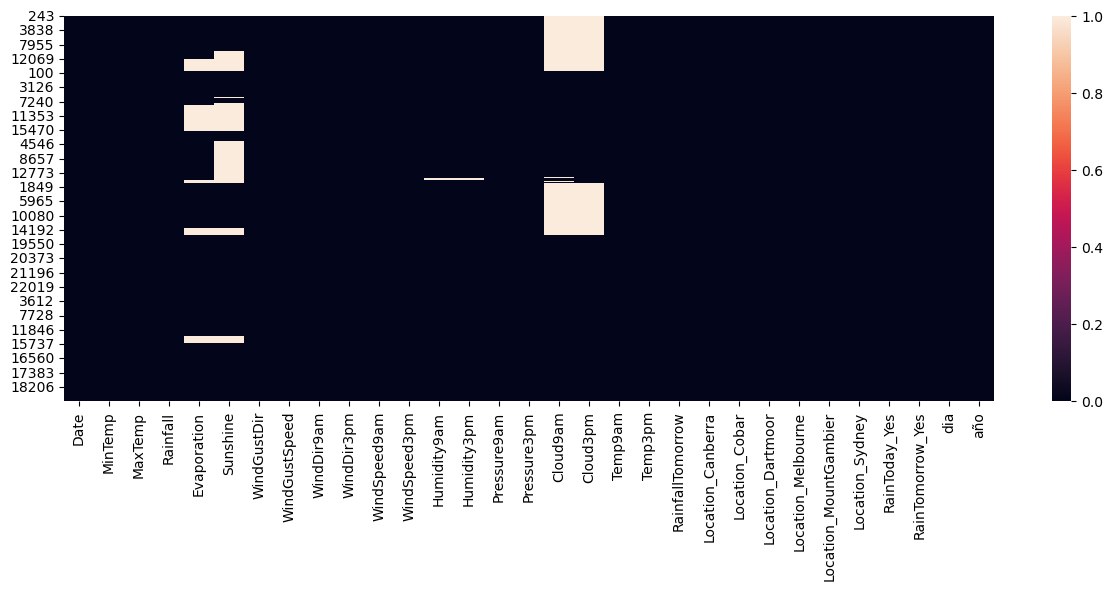

In [28]:
cities = ['Location_Canberra', 'Location_Cobar', 'Location_Dartmoor', 'Location_Melbourne', 'Location_MountGambier', 'Location_Sydney']
df_canberra = df[df["Location_Canberra"]==1]
df_cobar = df[df["Location_Cobar"]==1]
df_dartmoor = df[df["Location_Dartmoor"]==1]
df_melbourne = df[df["Location_Melbourne"]==1]
df_mountgambier = df[df["Location_MountGambier"]==1]
df_sydney = df[df["Location_Sydney"]==1]
df_adelaide = df[(df["Location_Canberra"]==0)&(df["Location_Cobar"]==0)&(df["Location_Dartmoor"]==0)&(df["Location_Melbourne"]==0)&(df["Location_MountGambier"]==0)&(df["Location_Sydney"]==0)]

df_cities = [df_adelaide,df_canberra, df_cobar, df_dartmoor, df_melbourne, df_mountgambier, df_sydney]

for city in df_cities:
    for variable in list(df.columns):
        # Rellenamos los valores nulos con el valor de los tres días anteriores (de este año o el anterior)
        # si existen (pues el df está ordenado por fecha)
        city[variable] = city[variable].fillna(city[variable].shift(-1))
        city[variable] = city[variable].fillna(city[variable].shift(-2))
        city[variable] = city[variable].fillna(city[variable].shift(-3))

        city[variable] = city[variable].fillna(city[variable].shift(-365))
        city[variable] = city[variable].fillna(city[variable].shift(-365-1))
        city[variable] = city[variable].fillna(city[variable].shift(-365-2))
        city[variable] = city[variable].fillna(city[variable].shift(-365-3))
df = pd.concat(df_cities)

fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(df.isnull())


In [29]:
# Porcentajes
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
print(porcentaje_nulos_con_nombres)

        Nombre de columna  Porcentaje de nulos
0                    Date                 0.00
1                 MinTemp                 0.00
2                 MaxTemp                 0.00
3                Rainfall                 0.00
4             Evaporation                14.29
5                Sunshine                27.38
6             WindGustDir                 0.00
7           WindGustSpeed                 0.00
8              WindDir9am                 0.00
9              WindDir3pm                 0.00
10           WindSpeed9am                 0.00
11           WindSpeed3pm                 0.00
12            Humidity9am                 0.46
13            Humidity3pm                 0.47
14            Pressure9am                 0.00
15            Pressure3pm                 0.00
16               Cloud9am                28.20
17               Cloud3pm                28.05
18                Temp9am                 0.00
19                Temp3pm                 0.00
20       Rain

In [30]:
df_training = df.head(17779)
print(df_training.tail(1))

            Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
10203 2014-06-25      9.8     15.4       7.0          0.8       3.4   

       WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
10203        315.0           72.0       270.0       315.0  ...   

       Location_Canberra  Location_Cobar  Location_Dartmoor  \
10203                  0               0                  0   

       Location_Melbourne  Location_MountGambier  Location_Sydney  \
10203                   0                      1                0   

       RainToday_Yes  RainTomorrow_Yes       dia   año  
10203              1                 1  0.111659  2014  

[1 rows x 31 columns]


<Axes: >

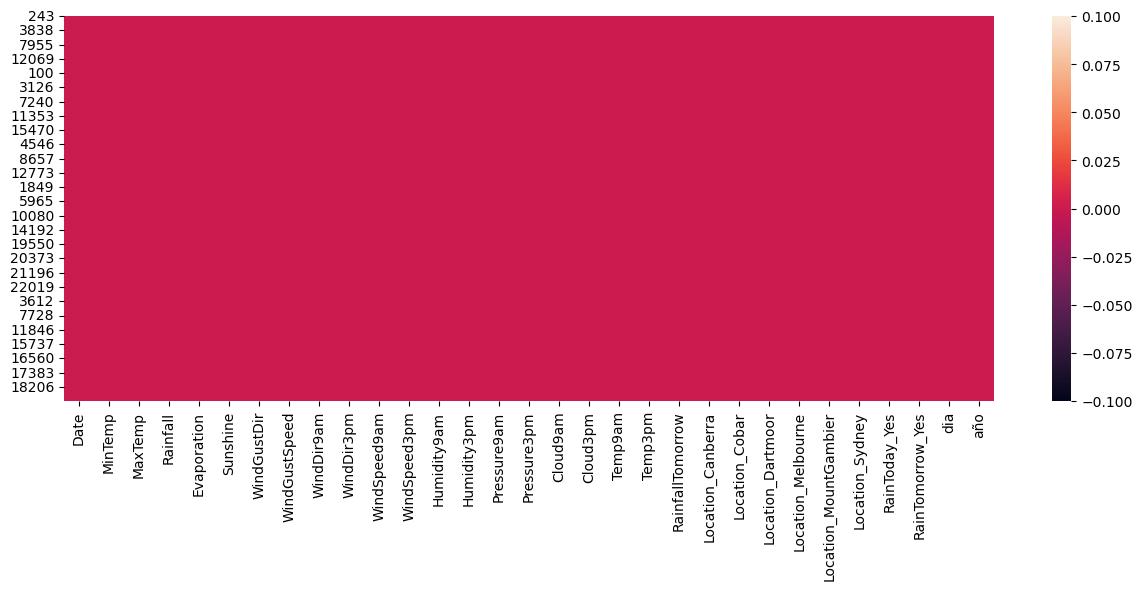

In [31]:
# Terminemos de completar faltantes con la mediana de los datos de entrenamiento, discriminando por ciudad
t_df_canberra = df_training[df_training["Location_Canberra"]==1]
t_df_cobar = df_training[df_training["Location_Cobar"]==1]
t_df_dartmoor = df_training[df_training["Location_Dartmoor"]==1]
t_df_melbourne = df_training[df_training["Location_Melbourne"]==1]
t_df_mountgambier = df_training[df_training["Location_MountGambier"]==1]
t_df_sydney = df_training[df_training["Location_Sydney"]==1]
t_df_adelaide = df_training[(df_training["Location_Canberra"]==0)&(df_training["Location_Cobar"]==0)&(df_training["Location_Dartmoor"]==0)&(df_training["Location_Melbourne"]==0)&(df_training["Location_MountGambier"]==0)&(df_training["Location_Sydney"]==0)]
t_df_cities = [t_df_adelaide,t_df_canberra,t_df_cobar,t_df_dartmoor,t_df_melbourne,t_df_mountgambier,t_df_sydney]

df_canberra = df[df["Location_Canberra"]==1]
df_cobar = df[df["Location_Cobar"]==1]
df_dartmoor = df[df["Location_Dartmoor"]==1]
df_melbourne = df[df["Location_Melbourne"]==1]
df_mountgambier = df[df["Location_MountGambier"]==1]
df_sydney = df[df["Location_Sydney"]==1]
df_adelaide = df[(df["Location_Canberra"]==0)&(df["Location_Cobar"]==0)&(df["Location_Dartmoor"]==0)&(df["Location_Melbourne"]==0)&(df["Location_MountGambier"]==0)&(df["Location_Sydney"]==0)]
df_cities = [df_adelaide,df_canberra, df_cobar, df_dartmoor, df_melbourne, df_mountgambier, df_sydney]

columns = ["WindGustDir", "WindGustSpeed", "WindDir9am", "Evaporation", "Humidity9am", "Humidity3pm", "Sunshine", "Cloud9am", "Cloud3pm"]

for i in range(len(df_cities)):
    for variable in columns:
        mediana = t_df_cities[i][variable].median()
        promedio_total = df_training[variable].mean()
        df_cities[i][variable].fillna(mediana, inplace=True)
        df_cities[i][variable].fillna(promedio_total, inplace=True)

df = pd.concat(df_cities)

fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(df.isnull())

In [32]:
# Porcentajes finales
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
print(porcentaje_nulos_con_nombres)

        Nombre de columna  Porcentaje de nulos
0                    Date                  0.0
1                 MinTemp                  0.0
2                 MaxTemp                  0.0
3                Rainfall                  0.0
4             Evaporation                  0.0
5                Sunshine                  0.0
6             WindGustDir                  0.0
7           WindGustSpeed                  0.0
8              WindDir9am                  0.0
9              WindDir3pm                  0.0
10           WindSpeed9am                  0.0
11           WindSpeed3pm                  0.0
12            Humidity9am                  0.0
13            Humidity3pm                  0.0
14            Pressure9am                  0.0
15            Pressure3pm                  0.0
16               Cloud9am                  0.0
17               Cloud3pm                  0.0
18                Temp9am                  0.0
19                Temp3pm                  0.0
20       Rain

## Matriz de Correlación

Con el fin de identificar patrones de correlación en los datos, calculamos la matriz de corrlación entre todas las columnas del df.
Vale aclarar que el coeficiente de correlación lo aplicamos entre la columna 'RainfallTomorrow' y las restantes columnas.
En este caso vamos analizar lo siguiente:
- Si el coeficiente de correlación es cercano a 1, indica una correlación positiva fuerte, lo que significa que a medida que una variable aumenta, la otra también tiende a aumentar.
- Si el coeficiente de correlación es cercano a -1, indica una correlación negativa fuerte, lo que significa que a medida que una variable aumenta, la otra tiende a disminuir.
- Si el coeficiente de correlación es cercano a 0, indica que no hay una correlación lineal fuerte entre las dos variables.

In [33]:
# Matriz de correlación entre todas las columnas y RainTomorrow_Yes
# Eliminamos las columnas que no vamos a predecir con el modelo de regresión
df_regresion = df.drop(columns = ["RainToday_Yes", "RainTomorrow_Yes"], axis= 1)
print(df_regresion.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22217 entries, 243 to 19024
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   22217 non-null  datetime64[ns]
 1   MinTemp                22217 non-null  float64       
 2   MaxTemp                22217 non-null  float64       
 3   Rainfall               22217 non-null  float64       
 4   Evaporation            22217 non-null  float64       
 5   Sunshine               22217 non-null  float64       
 6   WindGustDir            22217 non-null  float64       
 7   WindGustSpeed          22217 non-null  float64       
 8   WindDir9am             22217 non-null  float64       
 9   WindDir3pm             22217 non-null  float64       
 10  WindSpeed9am           22217 non-null  float64       
 11  WindSpeed3pm           22217 non-null  float64       
 12  Humidity9am            22217 non-null  float64       
 13  Humi

* Entrenaremos nuestro modelo sin distinguir por ciudad, ya que la muestra que tomamos son de ciudades que pertenecen a la misma categoría climática de la clasificación Köppen-Geiger*

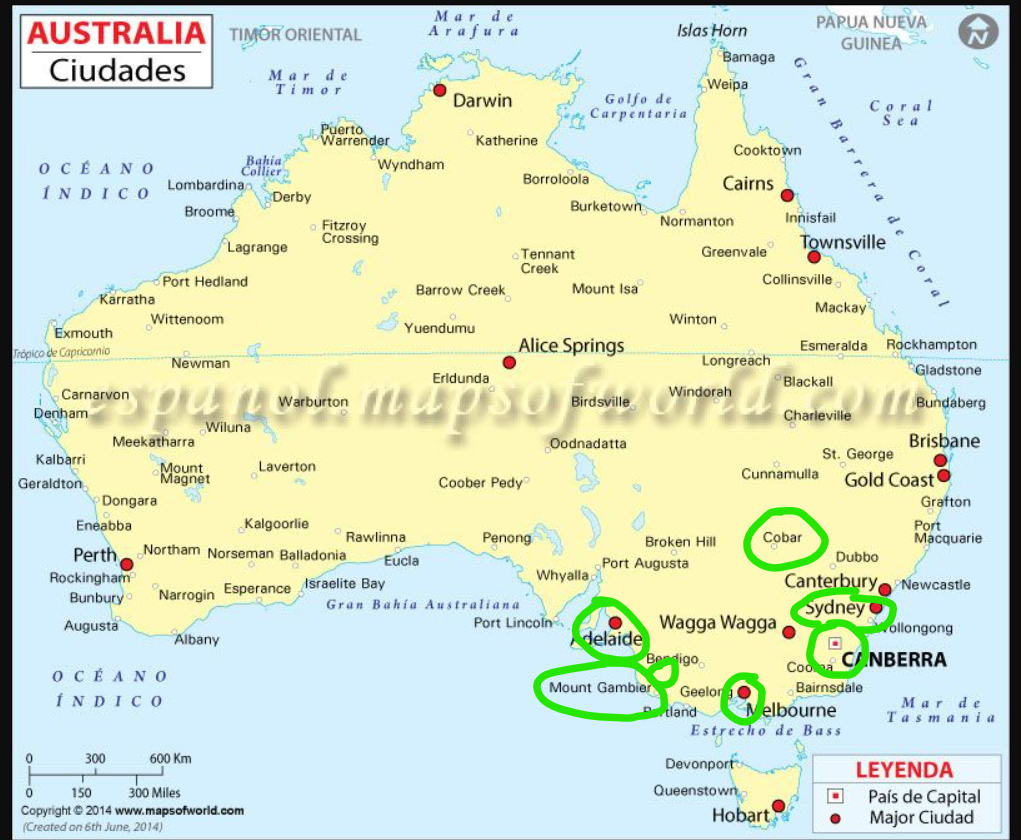
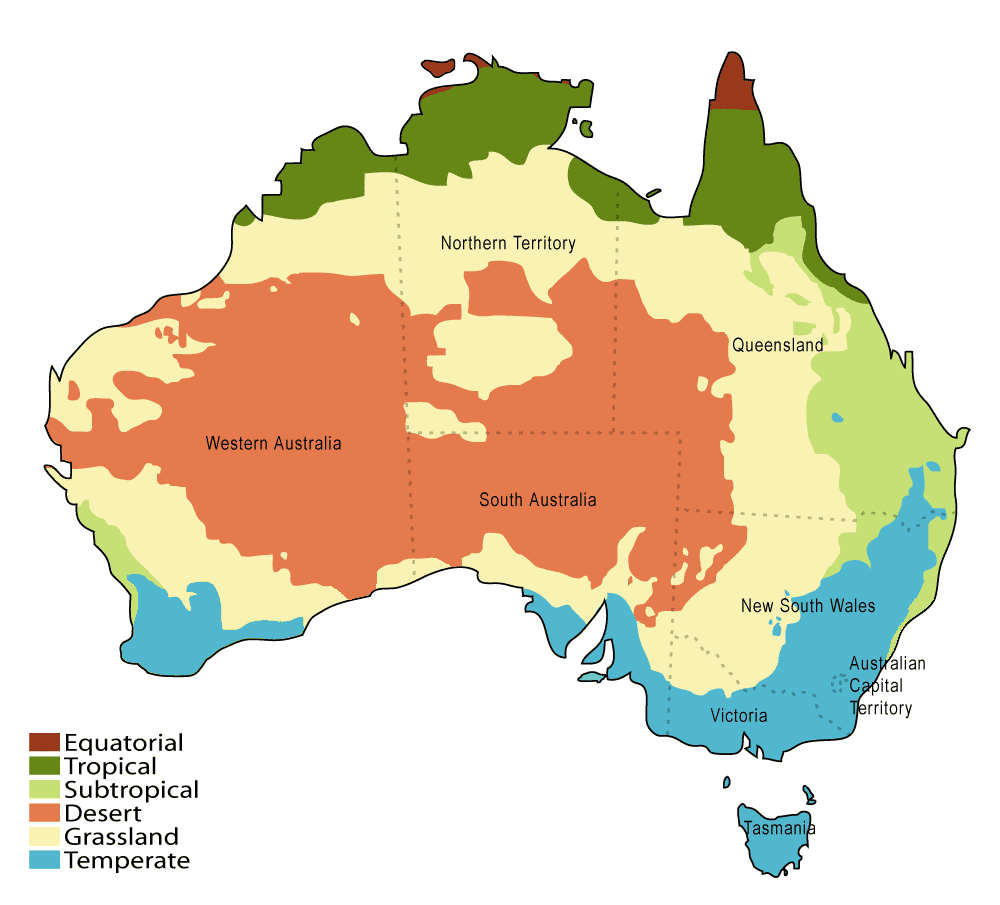

In [34]:
todas_las_columnas = list(df_regresion.columns)
columnas = []
for i in todas_las_columnas:
    if "Location" not in i:
        columnas.append(i)

# Hacemos esto para que RainfallTomorrow quede primera y mejorar la visualización
columnas.remove("RainfallTomorrow")
columnas = ["RainfallTomorrow"] + columnas
corr = df_regresion[columnas].corr()
corr.style.background_gradient(cmap = 'coolwarm')

In [35]:
corr = df_regresion[columnas].corr()

# Calculamos los coeficientes de correlación en valor absoluto
corr_abs = corr.abs()

# Ordenamos los coeficientes de correlación en valor absoluto
corr_with_target_abs = corr_abs["RainfallTomorrow"].sort_values(ascending=False)
order = corr_with_target_abs.index

# Obtenemos las top 10 variables con mayor aporte
top_10_variables = order[1:11]  # Excluimos la variable "RainfallTomorrow" en sí misma

features = top_10_variables.tolist()
print('Variables con mayor correlación a RainfallTomorrow')
print(features)

Variables con mayor correlación a RainfallTomorrow
['Humidity3pm', 'Sunshine', 'Rainfall', 'Cloud3pm', 'WindGustSpeed', 'Pressure3pm', 'Pressure9am', 'Cloud9am', 'Humidity9am', 'Temp3pm']


Armamos un nuevo data set que solo contiene a esas columnas

In [36]:
df_regresion = df_regresion.sort_values(by='Date', ignore_index=True)
data_new = df_regresion[features]


Separamos nuestro dataset en la variable independiente y las variables dependientes.
La variable dependiente es 'RailfallTomorrow' y las variables dependientes todas las demás columnas.

In [37]:
X = data_new
y = df_regresion['RainfallTomorrow']
print(y.head())

0     3.6
1     3.6
2    39.8
3     2.8
4     0.0
Name: RainfallTomorrow, dtype: float64


In [38]:
#¿Cuántas columnas tiene X? Es decir, ¿cuántas variables independientes tenemos?
len(X.columns)

10

In [39]:
X_train = X.iloc[:17778]
X_test = X.iloc[17778:]
y_train = y.iloc[:17778]
y_test = y.iloc[17778:]

In [40]:
X_train.shape

(17778, 10)

In [41]:
y_train.shape

(17778,)

In [42]:
X_train.columns

Index(['Humidity3pm', 'Sunshine', 'Rainfall', 'Cloud3pm', 'WindGustSpeed',
       'Pressure3pm', 'Pressure9am', 'Cloud9am', 'Humidity9am', 'Temp3pm'],
      dtype='object')

In [43]:
print(X_train.info())
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17778 entries, 0 to 17777
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Humidity3pm    17778 non-null  float64
 1   Sunshine       17778 non-null  float64
 2   Rainfall       17778 non-null  float64
 3   Cloud3pm       17778 non-null  float64
 4   WindGustSpeed  17778 non-null  float64
 5   Pressure3pm    17778 non-null  float64
 6   Pressure9am    17778 non-null  float64
 7   Cloud9am       17778 non-null  float64
 8   Humidity9am    17778 non-null  float64
 9   Temp3pm        17778 non-null  float64
dtypes: float64(10)
memory usage: 1.4 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 17778 entries, 0 to 17777
Series name: RainfallTomorrow
Non-Null Count  Dtype  
--------------  -----  
17778 non-null  float64
dtypes: float64(1)
memory usage: 139.0 KB
None


# 4) Algoritmos de Regresión Lineal

## Regresión lineal

In [44]:
# Creación y entrenamiento del modelo
# La idea es estandarizar los datos para tener todo en la misma escala. Esto presenta muchas ventajas a la hora de regularizar. 
# lo que hacemos es una "tubería": vamos a escalar los datos y luego hacer una regresión lineal. Cuando fiteemos esta tubería, el fit se va a hacer tanto en el scaler como en la regresión lineal.
# a la hora de predecir datos, está bueno porque solo vamos a usar el método predict de la tubería y eso automáticamente va a usar el transform del scaler y el predict de la regresión lineal
# ahorra muchos pasos, estandariza los procesos, recomendamos su uso aunque NO es estrictamente necesario, simplemente pueden usar los componentes por separado.

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LinearRegression())

El método fit que se utiliza a continuación ajusta el modelo a los datos de entrenamiento, lo que significa que el modelo aprenderá de los ejemplos de entrenamiento y ajustará sus parámetros internos de manera que sea capaz de hacer predicciones en función de esos datos.

In [45]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [46]:
lr = model.fit(X_train, y_train)

In [47]:
model.steps[0]

('standardscaler', StandardScaler())

In [48]:
model.steps[1][1].n_features_in_

10

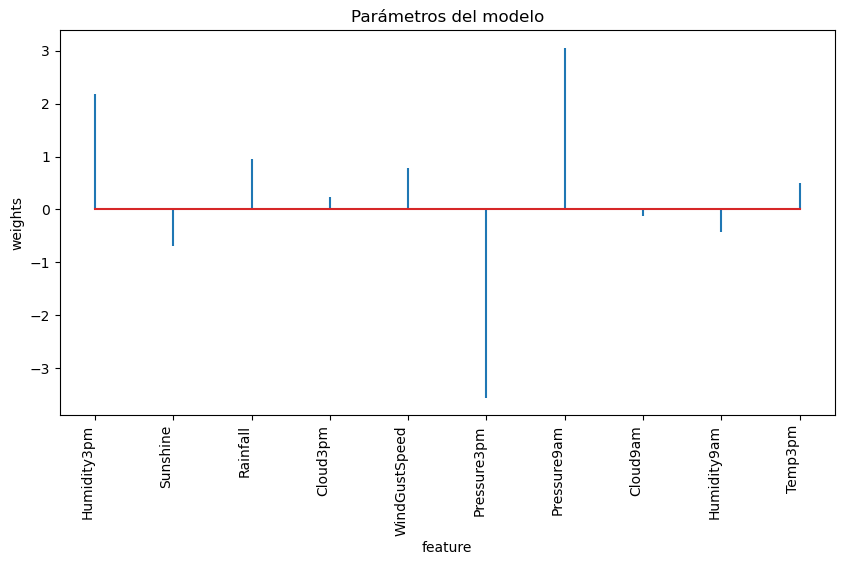

In [49]:
#Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': model.steps[1][1].coef_.flatten()})

fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()

In [50]:
df_coeficientes

predictor      coef
0    Humidity3pm  2.180656
1       Sunshine -0.690975
2       Rainfall  0.952494
3       Cloud3pm  0.241199
4  WindGustSpeed  0.780910
5    Pressure3pm -3.557834
6    Pressure9am  3.059606
7       Cloud9am -0.119792
8    Humidity9am -0.427344
9        Temp3pm  0.498453

En el gráfico de tallo anterior podemos ver como influyen las distintas características a las predicciones. Podemos observar que la variable que más impacto tiene es 'Preassure3pm', seguida por 'Preassure9am' y 'Pressure3pm

In [51]:
# Predicciones
y_pred = model.predict(X_test)
#predicciones = predicciones.flatten()
#predicciones[:10]
y_pred.shape, y_test.shape

((4439,), (4439,))

Calculamos algunas métricas para evaluar el modelo

In [52]:
# Error de test del modelo. Uso rmse para mantener la misma escala que la variable a predecir

rmse_ols = mean_squared_error(y_test, y_pred, squared = False)
print(f"El error (rmse) de test es: ",rmse_ols.round(4))
mse_ols = mean_squared_error(y_test, y_pred)
print(f"El error (mse) de test es: ",mse_ols.round(4))

El error (rmse) de test es:  5.5058
El error (mse) de test es:  30.3137


Un RMSE de 5.4174 indica que, en promedio, las predicciones del modelo están desviadas de los valores reales en el conjunto de prueba por alrededor de 5.4174 unidades en la misma escala que los valores objetivo, es decir mm. Esto significa que, en promedio, las predicciones del modelo tienden a estar a unos 5.4174 mm de distancia de las etiquetas reales. Que en contextos de lluvia es relativamente poco.

In [53]:
rl_R2 = metrics.r2_score(y_test, y_pred)
print('El coeficiente de regresión es: ',rl_R2)

El coeficiente de regresión es:  0.23846304735934243


Aproximadamente el 22% de la variabilidad de la variable dependiente puede ser explicada por la variabilidad de la variable independiente en un modelo de regresión.

Un R2 de 0.22 no es muy alto, lo que sugiere que el modelo no explica la mayoría de la variabilidad en la variable dependiente. Esto puede deberse a varias razones, como la falta de ajuste del modelo, la presencia de variables omitidas importantes, la presencia de errores de medición en los datos, entre otros factores.

Tambien calculamos esta métricas con los datos de train

In [54]:
# new
y_pred_2 = model.predict(X_train)
rl_R2_train = metrics.r2_score(y_train, y_pred_2)
rmse_ols_train = mean_squared_error(y_train, y_pred_2, squared = False)
print('Métricas de entrenamiento')
print(rl_R2_train, rmse_ols_train)

Métricas de entrenamiento
0.22119628415109338 5.281951609291106


In [55]:
(y_test - y_pred).shape

(4439,)

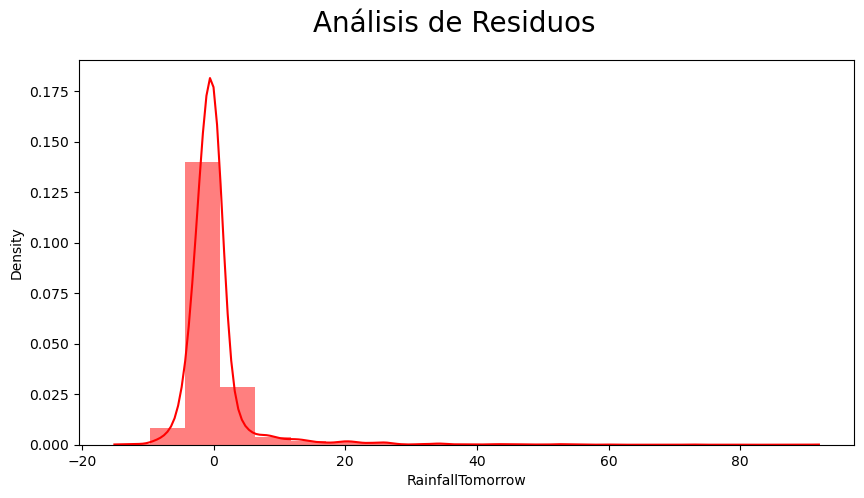

In [56]:
fig = plt.figure(figsize=(10,5))
  
sns.histplot((y_test - y_pred), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)    
plt.show()

Vemos que el histograma muestra una distribución asimétrica, con una cola larga a la derecha, puede indicar que el modelo no está capturando completamente la variabilidad en los datos. Esto puede sugerir que el modelo tiene sesgos o que hay patrones no lineales en los datos que no se están teniendo en cuenta.
De todos modos se puede observar que los residuos tienen una distribución alrededor de cero, lo que significa que, en promedio, no debería haber un sesgo sistemático en las predicciones del modelo.

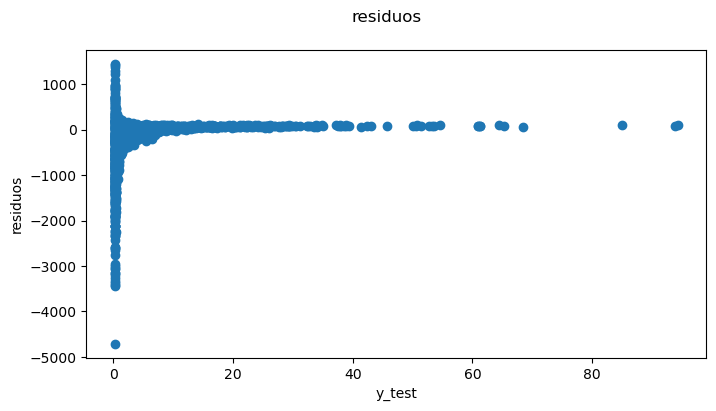

In [57]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('residuos')
plt.xlabel('y_test')
plt.ylabel('residuos')
plt.scatter(y_test,100*(y_test-y_pred)/y_test)
plt.show()

In [58]:
# Agregamos esta métrica para utilizar en redes neuronales
mse_linear_model=mean_squared_error(y_train, lr.predict(X_train))
mse_linear_model

27.8990128028929

## Ridge

In [59]:
# Creación y entrenamiento del modelo. Scikit-Learn usa Cross Validation para encontrar el valor óptimo de alpha
# (lambda en los desarrollos de teoría). Puede ser problemático con series de tiempo.

modelo = make_pipeline(StandardScaler(), 
                        RidgeCV(
                           alphas          = np.logspace(-10, 10, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

_ = modelo.fit(X_train, y_train)

In [60]:
ridge = modelo.fit(X_train, y_train)

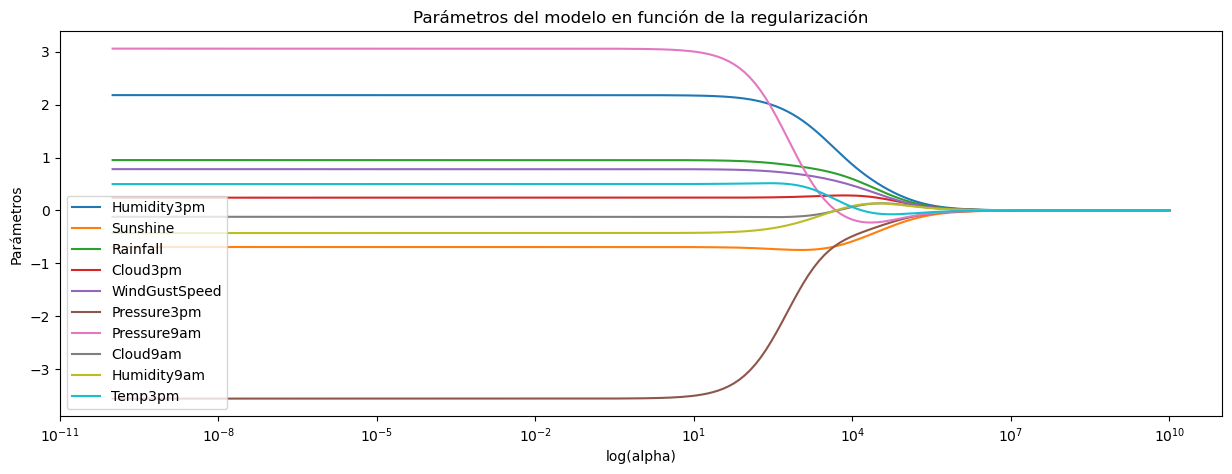

In [61]:
# Evolución de los parámetros en función de alpha

alphas = modelo.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

En el gráfico anterior podemos observar que a medida que alpha aumenta, la regularización se vuelve más fuerte, y los coeficientes tienden a disminuir hacia cero. Esto es una característica de Ridge, que ayuda a evitar el sobreajuste al penalizar coeficientes más grandes.

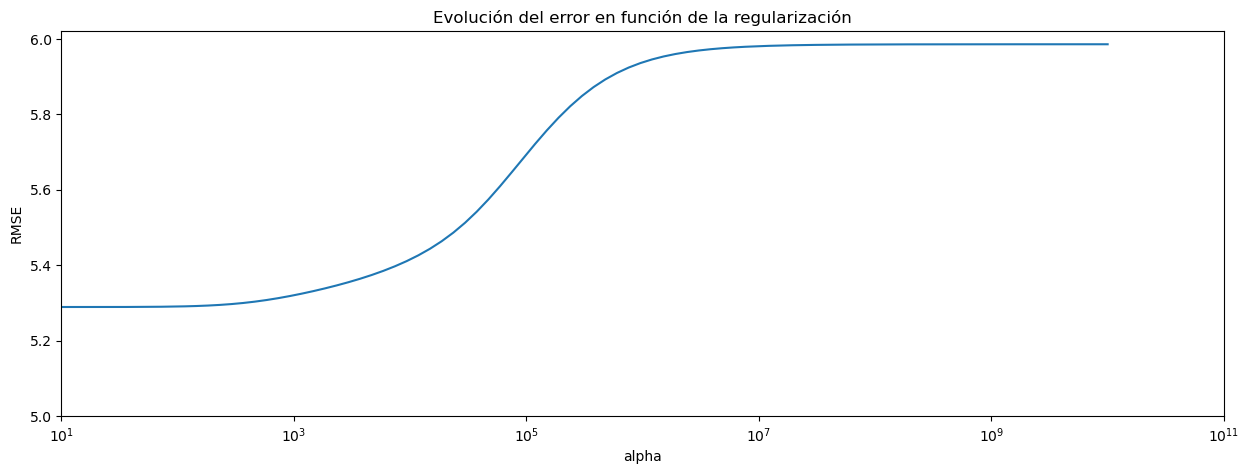

In [62]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mod = modelo.steps[1][1]

mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([5,None])
ax.set_xlim([10,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

A medida que alpha aumenta (la regularización se vuelve más fuerte), el RMSE de CV tiende a aumentar. Esto se debe a que la regularización penaliza coeficientes más grandes, lo que puede hacer que el modelo se ajuste menos a los datos de entrenamiento.

In [63]:
# Mejor valor alpha encontrado
alfa=mod.alpha_.round(4)
print(f"Mejor valor de alpha encontrado:", alfa)

Mejor valor de alpha encontrado: 2.8331


Este es el valor específico de alpha que minimiza el error (RMSE) en el conjunto de validación cruzada. Indica cuánta regularización se debe aplicar al modelo para obtener un equilibrio óptimo entre el ajuste a los datos y la capacidad de generalización.

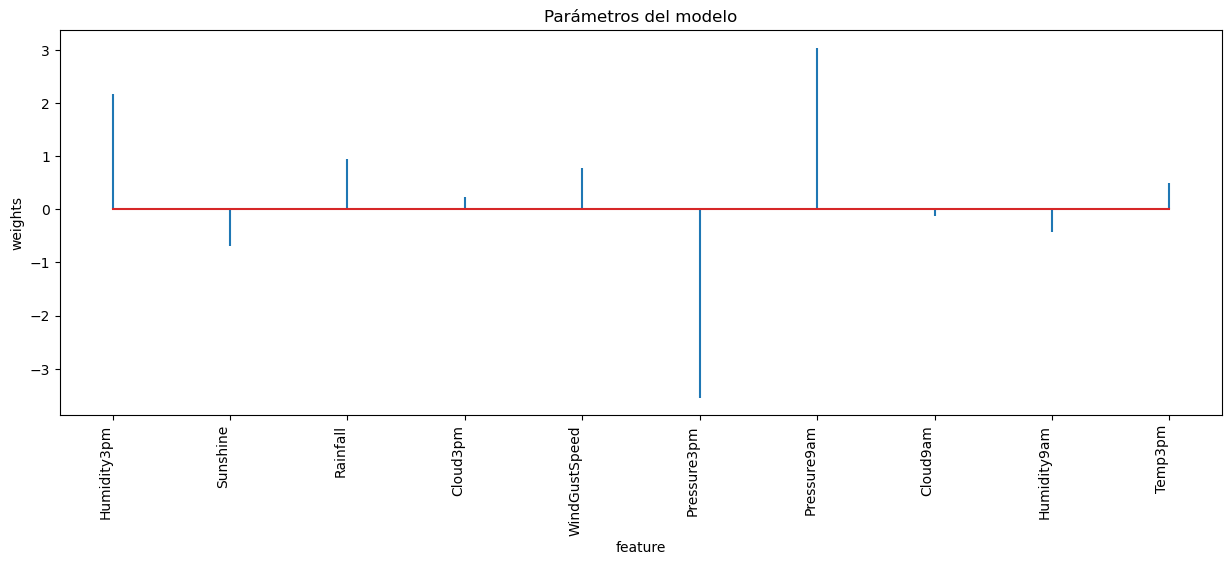

In [64]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

In [65]:
# Predicciones test
y_pred = modelo.predict(X_test)

In [66]:
# Error de test del modelo 

rmse_ridge = mean_squared_error(y_test,y_pred, squared = False)
mse_ridge = mean_squared_error(y_test,y_pred)


print("El error (rmse) de test es: ", rmse_ridge.round(4))
print("El error (rmse) de test es: ", mse_ridge.round(4))

El error (rmse) de test es:  5.5061
El error (rmse) de test es:  30.3171


El error (RMSE) de test es: 5.4175 significa que, en promedio, las predicciones del modelo Ridge están desviadas de los valores reales en el conjunto de prueba por alrededor de 5.4175 unidades en la misma escala que los valores objetivo. Esto sugiere que el modelo Ridge tiene un rendimiento muy similar al modelo de regresión lineal utilizado anteriormente.

In [67]:
ridge_R2 = metrics.r2_score(y_test, y_pred)
print("El coeficiente de regresión es de: ", ridge_R2)

El coeficiente de regresión es de:  0.2383769986594152


Dado que el R-cuadrado del modelo Ridge es muy similar al R-cuadrado del modelo de regresión lineal, parece que ambos modelos tienen un rendimiento bastante similar en términos de su capacidad para explicar la variabilidad en los datos.

In [68]:
# new
y_pred_2 = model.predict(X_train)
ridge_R2_train = metrics.r2_score(y_train, y_pred_2)
rmse_ridge_train = mean_squared_error(y_train, y_pred_2, squared = False)
print('Métricas de entrenamiento')
print(ridge_R2_train, rmse_ridge_train)

Métricas de entrenamiento
0.22119628415109338 5.281951609291106


## Lasso Regression

In [69]:
modelo = make_pipeline(StandardScaler(), 
                        LassoCV(
                           alphas=np.logspace(-10, 10, 200),
                           cv=10
                        )
         )

_ = modelo.fit(X_train, y_train)

In [70]:
lasso = modelo.fit(X_train, y_train)

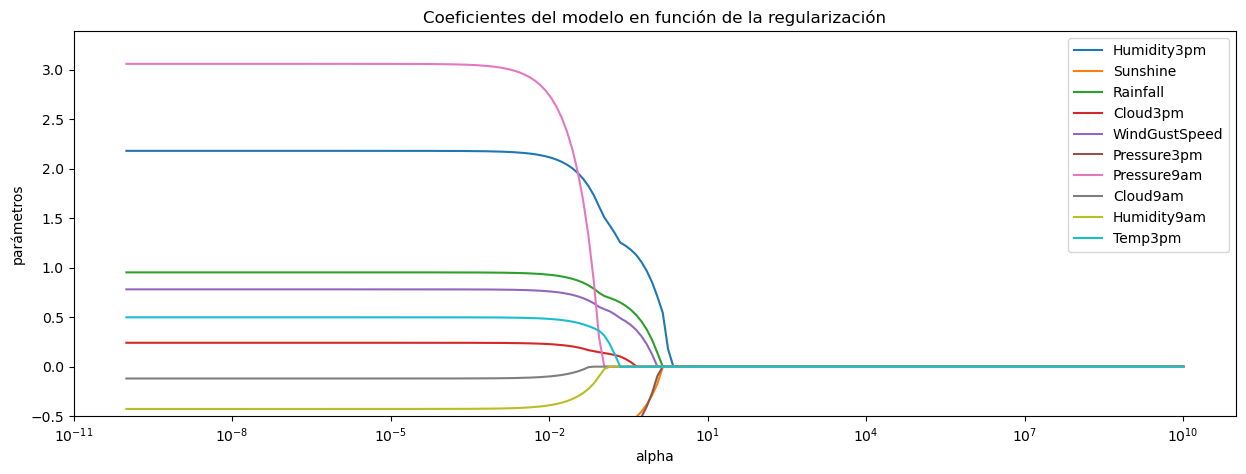

In [71]:
# Evolución de los parámetros en función de alpha

mod = modelo.steps[1][1]

alphas = mod.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

Text(0.5, 1.0, 'Features incluidas en función de la regularización')

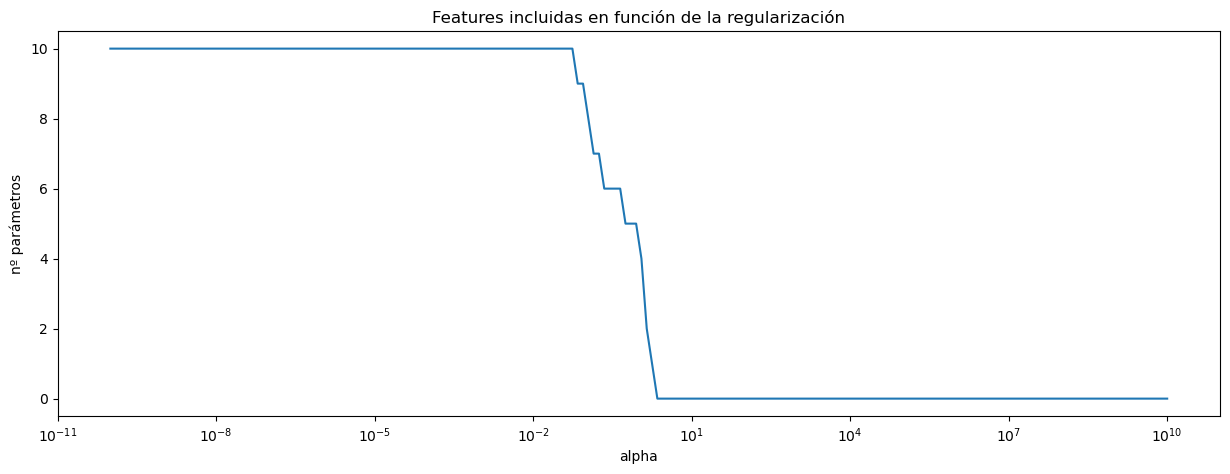

In [72]:
# Número de features incluidas (parámetros !=0) en función de alpha
alphas = mod.alphas_
n_predictores = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_aux.steps[1][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')

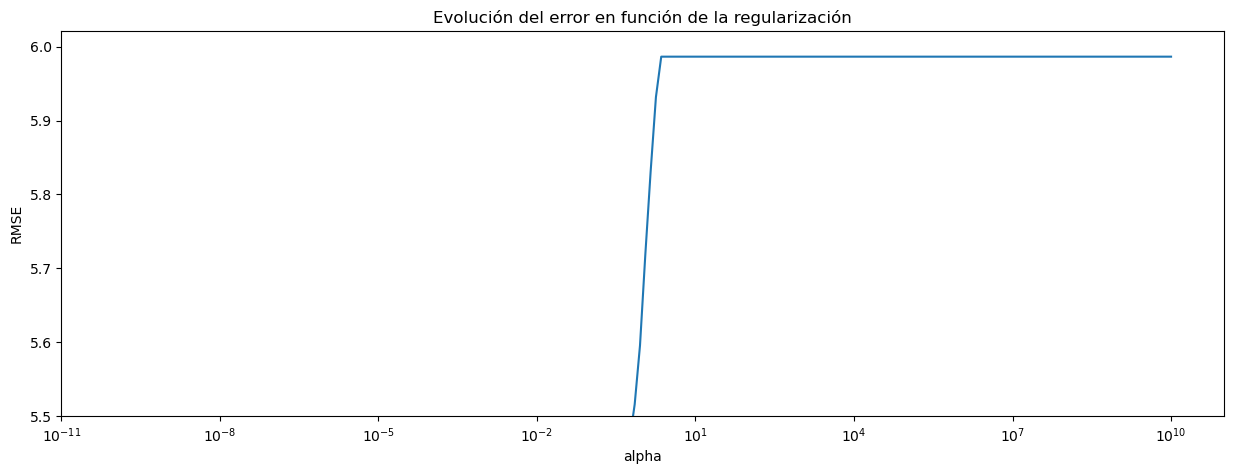

In [73]:
# Evolución del error de validación cruzada en función de alpha

# modelo.mse_path almacena el MSE de CV para cada valor de alpha.

mse_cv = mod.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([5.5,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [74]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 0.0004297004704320844


In [75]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

df_coeficientes[df_coeficientes.coef != 0]

predictor      coef
0    Humidity3pm  2.177901
1       Sunshine -0.690804
2       Rainfall  0.951477
3       Cloud3pm  0.240623
4  WindGustSpeed  0.780045
5    Pressure3pm -3.545259
6    Pressure9am  3.046092
7       Cloud9am -0.118909
8    Humidity9am -0.425781
9        Temp3pm  0.497774

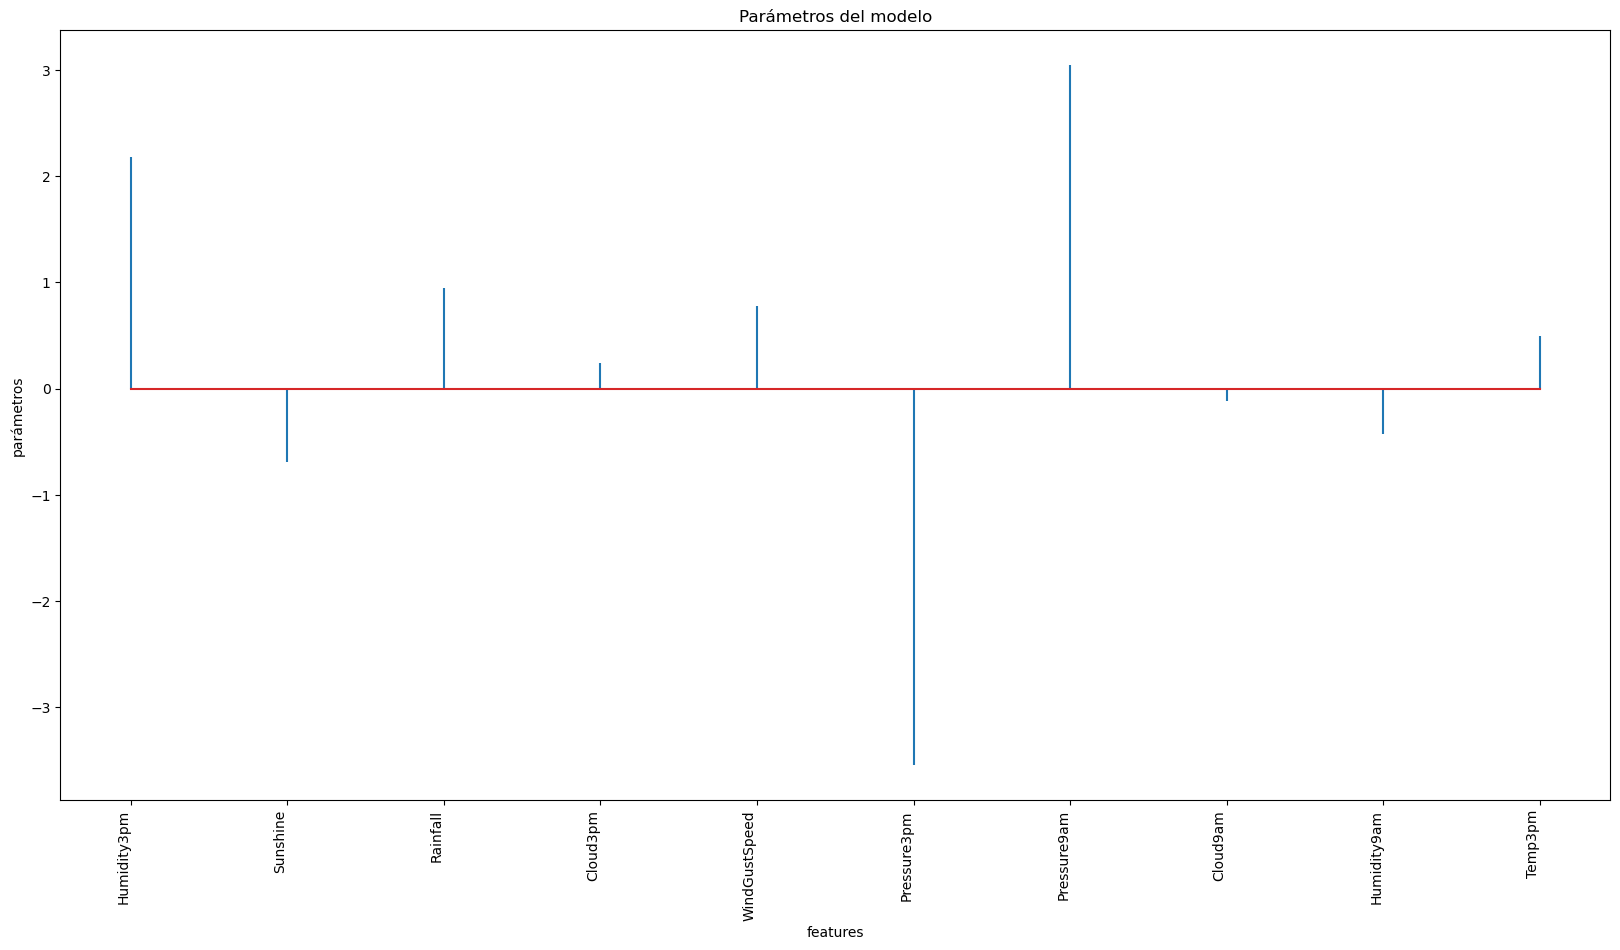

In [76]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('features')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [77]:
y_pred = modelo.predict(X_test)

In [78]:
# Error de test del modelo 

rmse_lasso = mean_squared_error(y_test,y_pred,squared = False)
mse_lasso = mean_squared_error(y_test,y_pred)
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")
print(f"El error (mse) de test es: {mse_lasso}")


El error (rmse) de test es: 5.506078546966951
El error (mse) de test es: 30.316900965369694


In [79]:
lasso_R2 = metrics.r2_score(y_test, y_pred)
lasso_R2

0.23838213677128595

In [80]:
# new
y_pred_2 = model.predict(X_train)
lasso_R2_train = metrics.r2_score(y_train, y_pred_2)
rmse_lasso_train = mean_squared_error(y_train, y_pred_2, squared = False)
print('Métricas de entrenamiento')
print(lasso_R2_train, rmse_lasso_train)

Métricas de entrenamiento
0.22119628415109338 5.281951609291106


In [81]:
# Esto lo coreemos para ver como nos estan dando los valores --> borrarlo posteriormente
print(rl_R2)
print(ridge_R2)
print(lasso_R2)
print(rmse_ols)
print(rmse_lasso)
print(rmse_ridge)

0.23846304735934243
0.2383769986594152
0.23838213677128595
5.505786069658317
5.506078546966951
5.506097119798023


## ElasticNet

In [82]:
modelo = make_pipeline(StandardScaler(), 
                        ElasticNetCV(
                              l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas          = np.logspace(-10, 10, 200),
                              cv              = 10
                           )
         )

_ = modelo.fit(X_train, y_train)

mod = modelo.steps[1][1]

In [83]:
# Como lo anterior no se puede mostrar, lo mostramos de la siguiente forma
import pprint

# Imprimir el modelo detalladamente
pprint.pprint(mod)

ElasticNetCV(alphas=array([1.00000000e-10, 1.26038293e-10, 1.58856513e-10, 2.00220037e-10,
       2.52353917e-10, 3.18062569e-10, 4.00880633e-10, 5.05263107e-10,
       6.36824994e-10, 8.02643352e-10, 1.01163798e-09, 1.27505124e-09,
       1.60705282e-09, 2.02550194e-09, 2.55290807e-09, 3.21764175e-09,
       4.05546074e-09, 5.11143348e-09, 6.44236351e-09, 8.11984499e-09,
       1.02341140e-08, 1.289890...
       4.88025158e+07, 6.15098579e+07, 7.75259749e+07, 9.77124154e+07,
       1.23155060e+08, 1.55222536e+08, 1.95639834e+08, 2.46581108e+08,
       3.10786619e+08, 3.91710149e+08, 4.93704785e+08, 6.22257084e+08,
       7.84282206e+08, 9.88495905e+08, 1.24588336e+09, 1.57029012e+09,
       1.97916687e+09, 2.49450814e+09, 3.14403547e+09, 3.96268864e+09,
       4.99450512e+09, 6.29498899e+09, 7.93409667e+09, 1.00000000e+10]),
             cv=10, l1_ratio=[0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99])


In [84]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = mod.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod.l1_ratio, mod.alphas_],
                                    names     = ['l1_ratio', 'mod.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv


l1_ratio   mod.alphas_     mse_cv   rmse_cv
131       0.00  6.826072e-04  28.037782  5.295071
130       0.00  8.603464e-04  28.037792  5.295072
331       0.10  6.826072e-04  28.037802  5.295073
132       0.00  5.415871e-04  28.037802  5.295073
330       0.10  8.603464e-04  28.037805  5.295074
...        ...           ...        ...       ...
1023      0.95  4.880252e+07  35.838072  5.986491
1024      0.95  3.872039e+07  35.838072  5.986491
1025      0.95  3.072113e+07  35.838072  5.986491
1019      0.95  1.231551e+08  35.838072  5.986491
1055      0.95  2.967302e+04  35.838072  5.986491

[1400 rows x 4 columns]

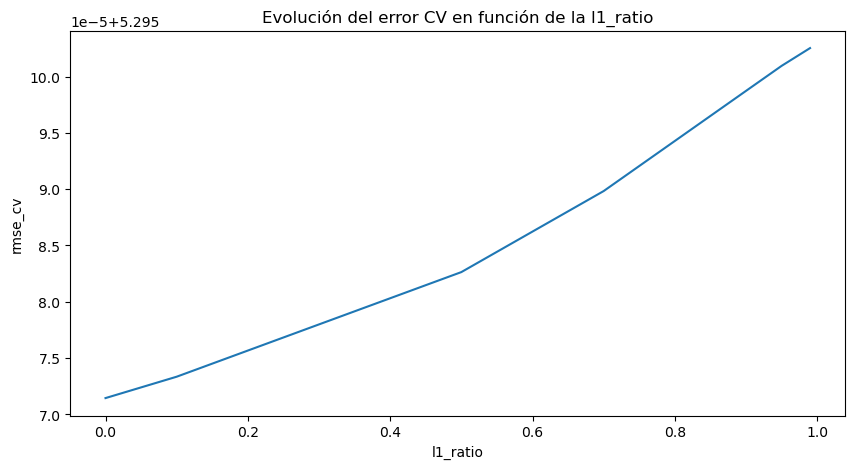

In [85]:
fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

El gráfico muestra una curva que representa cómo cambia el RMSE de CV a medida que varía el valor de l1_ratio. Esta curva te permite identificar el valor óptimo de l1_ratio que minimiza el RMSE de CV y, por lo tanto, proporciona el mejor rendimiento del modelo.

In [86]:
# Mejor valor alpha y l1_ratio_ encontrado

print(f"Mejor valor de alpha encontrado: ", mod.alpha_.round(4))
print(f"Mejor valor de l1_ratio encontrado:", mod.l1_ratio_)

Mejor valor de alpha encontrado:  0.0007
Mejor valor de l1_ratio encontrado: 0.0


In [87]:
# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

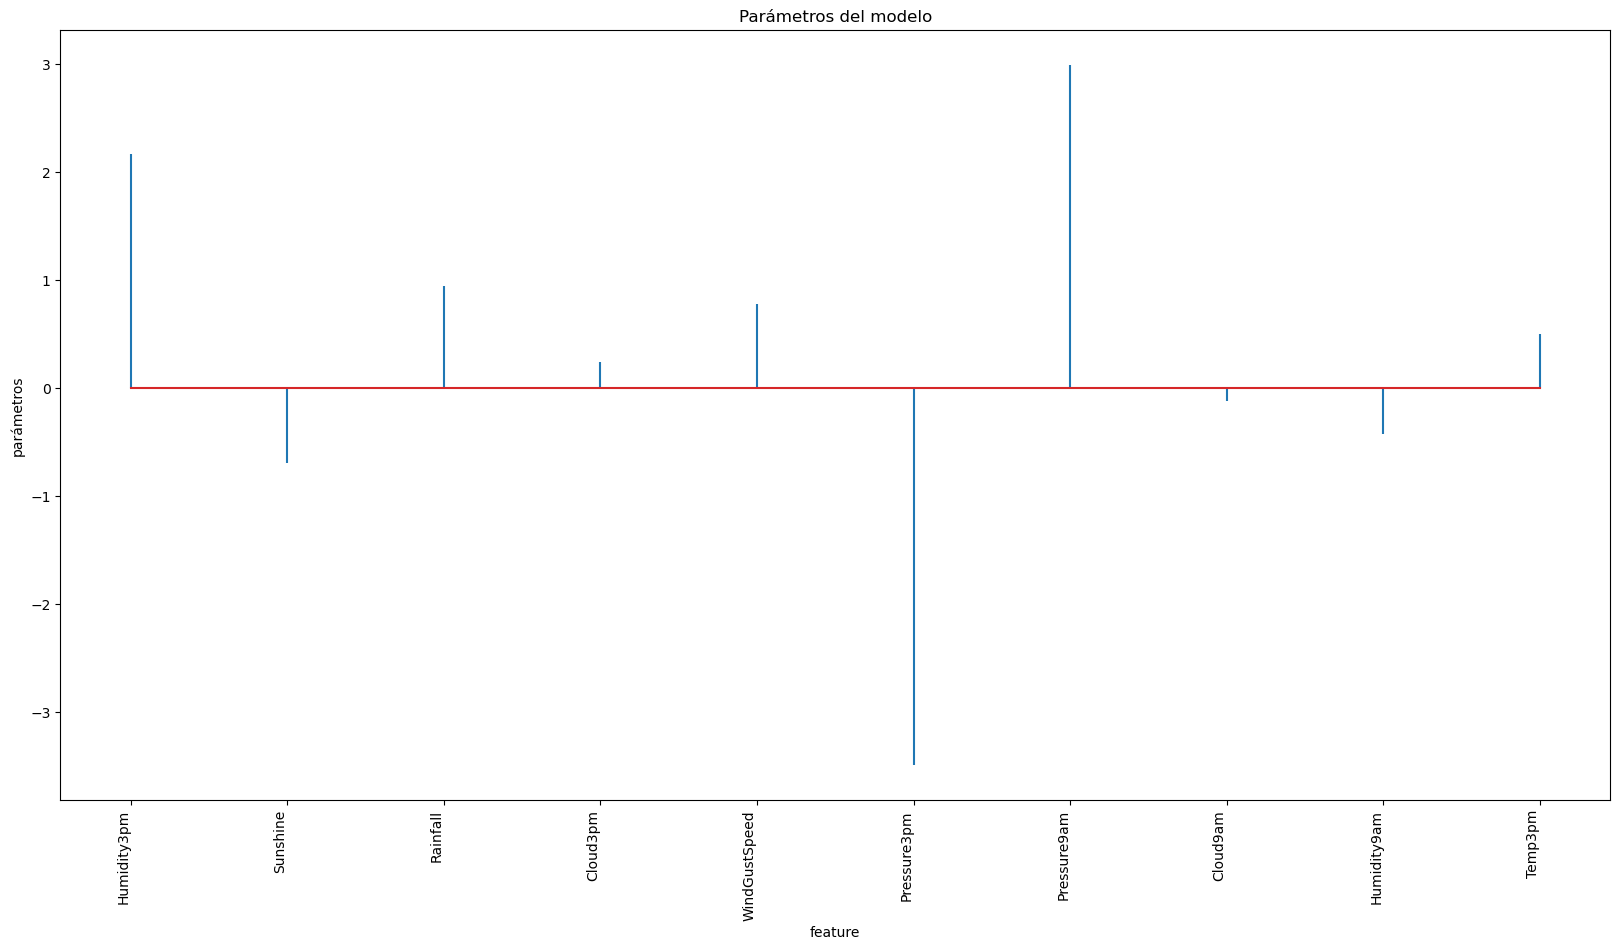

In [88]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [89]:
# Predicciones test
y_pred = modelo.predict(X_test)

In [90]:
# Error de test del modelo 

rmse_elastic = mean_squared_error(y_test,y_pred, squared = False)
mse_elastic = mean_squared_error(y_test,y_pred)
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")
print(f"El error (mse) de test es: {mse_elastic}")


El error (rmse) de test es: 5.507124125137592
El error (mse) de test es: 30.328416129672487


In [91]:
elasticnet_R2 = metrics.r2_score(y_test, y_pred)
elasticnet_R2

0.23809285407576775

In [92]:
# new
y_pred_2 = model.predict(X_train)
elasticnet_R2_train = metrics.r2_score(y_train, y_pred_2)
rmse_elasticnet_train = mean_squared_error(y_train, y_pred_2, squared = False)
print('Métricas de entrenamiento')
print(elasticnet_R2_train, rmse_elasticnet_train)

Métricas de entrenamiento
0.22119628415109338 5.281951609291106


## Comparación de los distintos modelos

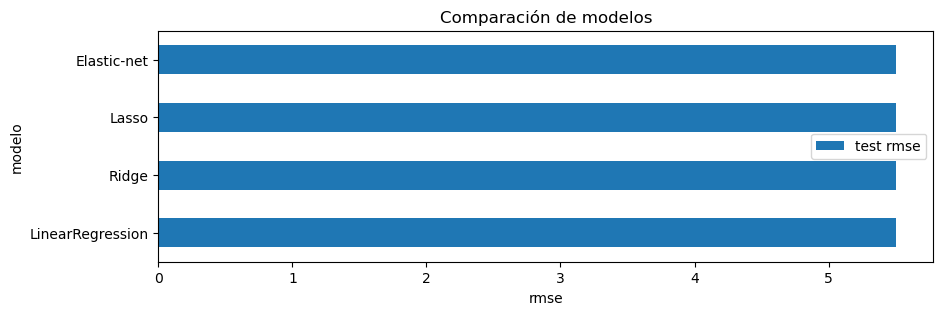

In [93]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [94]:
print([rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic])

[5.505786069658317, 5.506097119798023, 5.506078546966951, 5.507124125137592]


In [95]:
print([rl_R2, lasso_R2, ridge_R2, elasticnet_R2])

[0.23846304735934243, 0.23838213677128595, 0.2383769986594152, 0.23809285407576775]


No existe demasiada variabilidad entre los modelos, el resultado es similar en todos ellos.

In [96]:
#new 
data = {
    'método': ['Regresion Lineal', 'Ridge', 'Lasso', 'ElasticNet'],
    'r2 test': [rl_R2, ridge_R2, lasso_R2, elasticnet_R2],
    'rmse test': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic],
    'mse test': [mse_ols, mse_ridge, mse_lasso, mse_elastic],
    'r2 train': [rl_R2_train, ridge_R2_train, lasso_R2_train, elasticnet_R2_train],
    'rmse train': [rmse_ols_train, rmse_ridge_train, rmse_lasso_train, rmse_elasticnet_train]
}

# Crear el DataFrame
metrics = pd.DataFrame(data)

# Mostrar el DataFrame
print(metrics)

             método   r2 test  rmse test   mse test  r2 train  rmse train
0  Regresion Lineal  0.238463   5.505786  30.313680  0.221196    5.281952
1             Ridge  0.238377   5.506097  30.317105  0.221196    5.281952
2             Lasso  0.238382   5.506079  30.316901  0.221196    5.281952
3        ElasticNet  0.238093   5.507124  30.328416  0.221196    5.281952


Vemos que para cada caso las métricas calculados con los datos de test y de entramiento son muy similares, esto nos dice que los modelos han logrado un buen ajuste en los datos de entrenamiento como en los de prueba.
Estos podría indicarnos que nuestros modelos son capaces de generalizar bien a nuevos datos.

## Gradiente descendiente


In [97]:
def gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]
    
    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))
    

    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for i in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W) 
        error_train = y_train - prediction_train  
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W) 
        error_test = y_test - prediction_test 
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de test')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W

In [98]:
from sklearn.preprocessing import StandardScaler

def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.001, epochs=100, batch_size=32):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    n = X_train_scaled.shape[0]
    m = X_train_scaled.shape[1]

    X_train_scaled = np.hstack((np.ones((n, 1)), X_train_scaled))
    X_test_scaled = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        permutation = np.random.permutation(n)
        X_train_shuffled = X_train_scaled[permutation]
        y_train_shuffled = y_train[permutation]

        for j in range(0, n, batch_size):
            x_batch = X_train_shuffled[j:j+batch_size, :]
            y_batch = y_train_shuffled[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test_scaled, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return W


In [99]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

In [100]:
data_new.head()

Humidity3pm  Sunshine  Rainfall  Cloud3pm  WindGustSpeed  Pressure3pm  \
0         29.0       6.3       0.0       7.0           30.0       1015.0   
1         36.0       9.7       3.6       3.0           39.0       1008.4   
2         69.0       3.3       3.6       7.0           85.0       1007.2   
3         56.0       9.1      39.8       7.0           54.0       1007.0   
4         49.0      10.6       2.8       7.0           50.0       1018.5   

   Pressure9am  Cloud9am  Humidity9am  Temp3pm  
0       1019.7       7.0         68.0     23.6  
1       1012.4       5.0         80.0     25.7  
2       1009.5       8.0         82.0     20.2  
3       1005.5       2.0         62.0     14.1  
4       1018.3       7.0         68.0     15.4

Para este modelo decidimos comparar con la primera columna

In [101]:
df_regresion.drop(columns="Date", inplace=True)
print(df_regresion.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22217 entries, 0 to 22216
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MinTemp                22217 non-null  float64
 1   MaxTemp                22217 non-null  float64
 2   Rainfall               22217 non-null  float64
 3   Evaporation            22217 non-null  float64
 4   Sunshine               22217 non-null  float64
 5   WindGustDir            22217 non-null  float64
 6   WindGustSpeed          22217 non-null  float64
 7   WindDir9am             22217 non-null  float64
 8   WindDir3pm             22217 non-null  float64
 9   WindSpeed9am           22217 non-null  float64
 10  WindSpeed3pm           22217 non-null  float64
 11  Humidity9am            22217 non-null  float64
 12  Humidity3pm            22217 non-null  float64
 13  Pressure9am            22217 non-null  float64
 14  Pressure3pm            22217 non-null  float64
 15  Cl

In [102]:
X,y = df['RainTomorrow_Yes'].values.reshape(-1,1),df['RainfallTomorrow'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

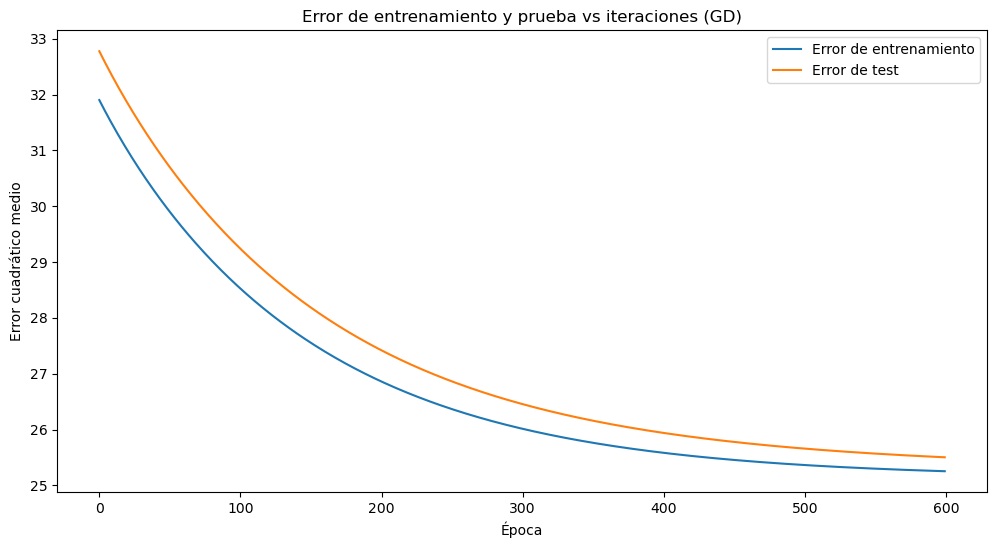

array([[0.33624028],
       [7.10472747]])

In [103]:
gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=600)

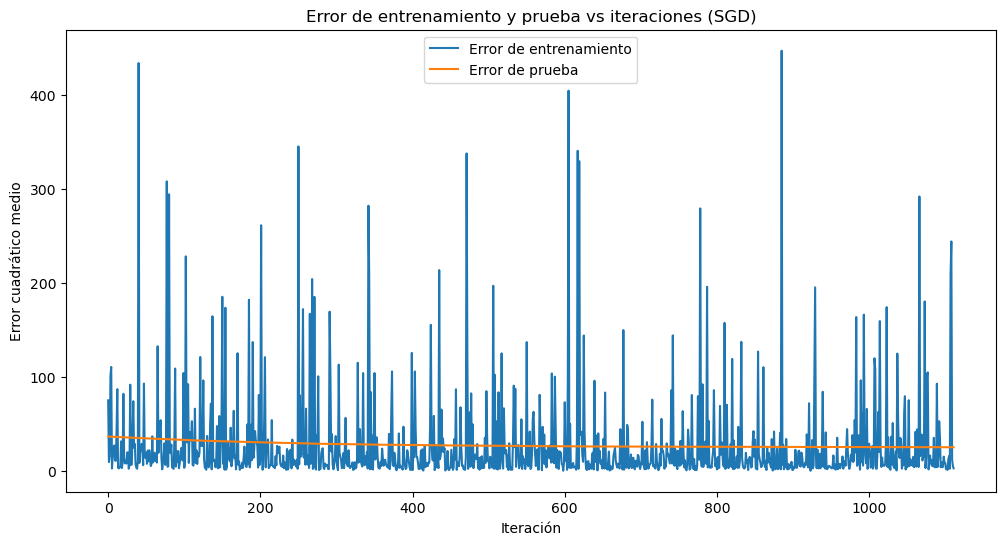

array([[1.96527212],
       [3.00756268]])

In [104]:
stochastic_gradient_descent(X_train, y_train, X_test, y_test, epochs=2)

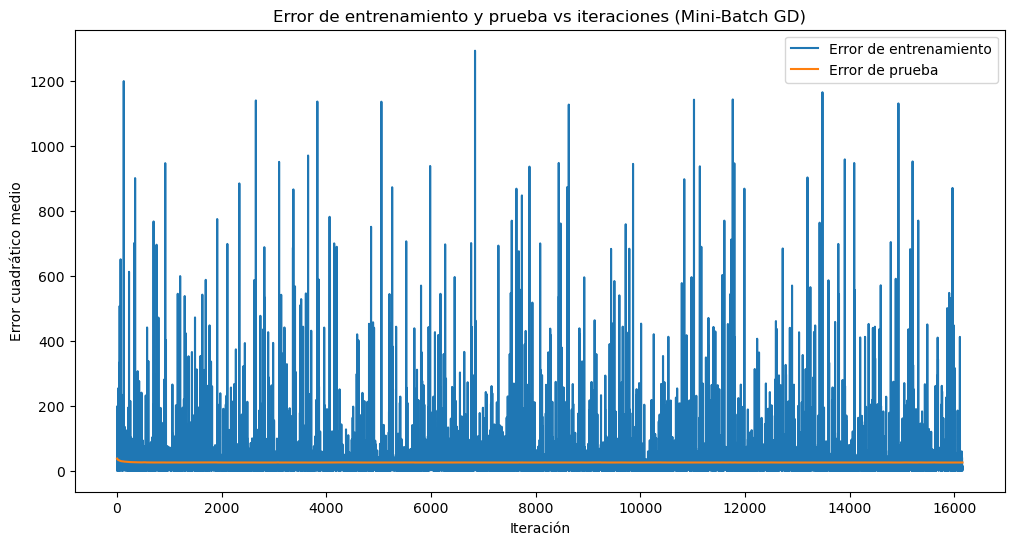

array([[0.01529214],
       [7.94879607]])

In [105]:
mini_batch_gradient_descent(X_train, y_train, X_test, y_test, epochs=10)

In [106]:
# new
# updated df with df_regresion
X_train, X_test, y_train, y_test = train_test_split(df_regresion,
                                             df['RainfallTomorrow'].values.reshape(-1,1),
                                             test_size=0.2,
                                             random_state=12,
                                             )

In [107]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17773, 28), (4444, 28), (17773, 1), (4444, 1))

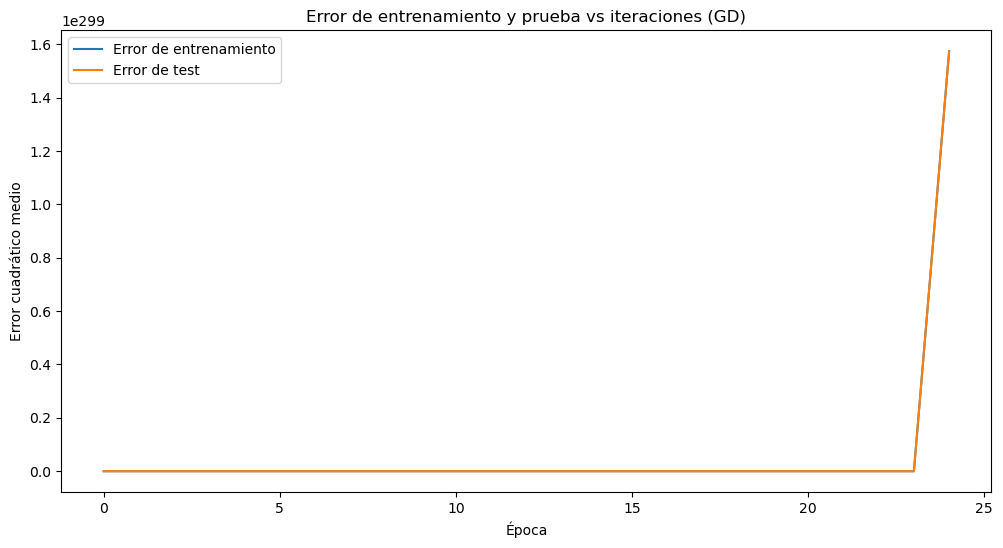

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [108]:
gradient_descent(X_train, y_train, X_test, y_test, epochs=200, lr=0.1)

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

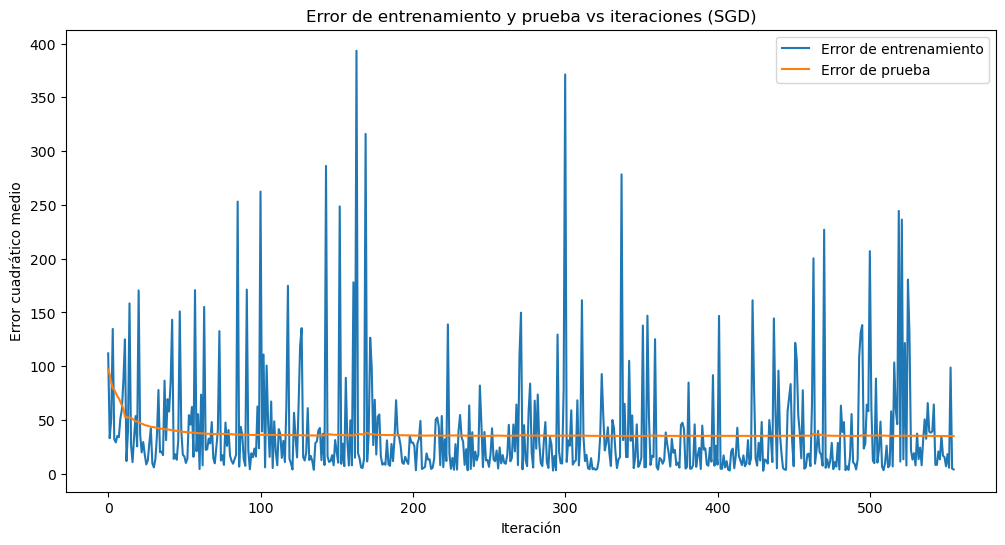

array([[ 2.06725025],
       [ 0.10155655],
       [-0.12074218],
       [ 0.04422315],
       [ 0.16617738],
       [ 0.03002698],
       [ 0.00983871],
       [ 0.17231044],
       [-0.06624635],
       [ 0.00882613],
       [-0.03757322],
       [ 0.01441545],
       [-0.02985379],
       [-0.13316414],
       [-0.29489854],
       [ 0.23879275],
       [-0.08914898],
       [-0.00641594],
       [ 0.03432716],
       [-0.34902909],
       [ 0.09510497],
       [ 0.10968369],
       [ 0.0078913 ],
       [ 0.09257988],
       [ 0.05276407],
       [ 0.17834949],
       [ 0.00661394],
       [ 0.1619132 ],
       [ 0.58159399]])

In [110]:
# lr = 0.001 es muy chico, 0.1 muy grande
stochastic_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, epochs=1, lr=0.01)

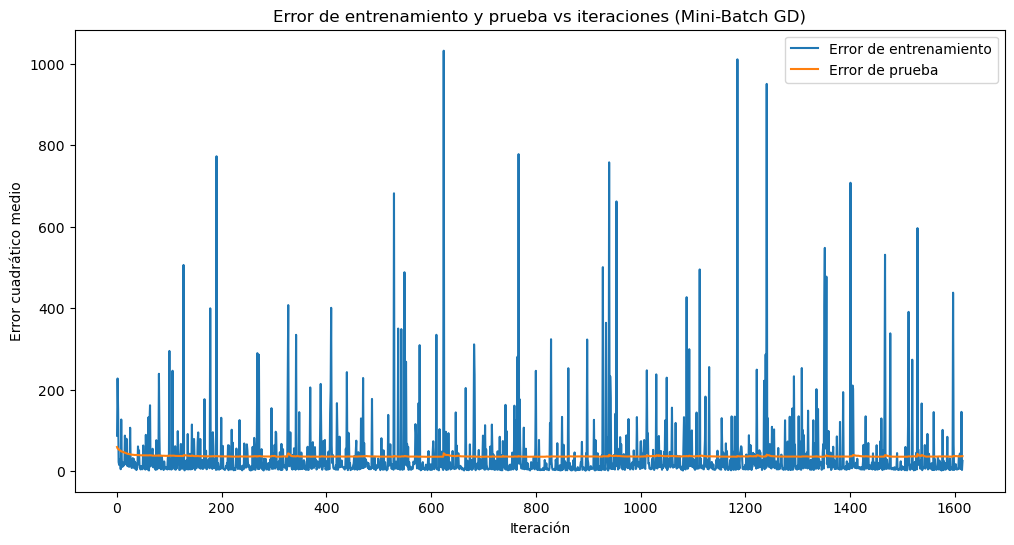

array([[ 1.92392706],
       [ 0.10077474],
       [-0.41799504],
       [ 0.50612193],
       [ 0.03653667],
       [-0.16539784],
       [-0.03917261],
       [ 0.0704753 ],
       [ 0.20555928],
       [-0.12357527],
       [ 0.24696675],
       [-0.08538873],
       [ 0.20052484],
       [ 0.00755801],
       [ 0.49212279],
       [-0.61368045],
       [-0.25272103],
       [-0.38487295],
       [ 0.64003964],
       [-0.10334037],
       [ 0.55233008],
       [ 0.07991469],
       [ 0.2736225 ],
       [ 0.14973395],
       [-0.21808401],
       [ 0.07833598],
       [ 0.07786381],
       [ 0.25497105],
       [ 0.6600351 ]])

In [111]:
mini_batch_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, epochs=1, lr=0.01)

- Comportamiento de los errores de entrenamiento y prueba a lo largo de las épocas/iteraciones:

Para Gradiente Descendiente, vemos que el error de entrenamiento y test baja significativamente hasta las 300 epochs, estabilizándose alrededor de las 600 en un valor de 25.
Para Gradiente Descendiente Estocástico, vemos un comportamiento errático en los errores de entrenamiento, propios del método, pero vemos al error de prueba rápidamente estabilizado también alrededor de 25.
Para Mini-Batch, sucede algo similar que para gradiente descendiente estocástico: observamos una mayour volatilidad en los errores de prueba, y la misma estabilidad del error de test a través de las iteraciones.

No hay indicios de overfitting, ya que el error en entrenamiento y test no es muy distante. El problema es que el modelo no es demasiado explicativo del problema.

Experimentamos con las epochs y los lr, encontrando un buen balance en los valores ejecutados en este script.

# Correcciones

Cambios que hicimos de la entrega 1 a la entrega 2:
- Ordenamos los datos a partir de la fecha de forma creciente --> esto lo hacemos para rehacer la division en train y test
- Agregamos las métricas para los datos de train

Todo el codigo que se modifico se encuentra con un comentario #new para poder diferenciarlo más rapidamente.

# 5) Algoritmos de Clasificación 

## Regresión Logística

In [112]:
df_clasification = df.sort_values(by='Date', ignore_index=True)
todas_las_columnas = list(df_clasification.columns)
columnas = []
for i in todas_las_columnas:
    if "Location" not in i and "RainfallTomorrow" not in i and "Date" not in i:
        columnas.append(i)
df_clasification = df_clasification[columnas]
print(df_clasification.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22217 entries, 0 to 22216
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           22217 non-null  float64
 1   MaxTemp           22217 non-null  float64
 2   Rainfall          22217 non-null  float64
 3   Evaporation       22217 non-null  float64
 4   Sunshine          22217 non-null  float64
 5   WindGustDir       22217 non-null  float64
 6   WindGustSpeed     22217 non-null  float64
 7   WindDir9am        22217 non-null  float64
 8   WindDir3pm        22217 non-null  float64
 9   WindSpeed9am      22217 non-null  float64
 10  WindSpeed3pm      22217 non-null  float64
 11  Humidity9am       22217 non-null  float64
 12  Humidity3pm       22217 non-null  float64
 13  Pressure9am       22217 non-null  float64
 14  Pressure3pm       22217 non-null  float64
 15  Cloud9am          22217 non-null  float64
 16  Cloud3pm          22217 non-null  float6

In [113]:
# xc yc la c hace referencia a clasificacion
Xc = df_clasification.drop(columns="RainTomorrow_Yes")
yc = df_clasification['RainTomorrow_Yes']
print(Xc.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday_Yes', 'dia', 'año'],
      dtype='object')


In [114]:
Xc_train = Xc.iloc[:17778]
Xc_test = Xc.iloc[17778:]
yc_train = yc.iloc[:17778]
yc_test = yc.iloc[17778:]

In [115]:
print(Xc_train.shape, Xc_test.shape, yc_train.shape, yc_test.shape)

(17778, 22) (4439, 22) (17778,) (4439,)


In [116]:
# Proporcion de dias que llueve en los datos de train
print((yc_train.sum()/17778).round(2))

0.24


De los registros de lluvia que tenemos en yc_train solo el 24% corresponden a dias que si llueve, esto nos indica que nuestro data set esta desbalanceado. Ya que tenemos muchos más datos sobre dias donde no llueve que de dias que llueve.

In [117]:
# Inicializar y entrenar un modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(Xc_train, yc_train)

# Realizar predicciones en el conjunto de prueba
yc_pred = model.predict(Xc_test)
# Obtengo las probabilidades de predicción del modelo
yc_probs = model.predict_proba(Xc_test)[:, 1]

In [118]:
model

LogisticRegression(random_state=42)

## Features VS Target

A continuación graficamos algunas features de nuestro data set versus las clases de nuestra variable target. Recordemos que 1 indica que llueve y 0 que no llueve.
Esto lo hacemos para observar como se comportan las variables con respecto a la target para ver si podemos sacar alguna conclusión o inferir alguna relacion entre variables.

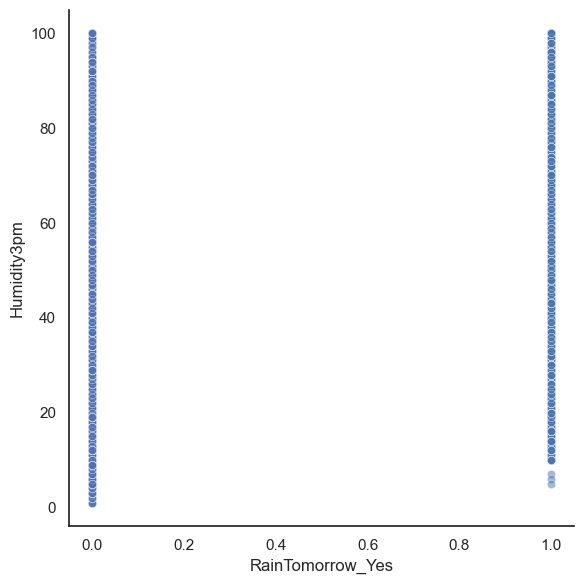

In [119]:
# Ploteos de las clases vs algún feature (las más correlacionadas según regresión lineal)
sns.set(style="white")

sns.relplot(x="RainTomorrow_Yes", y=features[0],
            sizes=(40, 400), alpha=.5, palette="bright",
            height=6, data=df_clasification)

En el gráfico anterior vemos que no hay grandes diferencia con respecto a si llueve o no. Solo que los dias que no llueve la presion puede ausmir valores cercanos a cero, cosa que cuando llueve no sucede.

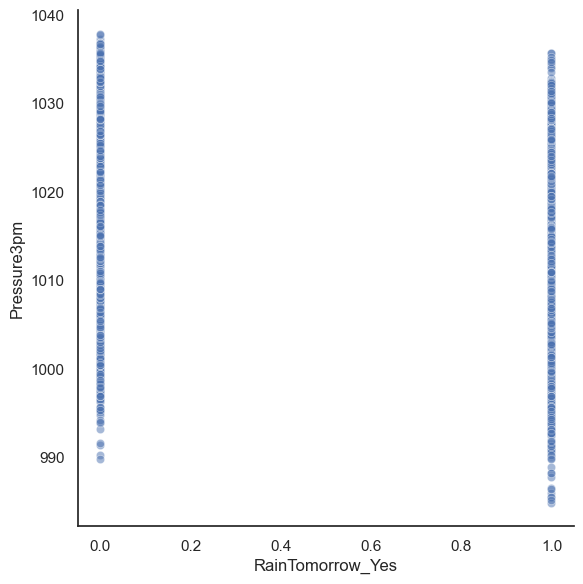

In [120]:
# Ploteos de las clases vs algún feature

sns.relplot(x="RainTomorrow_Yes", y=features[5],
            sizes=(40, 400), alpha=.5,
            height=6, data=df_clasification)

En el gráfico anterior podemos observar qeu algunos datos indican que los dias que no llueve la presión puede alcanzar valores mas altos que los dias que si llueve.
Pero creemos que esta diferencia no es muy significativa como para decir que siempre la presión es mayor los dias que no llueve.

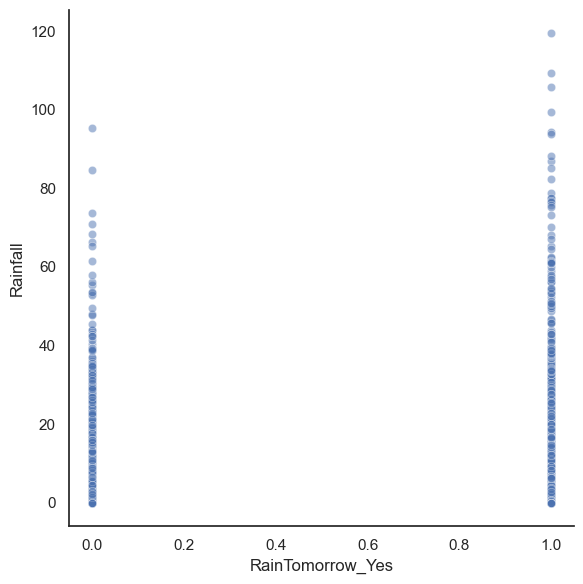

In [121]:
# Ploteos de las clases vs algún feature

sns.relplot(x="RainTomorrow_Yes", y="Rainfall",
            sizes=(40, 400), alpha=.5, palette="bright",
            height=6, data=df_clasification)

A priori, no vemos una variable que nos permita decidir fácilmente si va a llover o no al día siguiente.

## Métricas

In [122]:
print("Resultados con regresión logística\n")
print(classification_report(yc_test, yc_pred))

Resultados con regresión logística

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3426
           1       0.73      0.53      0.61      1013

    accuracy                           0.85      4439
   macro avg       0.80      0.73      0.76      4439
weighted avg       0.84      0.85      0.84      4439



El accuracy indica cuán buenas son las predicciones de forma global. Es una métrica útil cuando el dataset está balanceado, no tanto en este caso.

La *precisión* releva, sobre todo, los Falsos Positivos (predecir que llueve cuando en realidad no llovió).

El *recall* releva, sobre todo, los Falsos Negativos (predecir que no llueve cuando en realidad sí llueve).

El *F1-Score* mantiene un buen balance entre ambas. Lo usaremos para medir cuán bueno es nuestro modelo de forma general, pero prestaremos especial atención al recall de la clase 1.

Teniendo en cuenta que nuestro dataset se encuentra desbalanceado y que nos interesa no dar falsos negativos (decir que no va llover y que si llueva) elegimos F1-Score y recall sobre la clase 1, como métricas a optimizar.

In [123]:
# Matriz de confusion 
print(confusion_matrix(yc_test, yc_pred))

[[3226  200]
 [ 478  535]]


El elemento 1-1 de la matriz tenemos los verdaderos negativos (TN), que son 3237. Es decir, se predijo que no iba a llover y no llovio

El elemento 1-2 tenemos los falsos positivos (FP), que son 189. Estos son los casos en los que el modelo predijo que iba a llover cuando en realidad no llovio.

El elemento 2-1, tenemos los falsos negativos (FN), que son 487. Estos son los casos en los que el modelo predijo que no iba a llover y llovio.

El elemento 2-2, tenemos los verdaderos positivos (TP), que son 526. Estos son los casos en los que el modelo predijo que iba a llover y realmente llovio.

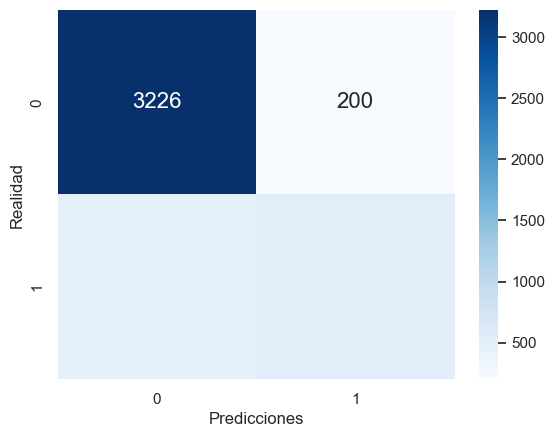

In [124]:
# Le damos formato a la matriz de confusión
CM_Regresion_Log = confusion_matrix(yc_test, yc_pred)
sns.heatmap(CM_Regresion_Log, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.ylabel('Realidad')
plt.xlabel('Predicciones')
plt.show()

In [125]:
lluvia = df_clasification[df_clasification["RainToday_Yes"]==True].shape[0]
total = df_clasification.shape[0]

print(f"Días lluviosos: {int(lluvia/(total)*100)}%.")

Días lluviosos: 23%.


Podemos observar que la columna target está desbalanceada, ya que como muestra el dataset (y como sucede normalmente), hay más días sin lluvia que días lluviosos. Veamos si nuestro modelo mejora al balancear los datos usando el argumento opcional _class_weight_ de sktlearn.

**¿Qué hace este argumento?**

class_weightdict = ‘balanced’

El modo "balanceado" utiliza los valores de y para ajustar automáticamente los pesos de forma inversamente proporcional a las frecuencias de las clases en los datos de entrada como n_samples / (n_classes * np.bincount(y)).

In [126]:
print("Resultados con regresión logística original\n")
print(classification_report(yc_test, yc_pred))
print("________")
print(confusion_matrix(yc_test, yc_pred))

model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(Xc_train, yc_train)
yc_pred_balanced = model.predict(Xc_test)
yc_probs_balanced = model.predict_proba(Xc_test)[:, 1]

print("Resultados con regresión logística y dataset balanceado\n")
print(classification_report(yc_test, yc_pred_balanced))
print("________")
print(confusion_matrix(yc_test, yc_pred_balanced))

Resultados con regresión logística original

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3426
           1       0.73      0.53      0.61      1013

    accuracy                           0.85      4439
   macro avg       0.80      0.73      0.76      4439
weighted avg       0.84      0.85      0.84      4439

________
[[3226  200]
 [ 478  535]]
Resultados con regresión logística y dataset balanceado

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      3426
           1       0.53      0.76      0.63      1013

    accuracy                           0.79      4439
   macro avg       0.73      0.78      0.74      4439
weighted avg       0.83      0.79      0.80      4439

________
[[2747  679]
 [ 241  772]]


Observamos un resultado esperable al balancear el dataset: mejoramos el recall sobre la clase minoritaria, con el costo de empeorar su precisión y también el accuracy global.

Text(0.5, 20.049999999999997, 'Predicciones')

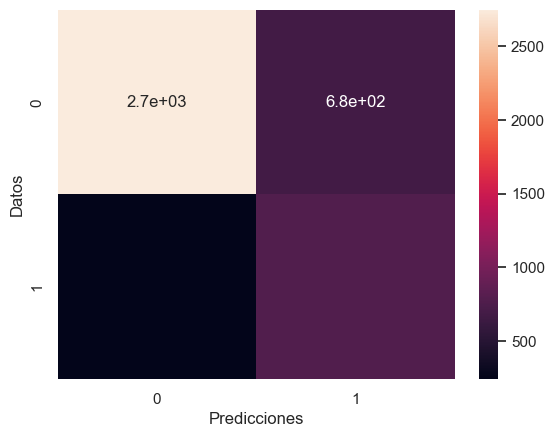

In [127]:
CM_Regresion_Log = confusion_matrix(yc_test, yc_pred_balanced)
sns.heatmap(CM_Regresion_Log, annot=True)
plt.ylabel('Datos')
plt.xlabel('Predicciones')

Hagamos otro modelo balanceando el dataset con ROS, es decir, creando nuevos registros con lluvia de hoy.

In [128]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Tomamos mas valores de la clase minoritaria
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(Xc_train, yc_train)


In [129]:
print((y_resampled.sum()/len(y_resampled)).round(2))

0.5


Antes teniamos que el 24% de los datos representaban dias de lluvia mientras que ahora tenemos 50%

In [130]:
# En el primer método de regresion logística que utilizamos, sin ningun tipo de balanceo
len(yc_train[yc_train==1]), len(yc_train[yc_train==0])

(4206, 13572)

In [131]:
len(y_resampled[y_resampled==1]), len(y_resampled[y_resampled==0])
### El oversampler no hizo nada con los datos que tienen y=0, pero sí generó muchos datos nuevos con y=1.

(13572, 13572)

Vemos que este metodo de balanceo lo que hace es generar nuevos datos con valor 1 de manera que haya la misma cantidad de datos de cada clase en la variable target.

In [132]:
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)
yc_pred_ros = model.predict(Xc_test)
yc_probs_ros = model.predict_proba(Xc_test)[:, 1]

print("Resultados regresión logística con Oversampling:\n")
print(classification_report(yc_test, yc_pred_ros))
print(confusion_matrix(yc_test, yc_pred_ros))

Resultados regresión logística con Oversampling:

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      3426
           1       0.52      0.77      0.62      1013

    accuracy                           0.79      4439
   macro avg       0.72      0.78      0.74      4439
weighted avg       0.83      0.79      0.80      4439

[[2706  720]
 [ 229  784]]


Observamos que, con clases balanceadas, empeoramos el accuracy (0.85 a 0.79) por lo que empeoramos las predicciones en general (ergo, la precision), pero sobre la clase 1 (predecir correctamente los días donde sí llovió) mejoramos el recall (de 0.53 a 0.76 y a 0.78) y el levemente el f1-score (de 0.61 a 0.63); obtenemos así un modelo más robusto y útil para el objetivo deseado.

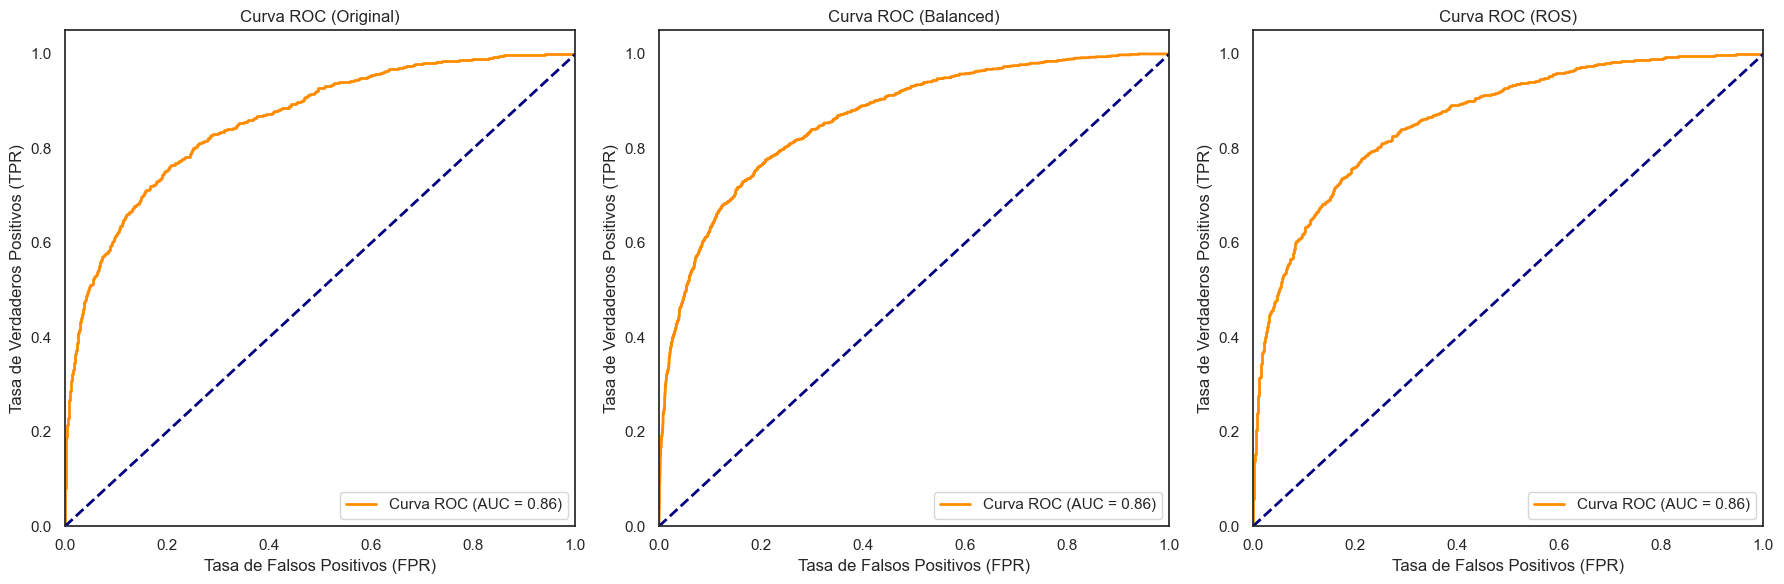

In [133]:
# Crear una figura con tres subgráficos en una fila
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Primer gráfico: Curva ROC para yc_probs
fpr, tpr, thresholds = roc_curve(yc_test, yc_probs)
roc_auc = auc(fpr, tpr)
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('Tasa de Falsos Positivos (FPR)')
axes[0].set_ylabel('Tasa de Verdaderos Positivos (TPR)')
axes[0].set_title('Curva ROC (Original)')
axes[0].legend(loc="lower right")

# Segundo gráfico: Curva ROC para yc_probs_balanced
fpr, tpr, thresholds = roc_curve(yc_test, yc_probs_balanced)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Tasa de Falsos Positivos (FPR)')
axes[1].set_ylabel('Tasa de Verdaderos Positivos (TPR)')
axes[1].set_title('Curva ROC (Balanced)')
axes[1].legend(loc="lower right")

# Tercer gráfico: Curva ROC para yc_probs_ros
fpr, tpr, thresholds = roc_curve(yc_test, yc_probs_ros)
roc_auc = auc(fpr, tpr)
axes[2].plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
axes[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[2].set_xlim([0.0, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('Tasa de Falsos Positivos (FPR)')
axes[2].set_ylabel('Tasa de Verdaderos Positivos (TPR)')
axes[2].set_title('Curva ROC (ROS)')
axes[2].legend(loc="lower right")

# Ajustar el layout
plt.tight_layout()
plt.show()

Aquí, para cada modelo y para cada *threshold* o umbral entre 0 y 1 graficamos la tasa de falsos positivos y la tasa de verdaderos positivos. En ese orden, el objetivo es el punto (0,1). Naturalmente no existe un umbral cuya imagen sea ese punto, pero podemos acercarnos bastante según lo que busquemos con nuestro modelo.

In [134]:
roc_df = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr,
    'Thresholds': thresholds
})

roc_df.sort_values(by='TPR', ascending=False, inplace=True)
roc_df.head(10)

FPR       TPR  Thresholds
993  1.000000  1.000000    0.007638
992  0.949504  1.000000    0.047922
991  0.949504  0.999013    0.048049
990  0.946585  0.999013    0.049816
989  0.946585  0.998026    0.049829
988  0.916521  0.998026    0.063707
987  0.916521  0.997038    0.063725
986  0.904262  0.997038    0.069000
985  0.904262  0.996051    0.069174
984  0.871862  0.996051    0.083041

In [135]:
# Encontrar el umbral que maximiza la suma de tpr y 1 - fpr (punto de equilibrio)
balance_scores = tpr + (1 - fpr)
idx_balance = np.argmax(balance_scores)
best_threshold_balance = thresholds[idx_balance]
print("Threshold con mejores resultados:", best_threshold_balance)
print("Recall sobre clase 1 en modelo con Oversampling: 0.77")
print(f"TPR: {tpr[idx_balance]}")
print(f"FPR: {fpr[idx_balance]}")

Threshold con mejores resultados: 0.4985694375541075
Recall sobre clase 1 en modelo con Oversampling: 0.77
TPR: 0.7769002961500494
FPR: 0.21103327495621715


Aunque encontramos un umbral para el cual tenemos buen balance entre FPR y TPR, podríamos buscar alguno que mejore el rendimiento del modelo respecto al recall de la clase 1 (TPR | predecir que llueve cuando sí llueve), incrementando el margen de error en FPR (predecir que llueve cuando en realidad no lloverá). Por ejemplo, de la siguiente forma:

In [136]:
maximo_fpr_tolerable = 0.33
minimo_tpr_tolerable = 0.85
roc_df_filtered = roc_df[(roc_df["FPR"]<maximo_fpr_tolerable) & (roc_df["TPR"]>minimo_tpr_tolerable)]
roc_df_filtered.sort_values(by='TPR', ascending=False, inplace=True)
roc_df_filtered

FPR       TPR  Thresholds
724  0.326620  0.859822    0.385540
723  0.326620  0.858835    0.385657
722  0.325452  0.858835    0.386404
721  0.325452  0.857848    0.386524
720  0.325161  0.857848    0.387181
719  0.325161  0.855874    0.388025
718  0.324577  0.855874    0.388175
717  0.324577  0.854886    0.388617
716  0.322825  0.854886    0.389441
715  0.322825  0.853899    0.389466
714  0.322242  0.853899    0.389849
713  0.322242  0.852912    0.389930
712  0.320490  0.852912    0.391058
711  0.320490  0.851925    0.391222
710  0.318447  0.851925    0.392856
709  0.318447  0.850938    0.392908
708  0.314945  0.850938    0.395908

De esta forma, podríamos elegir un umbral de 0.38, mejorando el recall sobre la clase 1 (lluvia, de 0.77 a 0.85) a costo de empeorar el la precisión (de 0.2 a 0.32).

# 7) Optimización de la selección de hiperparámetros

Usemos un método más sofisticado para ajustar este umbral. Hagamos k-fold sobre el conjunto de training para ver si obtenemos un umbral con mejores métricas, que además nos sirva para observar la variabilidad del modelo si cambio el conjunto de datos de entrenamiento. Aprender demasiado de los datos; es decir, overfittear, podría ser perjudicial cuando el modelo se extrapole a nuevos datos. Prestaremos especial atención a cómo evolucionan el accuracy global y el recall sobre la clase 1 (0.79 y 0.78 respectivamente en nuestro "mejor" modelo hasta ahora, con Oversampling).

In [137]:
### Esto es lo que veníamos haciendo ###

#Xc_train = Xc.iloc[:17778]
#Xc_test = Xc.iloc[17778:]
#yc_train = yc.iloc[:17778]
#yc_test = yc.iloc[17778:]

# Inicializar y entrenar un modelo de regresión logística
#model = LogisticRegression(random_state=42)
#model.fit(Xc_train, yc_train)

# Realizar predicciones en el conjunto de prueba
#yc_pred = model.predict(Xc_test)

In [138]:
def find_divisors(n):
    divisors = []
    for i in range(1, n // 2 + 1):
        if n % i == 0:
            divisors.append(i)
    divisors.append(n)  # Add the number itself as a divisor
    return divisors

print(find_divisors(Xc_train.shape[0]))


[1, 2, 3, 6, 2963, 5926, 8889, 17778]


Hagamos que K=6 para tener datasets del mismo tamaño.

In [139]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, make_scorer, accuracy_score

# Escalar los datasets
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Crear el modelo
model = LogisticRegression(random_state=42)

# Crear scorers para accuracy y recall
scoring = {
    'accuracy': 'accuracy',
    'recall_class_1': make_scorer(recall_score, pos_label=1)
}

# Realizar validación cruzada con ambos scorers
cv_results = cross_validate(model, X_resampled_scaled, y_resampled, cv=KFold(n_splits=6), scoring=scoring, return_train_score=False)

# Imprimir los resultados
print("Accuracy scores for each fold: ", cv_results['test_accuracy'])
print("Recall scores for class 1 for each fold: ", cv_results['test_recall_class_1'])


Accuracy scores for each fold:  [0.69164456 0.76878868 0.7780725  0.6704244  0.693855   0.69672856]
Recall scores for class 1 for each fold:  [0.91127349 0.83666667 0.82298424 0.89277389 0.693855   0.69672856]


In [140]:
print(f"Umbral de accuracy: {0.7780725-0.6704244}")
print(f"Umbral de recall: {0.91127349-0.693855}")

Umbral de accuracy: 0.10764809999999991
Umbral de recall: 0.21741849000000002


Observamos una variabilidad no tan alta, pero no despreciable en nuestro modelo, lo que podría indicar algo de overfitting.

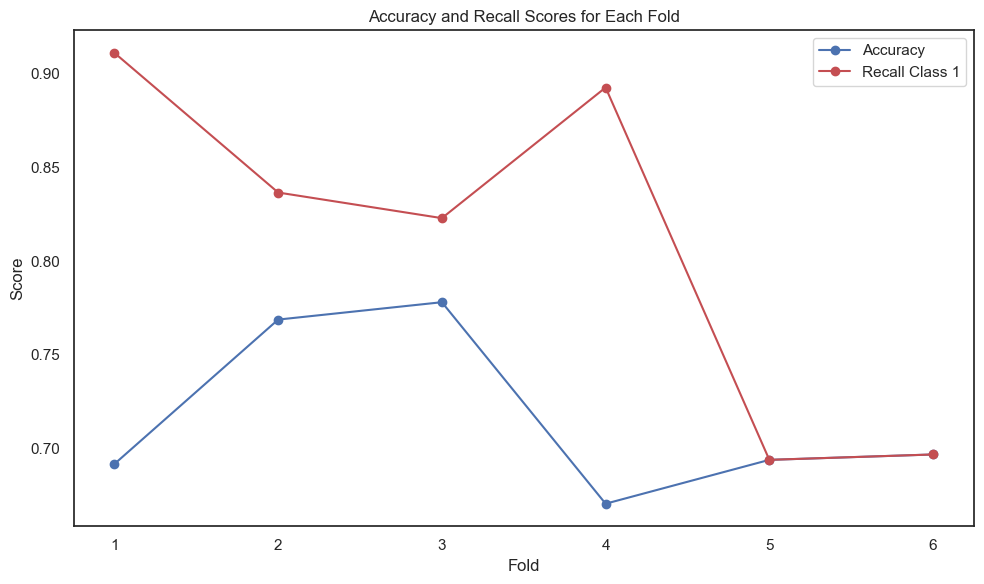

In [141]:
# Resultados de la validación cruzada
accuracy_scores = cv_results['test_accuracy']
recall_scores = cv_results['test_recall_class_1']

# Número de folds
n_folds = len(accuracy_scores)

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Graficar los accuracy scores
plt.plot(range(1, n_folds + 1), accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy')

# Graficar los recall scores
plt.plot(range(1, n_folds + 1), recall_scores, marker='o', linestyle='-', color='r', label='Recall Class 1')

# Títulos y etiquetas
plt.title('Accuracy and Recall Scores for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.xticks(range(1, n_folds + 1))

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [142]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, make_scorer, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Escalar los datasets
scaler = StandardScaler()
Xc_train_scaled = scaler.fit_transform(Xc_train)
Xc_test_scaled = scaler.transform(Xc_test)

# Funciones proporcionadas
def print_dataframe(filtered_cv_results):
    ### print de los resultados de cross validation
    for mean_precision, std_precision, mean_recall, std_recall, params in zip(
        filtered_cv_results["mean_test_precision"],
        filtered_cv_results["std_test_precision"],
        filtered_cv_results["mean_test_recall"],
        filtered_cv_results["std_test_recall"],
        filtered_cv_results["params"],
    ):
        print(
            f"precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
            f" recall: {mean_recall:0.3f} (±{std_recall:0.03f}),"
            f" for {params}"
        )
    print()

def refit_strategy(cv_results):
    precision_threshold = 0.7

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[
        cv_results_["mean_test_precision"] > precision_threshold
    ]

    print(f"Models with a precision higher than {precision_threshold}:")
    print_dataframe(high_precision_cv_results)

    if high_precision_cv_results.empty:
        raise ValueError("No models found with precision higher than threshold")

    high_precision_cv_results = high_precision_cv_results[
        [
            "mean_score_time",
            "mean_test_recall",
            "std_test_recall",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_recall",
            "rank_test_precision",
            "params",
        ]
    ]

    # Select the most performant models in terms of recall
    # (within 1 sigma from the best)
    best_recall_std = high_precision_cv_results["mean_test_recall"].std()
    best_recall = high_precision_cv_results["mean_test_recall"].max()
    best_recall_threshold = best_recall - best_recall_std

    high_recall_cv_results = high_precision_cv_results[
        high_precision_cv_results["mean_test_recall"] > best_recall_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest recall model:"
    )
    print_dataframe(high_recall_cv_results)

    if high_recall_cv_results.empty:
        print("No models found within one standard deviation of the highest recall")
        # Fall back to the best precision model if no recall model is found
        fastest_top_recall_high_precision_index = high_precision_cv_results["mean_score_time"].idxmin()
    else:
        # From the best candidates, select the fastest model to predict
        fastest_top_recall_high_precision_index = high_recall_cv_results[
            "mean_score_time"
        ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and recall.\n"
        "Its scoring time is:\n\n"
        f"{high_precision_cv_results.loc[fastest_top_recall_high_precision_index]}"
    )

    return fastest_top_recall_high_precision_index

# Definir los scorers
scoring = {
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1)
}

# Definir los parámetros a ajustar
tuned_parameters = [
    {"class_weight": [None, 'balanced'], 
     "max_iter": [200, 500]}
]

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(), tuned_parameters, scoring=scoring, refit=refit_strategy, cv=5
)

# Entrenar el modelo
grid_search.fit(Xc_train_scaled, yc_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Optimización del umbral de decisión
def find_best_threshold(model, X, y):
    y_proba = model.predict_proba(X)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y, y_proba)
    fscore = 2 * (precision * recall) / (precision + recall)
    ix = np.argmax(fscore)
    best_threshold = thresholds[ix] if thresholds.size > 0 else 0.5
    print(f'Best Threshold={best_threshold:.3f}, F-Score={fscore[ix]:.3f}')
    return best_threshold

best_threshold = find_best_threshold(best_model, Xc_test_scaled, yc_test)

# Predecir con el nuevo umbral
yc_proba = best_model.predict_proba(Xc_test_scaled)[:, 1]
yc_pred_adjusted = (yc_proba >= best_threshold).astype(int)

# Evaluar el modelo ajustado
adjusted_recall = recall_score(yc_test, yc_pred_adjusted, pos_label=1)
adjusted_precision = precision_score(yc_test, yc_pred_adjusted, pos_label=1)
print(f'Adjusted Recall: {adjusted_recall:.3f}')
print(f'Adjusted Precision: {adjusted_precision:.3f}')


All grid-search results:
precision: 0.726 (±0.029), recall: 0.536 (±0.022), for {'class_weight': None, 'max_iter': 200}
precision: 0.726 (±0.029), recall: 0.536 (±0.022), for {'class_weight': None, 'max_iter': 500}
precision: 0.540 (±0.022), recall: 0.778 (±0.022), for {'class_weight': 'balanced', 'max_iter': 200}
precision: 0.540 (±0.022), recall: 0.778 (±0.022), for {'class_weight': 'balanced', 'max_iter': 500}

Models with a precision higher than 0.7:
precision: 0.726 (±0.029), recall: 0.536 (±0.022), for {'class_weight': None, 'max_iter': 200}
precision: 0.726 (±0.029), recall: 0.536 (±0.022), for {'class_weight': None, 'max_iter': 500}

Out of the previously selected high precision models, we keep all the
the models within one standard deviation of the highest recall model:

No models found within one standard deviation of the highest recall

The selected final model is the fastest to predict out of the previously
selected subset of best models based on precision and recall.
Its s

El mejor umbral hallado es 0.379 con un F-Score de 0.65 y recall de 0.64. Nuestro modelo con oversampling sigue siendo el mejor para predecir si mañana lloverá, aunque hemos visto que es propenso a overfittear un poco.

# 6) Modelos base


### Clasificación


Primero probaremos un método basandonos en algún criterio ingenuo para el caso de clasificación. Que llueva hoy, ¿implica que lloverá mañana?

In [143]:
positivos = df_clasification[(df_clasification["RainToday_Yes"]==1) & (df_clasification["RainTomorrow_Yes"]==1)]
negativos = df_clasification[(df_clasification["RainToday_Yes"]==1) & (df_clasification["RainTomorrow_Yes"]==0)]

n = positivos.shape[0]
m = negativos.shape[0]
print(f"Implicancia: {int(n/(n+m)*100)}%.")

Implicancia: 46%.


¿Puedo predecir mañana con la lluvia de hoy?

In [144]:
positivos = df_clasification[(df_clasification["RainToday_Yes"]==df_clasification["RainTomorrow_Yes"])]

n = positivos.shape[0]
m = df_clasification.shape[0]
print(f"Igualdad: {int(n/(m)*100)}%.")

Igualdad: 74%.


Ahora utilizaremos un criterio de clasificación aleatorio

In [145]:
import random

In [146]:
def random_predict():
    answers = [True, False]
    eleccion = random.choice(answers)
    return eleccion

In [147]:
print(random_predict())

False


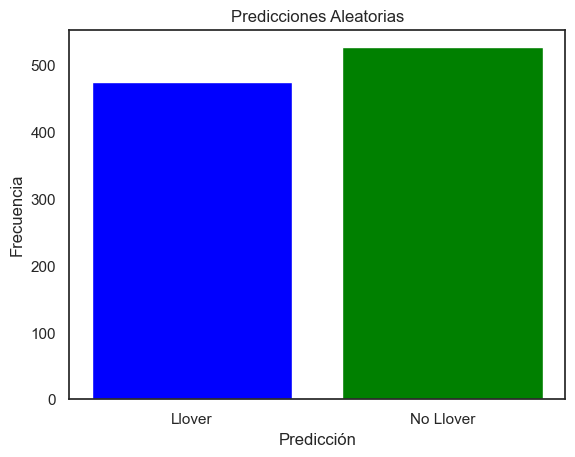

In [148]:
# Corremos esto para chequear que efectivamente el resultado es random
predicciones = [random_predict() for _ in range(1000)]

# Contar la cantidad de veces que se predijo "Mañana va llover."
contador_llover = predicciones.count(True)

# Crear un gráfico de barras
etiquetas = ["Llover", "No Llover"]
valores = [contador_llover, 1000 - contador_llover]

plt.bar(etiquetas, valores, color=['blue', 'green'])
plt.title('Predicciones Aleatorias')
plt.xlabel('Predicción')
plt.ylabel('Frecuencia')
plt.show()

También podríamos "desbalancear" la predicción aleatoria para que mantenga proporciones con los datos reales (~24% de días de lluvia)

False


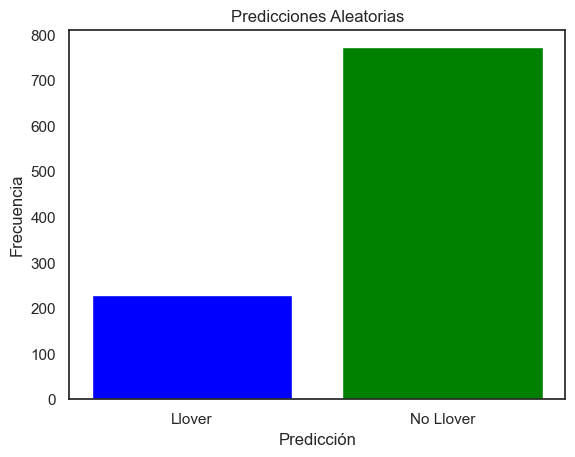

In [149]:
def random_predict_unbalanced():
    answers = [True, False]
    probab = [0.24, 0.76]
    eleccion = random.choices(answers, probab)[0]
    return eleccion

print(random_predict_unbalanced())

# Corremos esto para chequear que efectivamente el resultado es random
predicciones = [random_predict_unbalanced() for _ in range(1000)]

# Contar la cantidad de veces que se predijo "Mañana va llover."
contador_llover = predicciones.count(True)

# Crear un gráfico de barras
etiquetas = ["Llover", "No Llover"]
valores = [contador_llover, 1000 - contador_llover]

plt.bar(etiquetas, valores, color=['blue', 'green'])
plt.title('Predicciones Aleatorias')
plt.xlabel('Predicción')
plt.ylabel('Frecuencia')
plt.show()

¿Es mejor nuestra regresión logística que estos modelos base?

In [150]:
yc_random_pred_u = np.array([random_predict_unbalanced() for _ in range(4439)])
yc_random_pred = np.array([random_predict() for _ in range(4439)])
yc_tomorrow_equals_today = Xc_test["RainToday_Yes"].to_numpy()

print("Resultados regresión logística con Oversampling:\n")
print(classification_report(yc_test, yc_pred_ros))
print(confusion_matrix(yc_test, yc_pred_ros))

print("\n\nResultados predicción aleatoria:\n")
print(classification_report(yc_test, yc_random_pred))
print(confusion_matrix(yc_test, yc_random_pred))

print("\n\nResultados predicción aleatoria desbalanceada:\n")
print(classification_report(yc_test, yc_random_pred_u))
print(confusion_matrix(yc_test, yc_random_pred_u))

print("\n\nResultados predicción mañana = hoy:\n")
print(classification_report(yc_test, yc_tomorrow_equals_today))
print(confusion_matrix(yc_test, yc_tomorrow_equals_today))


Resultados regresión logística con Oversampling:

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      3426
           1       0.52      0.77      0.62      1013

    accuracy                           0.79      4439
   macro avg       0.72      0.78      0.74      4439
weighted avg       0.83      0.79      0.80      4439

[[2706  720]
 [ 229  784]]


Resultados predicción aleatoria:

              precision    recall  f1-score   support

           0       0.77      0.49      0.60      3426
           1       0.23      0.51      0.32      1013

    accuracy                           0.50      4439
   macro avg       0.50      0.50      0.46      4439
weighted avg       0.65      0.50      0.54      4439

[[1694 1732]
 [ 497  516]]


Resultados predicción aleatoria desbalanceada:

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3426
           1       0.23      0.23      0.23    

Observamos que nuestro modelo siempre es mejor para predecir, bajo cualquier parámetro.

En particular vemos que el modelo base mañana=hoy tiene muy buenas métricas para la clase 0 (atinarle que no va a llover) pero es bastante más malo para poder predecir cuando sí va a llover. Estos comportamientos se explican si suponemos que nuestra serie real se ve algo así:

11100000000000000110100100000000000000000000000011110100000000000000000

donde llueven pocos días, pero seguidos, y existen largas secuencias de ceros.

Además, de nuestros modelos aleatorios, el balanceado obtiene mejores métricas para predecir cuando sí va a llover, aunque sí da más falsos positivos (Recall sobre la clase 0: 0.51 vs 0.76).

### Regresión

En primer lugar probaremos prediccion por media y mediana

In [151]:
media_y_train = np.mean(y_train)
mediana_y_train = np.median(y_train)

In [152]:
# Creamos dos funciones para predicción usando la media y la mediana
def modelo_base_media(X):
    # Devuelve una serie del mismo tamaño que X con el valor de la media
    return pd.Series(media_y_train, index=X.index)

def modelo_base_mediana(X):
    # Devuelve una serie del mismo tamaño que X con el valor de la mediana
    return pd.Series(mediana_y_train, index=X.index)


In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [154]:
X_test1 = pd.DataFrame(X_test)
y_test1 = pd.Series(y_test.ravel())

# Predicciones
predicciones_media = modelo_base_media(X_test)
predicciones_mediana = modelo_base_mediana(X_test)

# Evaluación usando el error cuadrático medio (RMSE)
rmse_media = mean_squared_error(y_test, predicciones_media, squared=False)
rmse_mediana = mean_squared_error(y_test, predicciones_mediana, squared=False)

# Evaluación usando el coeficiente de determinación (R²)
r2_media = r2_score(y_test, predicciones_media)
r2_mediana = r2_score(y_test, predicciones_mediana)

print(f'RMSE usando la media: {rmse_media:.4f}')
print(f'RMSE usando la mediana: {rmse_mediana:.4f}')
print(f'R² usando la media: {r2_media:.4f}')
print(f'R² usando la mediana: {r2_mediana:.4f}')

RMSE usando la media: 5.9329
RMSE usando la mediana: 6.2688
R² usando la media: -0.0001
R² usando la mediana: -0.1165


Ahora utilizaremos regresión lineal simple, utilzando la variable con mayor correlación con la variable target.

In [155]:
X_train2 = X_train[['Humidity3pm']].values.reshape(-1, 1)
X_test2 = X_test[['Humidity3pm']].values.reshape(-1, 1) 
# y_train = y.iloc[:17778]
# y_test = y.iloc[17778:]

In [156]:
y_train

array([[0. ],
       [0. ],
       [0. ],
       ...,
       [1. ],
       [0. ],
       [0.2]])

In [157]:
y_test


array([[ 1.6],
       [ 5.6],
       [ 0. ],
       ...,
       [ 0. ],
       [ 1.6],
       [14.8]])

In [158]:
# Verificar las formas de los datos
print(f'X_train2 shape: {X_train2.shape}')
print(f'X_test2 shape: {X_test2.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train2 shape: (17773, 1)
X_test2 shape: (4444, 1)
y_train shape: (17773, 1)
y_test shape: (4444, 1)


In [159]:
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

# Creamos y entrenamos el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train2_scaled, y_train)

# Predicciones sobre el conjunto de prueba
predicciones = modelo.predict(X_test2_scaled)

# Cálculo de métricas
rmse = mean_squared_error(y_test, predicciones, squared=False)
r2 = r2_score(y_test, predicciones)


print("Pendiente:", modelo.coef_)
print("Ordenada al origen:", modelo.intercept_)

# Métricas
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

Pendiente: [[0.03085325]]
Ordenada al origen: [1.97823102]
RMSE: 5.9325
R²: 0.0001


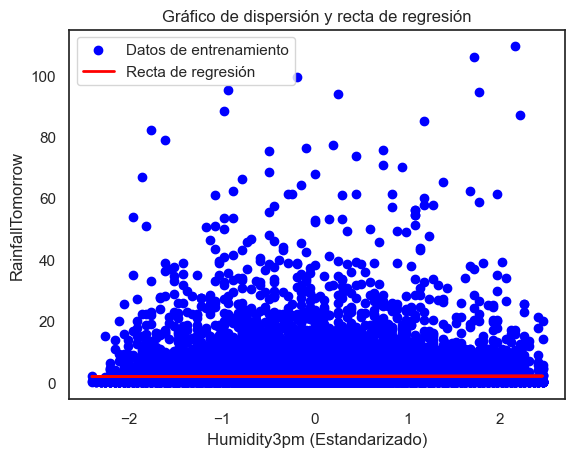

In [160]:
# Predicciones del modelo sobre el conjunto de entrenamiento
predicciones_entrenamiento = modelo.predict(X_train2_scaled)

# Gráfico de dispersión de los datos de entrenamiento
plt.scatter(X_train2_scaled, y_train, color='blue', label='Datos de entrenamiento')

# Gráfico de la recta de regresión
plt.plot(X_train2_scaled, predicciones_entrenamiento, color='red', linewidth=2, label='Recta de regresión')

# Añadir etiquetas y leyenda
plt.xlabel('Humidity3pm (Estandarizado)')
plt.ylabel('RainfallTomorrow')
plt.title('Gráfico de dispersión y recta de regresión')
plt.legend()
#plt.ylim(1, 5)

# Mostrar la gráfica
plt.show()

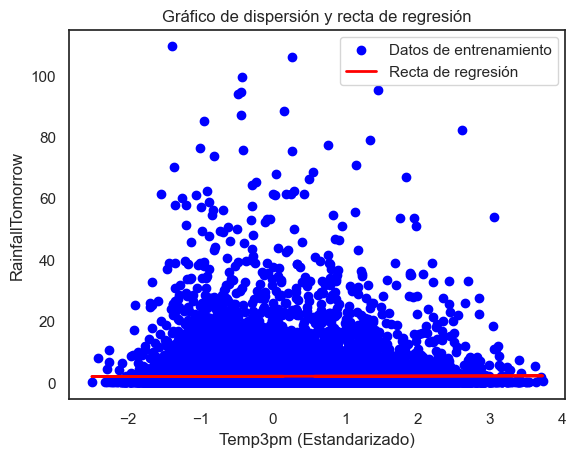

In [161]:
X_train2 = X_train[['Temp3pm']].values.reshape(-1, 1)
X_test2 = X_test[['Temp3pm']].values.reshape(-1, 1)

scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

# Creamos y entrenamos el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train2_scaled, y_train)

# Predicciones sobre el conjunto de prueba
predicciones = modelo.predict(X_test2_scaled)

# Predicciones del modelo sobre el conjunto de entrenamiento
predicciones_entrenamiento = modelo.predict(X_train2_scaled)

# Gráfico de dispersión de los datos de entrenamiento
plt.scatter(X_train2_scaled, y_train, color='blue', label='Datos de entrenamiento')

# Gráfico de la recta de regresión
plt.plot(X_train2_scaled, predicciones_entrenamiento, color='red', linewidth=2, label='Recta de regresión')

# Añadir etiquetas y leyenda
plt.xlabel('Temp3pm (Estandarizado)')
plt.ylabel('RainfallTomorrow')
plt.title('Gráfico de dispersión y recta de regresión')
plt.legend()
#plt.ylim(1, 5)

# Mostrar la gráfica
plt.show()

Notamos que no existe una variable que, por sí sola, prediga de una buena forma la cantidad de lluvia de mañana.


Además, vemos que ambas métricas dan peores resutlados que los algoritmos utilizado en el apartado de regresión lineal

# 8) Implementación de explicabilidad del modelo

In [162]:
Xc_train = Xc.iloc[:17778]
Xc_test = Xc.iloc[17778:]
yc_train = yc.iloc[:17778]
yc_test = yc.iloc[17778:]

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xc_train)
X_test_scaled = scaler.transform(Xc_test)

# Inicializar y entrenar un modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, yc_train)

type(model)

sklearn.linear_model._logistic.LogisticRegression

In [163]:
feature_names=Xc_train.columns.values
feature_names

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday_Yes', 'dia', 'año'], dtype=object)

In [164]:
df_coeficientes=pd.DataFrame(model.coef_.T, index=feature_names)
df_coeficientes

0
MinTemp        0.019132
MaxTemp       -0.255654
Rainfall       0.103646
Evaporation    0.026319
Sunshine      -0.395755
WindGustDir    0.120524
WindGustSpeed  0.708691
WindDir9am    -0.099884
WindDir3pm     0.068947
WindSpeed9am  -0.078334
WindSpeed3pm  -0.149481
Humidity9am   -0.025133
Humidity3pm    1.106926
Pressure9am    1.084793
Pressure3pm   -1.576736
Cloud9am      -0.043319
Cloud3pm       0.324187
Temp9am       -0.018630
Temp3pm        0.260632
RainToday_Yes  0.259186
dia           -0.027123
año            0.091258

En esta tabla podemos ver los coeficientes de cada variable, los cuales indican cómo cada característica afecta la probabilidad de que una observación pertenezca a la clase positiva, que en nuestro caso es que llueve mañana.
A continuación veremos estos mismo valores en un gráfico.

<Axes: >

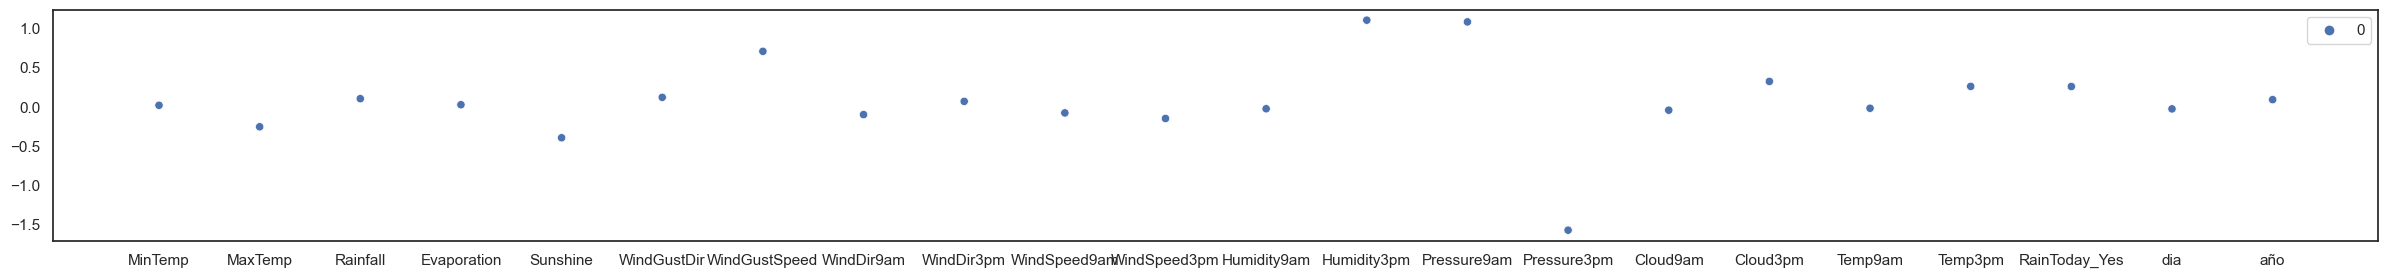

In [165]:
fig, ax=plt.subplots(1,1,figsize=(30,3))
sns.scatterplot(data=df_coeficientes, ax=ax)

En este grafico vemos los coeficientes de las features, al igual que en la tabla, podemos observar como afectan a la variable target y que peso tienen sobre ella.
Vemos que las caracteristicas que más peso tienen sobre la target son:
- Humedad a las 3 p.m, ráfagas de viento a las 9 p.m: a medida que cualquiera de estas variables aumentan, aumenta la probabilidad de la clase 1.
- Presión a las 3 pm: a medida que esta decrece, aumente la probabilidad de la clase 1.


In [166]:
import shap

In [167]:
# Crea un objeto explainer SHAP
explainer = shap.LinearExplainer(model, X_test_scaled, feature_names=feature_names)

In [168]:
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(X_test_scaled)

In [169]:
shap_values.shape

(4439, 22)

In [170]:
explainer.expected_value.round(4)

-1.5113

Este valor base no es una probabilidad. Para obtener la probabilidad, es necesario aplicar la función sigmoide.

In [171]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

log_odds = explainer.expected_value.round(4)
probability = sigmoid(log_odds)

print("Log-odds:", log_odds)
print("Probability:", probability.round(4))

Log-odds: -1.5113
Probability: 0.1807


Esto significa que, en promedio, el modelo predice una probabilidad del 18.07% para la clase positiva, es decir, que llueve mañana.

### Interpretabilidad local


Observemos si el modelo SHAP es correcto, es decir, si la sigmoide aplicada al base + sumatoria de los valores coincide con la predicción del modelo para la clase 1.

In [172]:
model.predict_proba(X_test_scaled)[0][1].round(3) == sigmoid(explainer.expected_value + shap_values[0].sum()).round(3)

True

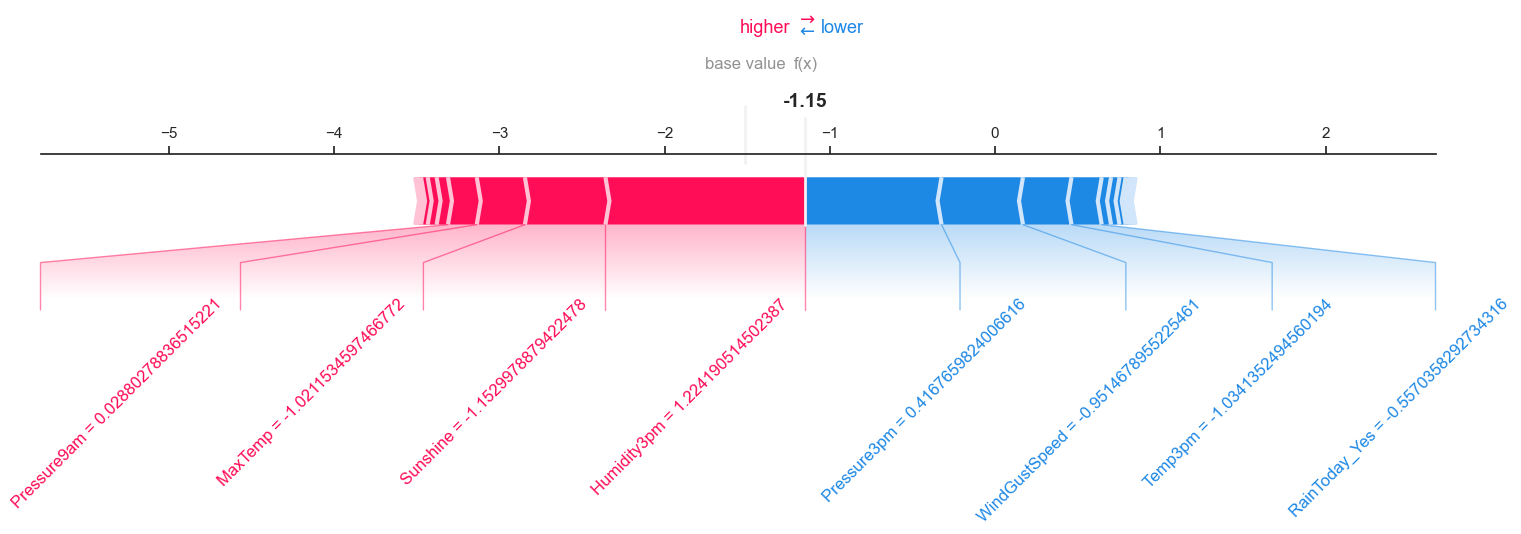

In [173]:
index=0
shap.force_plot(explainer.expected_value, shap_values[index], X_test_scaled[index],
                feature_names=feature_names, matplotlib=True, figsize=(18, 4),
                text_rotation=45)

El valor base: -1.15 es el valor esperado del modelo el cual representa la predicción del modelo promedio antes de considerar los efectos de las características individuales.

Por otro lado, las barras rojas indican características que empujan la predicción hacia una mayor probabilidad de la clase 1 (llueve mañana). Mientras que las barras azules indican características que empujan la predicciónhacia una menor probabilidad de la clase 1, en el caso de la muestra 0 del conjunto de test.

In [174]:
print(f"Para la muestra número {index} del conjunto de test, el modelo predijo {model.predict(X_test_scaled)[index]}.\nProbabilidades de no lluvia: {model.predict_proba(X_test_scaled)[index][0].round(3)}.\nProbabilidades de lluvia: {model.predict_proba(X_test_scaled)[index][1].round(3)}.")

Para la muestra número 0 del conjunto de test, el modelo predijo 0.
Probabilidades de no lluvia: 0.759.
Probabilidades de lluvia: 0.241.


Para la primera muestra, podemos observar la base (-1.15) y cómo afectaron a esta "probabilidad" (previo a aplicar la sigmoide) cada una de las variables, siendo las más significativas (en valor absoluto) Humidity3pm y WindGustSpeed.

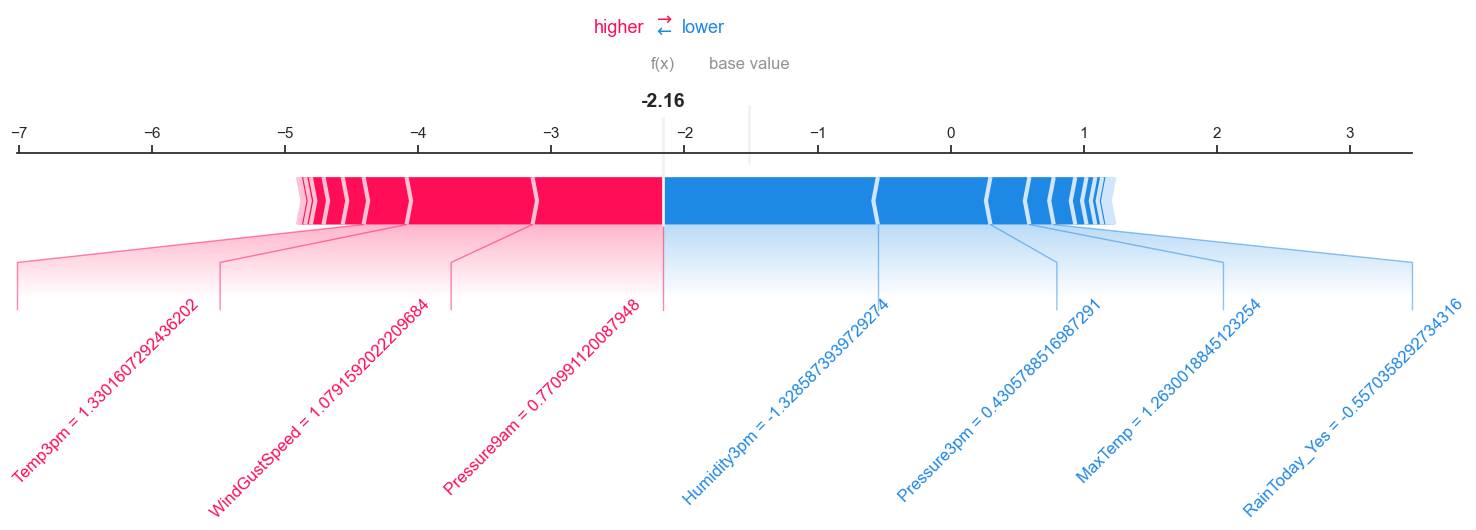

Para la muestra número 25 del conjunto de test, el modelo predijo 0.
Probabilidades de no lluvia: 0.9.
Probabilidades de lluvia: 0.1.


In [175]:
index=25
shap.force_plot(explainer.expected_value, shap_values[index], X_test_scaled[index],
                feature_names=feature_names, matplotlib=True, figsize=(18, 4),
                text_rotation=45)
print(f"Para la muestra número {index} del conjunto de test, el modelo predijo {model.predict(X_test_scaled)[index]}.\nProbabilidades de no lluvia: {model.predict_proba(X_test_scaled)[index][0].round(2)}.\nProbabilidades de lluvia: {model.predict_proba(X_test_scaled)[index][1].round(2)}.")


In [176]:
explanation = shap.Explanation(values=shap_values[index], base_values=explainer.expected_value, feature_names=feature_names)

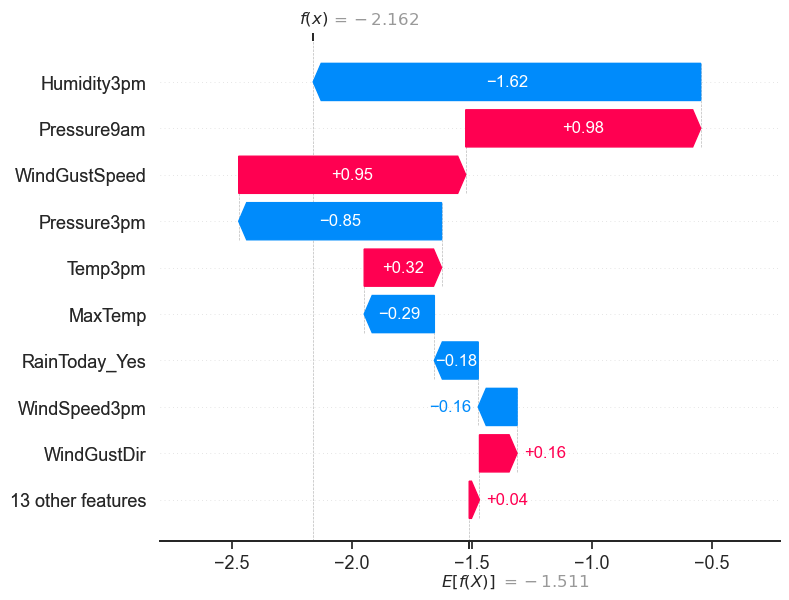

In [177]:
shap.plots.waterfall(explanation)

En los gráficos anteriores vemos que para la muestra 25, la probabilidad asociada con un log-odds de -2.162 es aproximadamente el 10.32%. Esto significa que, según el modelo, la probabilidad de que la instancia pertenezca a la clase 1 es aproximadamente del 10.32%.

Mostramos las 5 primeras, ya que las demas vemos que tienen una constricuion pequeña sobre la clase positiva en este registro

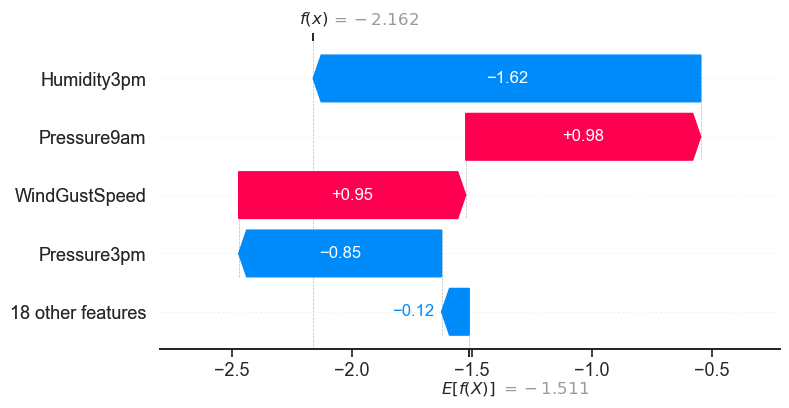

In [178]:
shap.plots.waterfall(explanation, max_display=5)

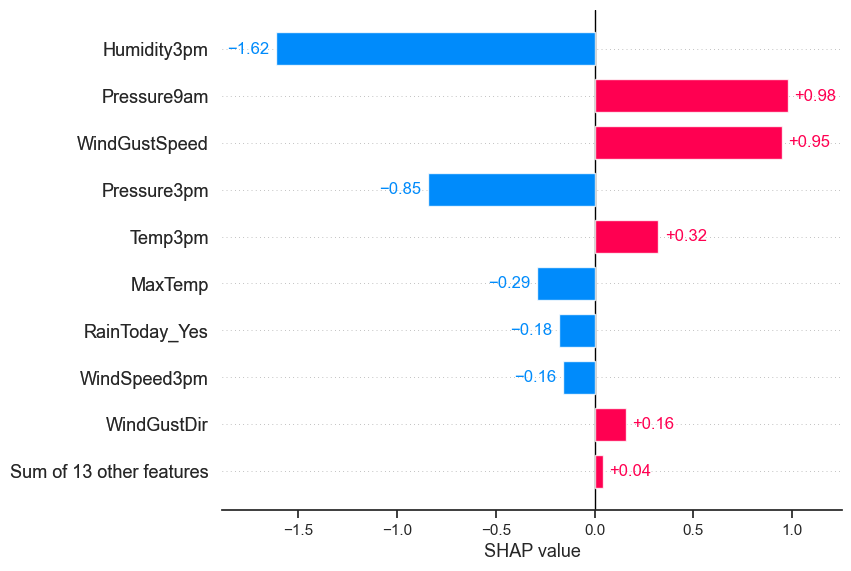

In [179]:
shap.plots.bar(explanation)

### Interpretabilidad global

In [180]:
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, feature_names=feature_names, data=X_test_scaled)

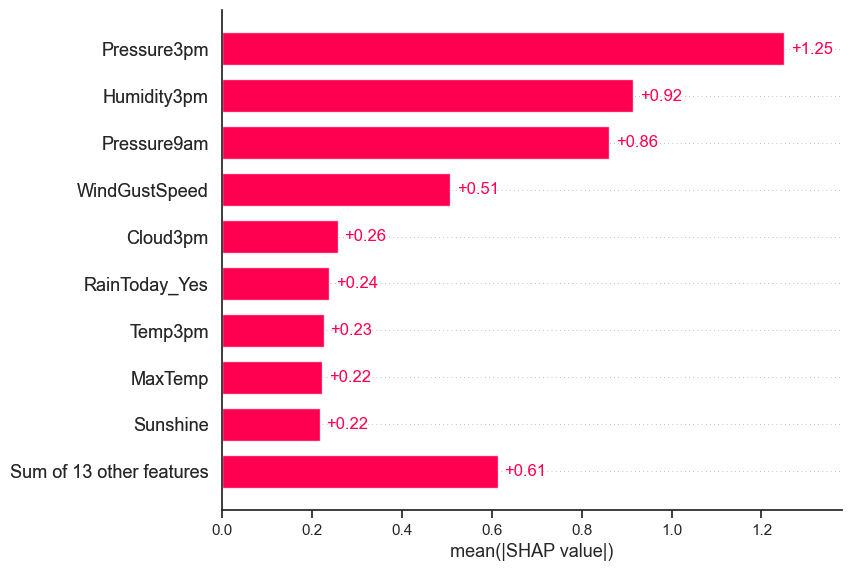

In [181]:
shap.plots.bar(explanation)

En este gráfico podemos ver que la variable con peso mas fuerte en la predicción de la variable target es la presión a las 3pm y la cantidad de humedad a las 3 p.m, seguida por la presión atmosférica a las 9am  y la velocidad máxima del viento ese día.

In [182]:
explanation

.values =
array([[-0.01741637,  0.29152115, -0.03712235, ..., -0.18290154,
         0.04027663, -0.05144468],
       [-0.02972123,  0.19672369, -0.04058526, ..., -0.18290154,
         0.04029085, -0.05144468],
       [-0.01475586, -0.00045503, -0.04058526, ..., -0.18290154,
         0.04029085, -0.05144468],
       ...,
       [-0.01176278,  0.38252672, -0.01634492, ...,  0.42677026,
        -0.00305178,  0.03358785],
       [-0.02340252,  0.38252672, -0.00249329, ...,  0.42677026,
        -0.00305178,  0.03358785],
       [-0.00577663,  0.11709382, -0.04058526, ..., -0.18290154,
        -0.00305178,  0.03358785]])

.base_values =
-1.5113233886118418

.data =
array([[-0.71656134, -1.02115346, -0.29766491, ..., -0.55703583,
        -1.40344413,  1.57186423],
       [-1.35970954, -0.65034902, -0.33107582, ..., -0.55703583,
        -1.40396852,  1.57186423],
       [-0.57750227,  0.12092421, -0.33107582, ..., -0.55703583,
        -1.40396852,  1.57186423],
       ...,
       [-0.42106082,

In [183]:
type(explanation)

shap._explanation.Explanation

In [184]:
explanation_dict = explanation.__dict__
print(explanation_dict.keys())

dict_keys(['op_history', 'compute_time', 'output_dims', '_s'])


In [185]:
# aux = [
#     "Llueve" if explanation.data['RainTomorrow_Yes'].iloc[i] == 1 else "No llueve"
#     for i in range(explanation.shape[0])
# ]
# shap.plots.bar(explanation.cohorts(aux).abs.mean(0))

In [186]:
Xc_test.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  4439.000000  4439.000000  4439.000000  4439.000000  4439.000000   
mean     11.796598    23.210002     2.016806     5.329241     7.729534   
std       5.803975     7.165541     6.309941     5.746784     2.652718   
min      -5.500000     7.100000     0.000000     0.000000     0.000000   
25%       7.800000    17.400000     0.000000     2.800000     6.500000   
50%      11.600000    22.500000     0.000000     4.000000     8.100000   
75%      15.600000    28.100000     0.800000     5.800000     9.900000   
max      31.400000    46.600000    94.400000    86.200000    13.800000   

       WindGustDir  WindGustSpeed   WindDir9am   WindDir3pm  WindSpeed9am  \
count  4439.000000    4439.000000  4439.000000  4439.000000   4439.000000   
mean    183.781257      38.942780   154.544943   190.725389     12.924533   
std     103.989598      12.762851   111.237843   100.418417      7.872830   
min       0.000000       9.000000     0.000000     0.000000      0.000000   
25%     112.500000      30.000000    45.000000   112.500000      7.000000   
50%     202.500000      37.000000   157.500000   202.500000     11.000000   
75%     270.000000      46.000000   258.750000   270.000000     19.000000   
max     337.500000     104.000000   337.500000   337.500000     50.000000   

       ...  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am     Cloud3pm  \
count  ...  4439.000000  4439.000000  4439.000000  4439.000000  4439.000000   
mean   ...    49.221446  1017.792814  1015.718563     5.251524     4.905040   
std    ...    20.365439     7.503677     7.274661     2.319164     2.308713   
min    ...     4.000000   982.300000   984.900000     0.000000     0.000000   
25%    ...    33.000000  1013.000000  1011.000000     4.808130     4.000000   
50%    ...    49.000000  1017.900000  1015.900000     4.808130     4.801005   
75%    ...    63.000000  1022.700000  1020.500000     7.000000     7.000000   
max    ...   100.000000  1040.300000  1036.700000     8.000000     8.000000   

           Temp9am      Temp3pm  RainToday_Yes          dia          año  
count  4439.000000  4439.000000    4439.000000  4439.000000  4439.000000  
mean     16.296058    21.651476       0.228205     0.088774  2016.129083  
std       5.892565     7.014043       0.419722     0.705696     0.637395  
min      -1.100000     5.300000       0.000000    -0.999991  2015.000000  
25%      12.100000    16.100000       0.000000    -0.622047  2016.000000  
50%      15.800000    20.700000       0.000000     0.205104  2016.000000  
75%      19.900000    26.300000       0.000000     0.774884  2017.000000  
max      37.500000    45.200000       1.000000     0.999991  2017.000000  

[8 rows x 22 columns]

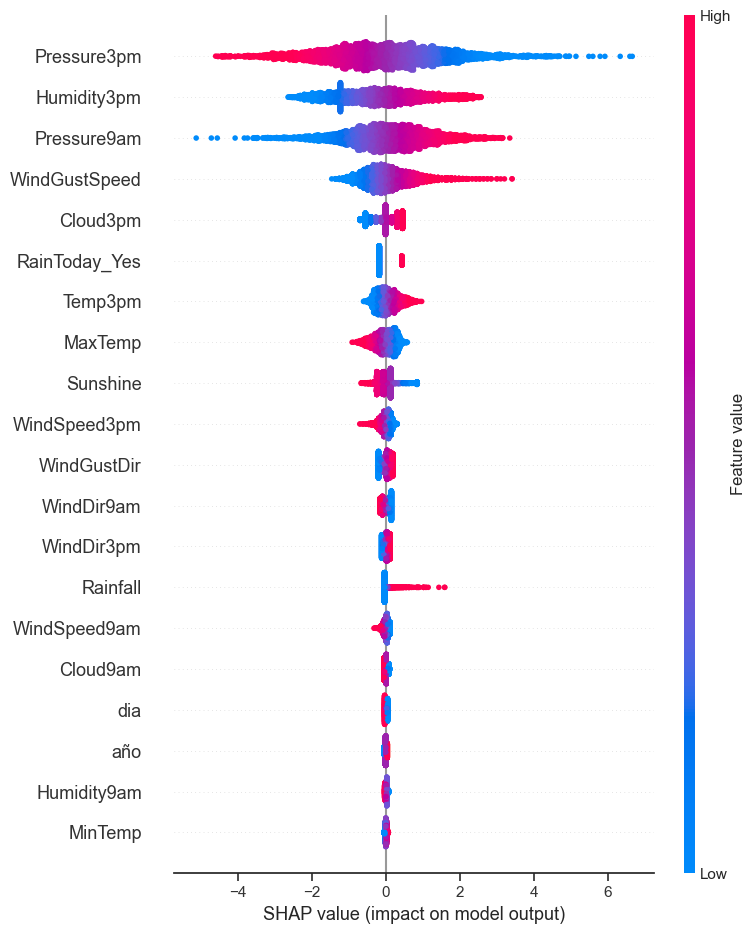

In [187]:
# Resumen de los valores SHAP
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)


In [188]:
feature_names

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday_Yes', 'dia', 'año'], dtype=object)

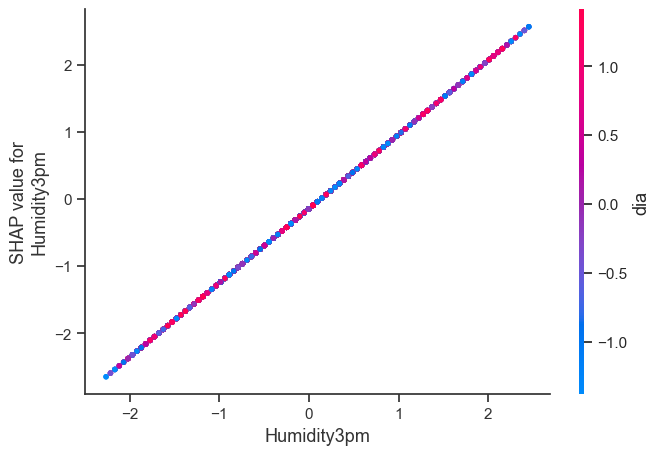

In [189]:
# Gráfico de dependencia para una característica específica (e.g., primera característica)
shap.dependence_plot(12, shap_values, X_test_scaled, feature_names=feature_names)

La gráfica muestra una relación lineal casi perfecta entre "Humidity3pm" y su valor SHAP. Esto indica que a medida que la humedad a las 3 PM aumenta, su impacto en la predicción del modelo también aumenta linealmente. 

# 9) Redes Neuronales

A continuación implementaremos las soluciones utilizando redes neuronales.

## Red Neuronal para regresión 

En este caso utilizaremos TensorFlow.

Para esto utilizaremos el mismo data set, con el mismo escalamiento, etc. para el caso de regresión lineal.

X_train, y_train
y_pred
y_pred = model.predict(X_test)
y_test
y_pred_2
y_pred_2 = model.predict(X_train)

En gradiente descendiente las pisamos

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [190]:
class NeuralNetworkTensorFlow:
    """
    Este es un modelo simple con TensorFlow para resolver el mismo problema. 
    En esta clase, (1) se construye el modelo.
    (2) Se define como se fitea el modelo
    (3) Y como se hacen las predicciones.
    """
    # def __init__(self, input_shape):
    #     self.model = self.build_model(input_shape)
    def __init__(self, input_shape, optimizer='adam', loss='mean_squared_error'):
        self.input_shape = input_shape
        self.optimizer = optimizer
        self.loss = loss
        self.model = self.build_model(input_shape)

    def build_model(self, input_shape):
        """
        Construye el modelo
        Para construir el modelo es necesario una arquitectura, un optimizador y una función de pérdida.
        La arquitectura se construye con el método Sequential, que básicamente lo que hace es colocar 
        secuencialmente las capas que uno desea.
        Las capas "Dense" son las fully connected dadas en clase.
        Se agrega una capa oculta que recibe un input de tamaño 28,
        y una capa de salida de regresión (una única neurona)
        En todos los casos se define una sigmoidea como función de activación (prueben otras!)

        El optimizador y la función de pérdida se especifican dentro de un compilador.

        Con este método, lo que se devuelve es el modelo sin entrenar, sería equivalente a escribir LinearRegression() 
        en el caso de la regresión lineal.
        """
        model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')
        # Imprimimos la cantidad de parámetros a modo de ejemplo
        print("n° de parámetros:", model.count_params())
        return model
    
    def fit(self, X, y, lr=0.1, epochs=20000):
        """
        Esta es la función donde se entrena el modelo, fijarse que hay un learning rate e iteraciones.
        La función que fitea devuelve una historia de pérdida, que vamos a guardar para graficar la evolución.
        """
        X = np.array(X)
        y = np.array(y)
        history = self.model.fit(X, y, epochs=epochs, verbose=0)
        return history.history['loss']

    def predict(self, X):
        X = np.array(X)
        predictions = self.model.predict(X)
        return predictions


In [191]:
X = data_new #Contiene las 10 columas que mayor correlación tenáin con la variable target
y = df_regresion['RainfallTomorrow']

Como para regresión utilizamos las 10 columnas que tenian mayor correlacion con la variable de salida, en este caso decidimos hacer lo mismo para poder comparar y resultados.

Como las variables x e y las pisamos varias veces a lo largo del data set, para asegurarnos de estar usando las mismas que en regresion lineal las volvemos a calcular. Más que nada para evitar errores

In [192]:
# Dividimos los dato de la misma manera que ya lo habíamos hecho anteriormente
X_train = X.iloc[:17778]
X_test = X.iloc[17778:]
y_train = y.iloc[:17778]
y_test = y.iloc[17778:]

In [193]:
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [194]:
input_shape = (X_train_scaled.shape[1],)
nn_tensorflow = NeuralNetworkTensorFlow(input_shape)
loss_history = nn_tensorflow.fit(X_train_scaled, y_train, lr=0.01, epochs=100)

n° de parámetros: 3329


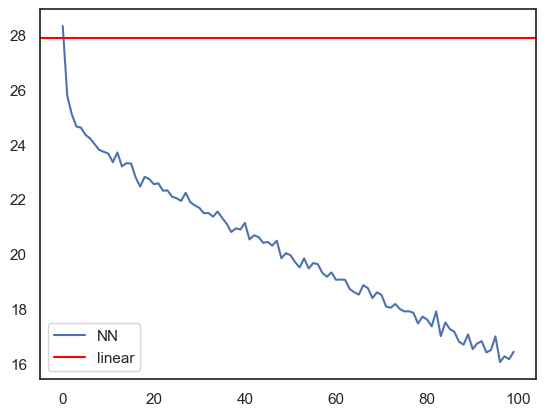

In [195]:
plt.plot(loss_history, label='NN')
plt.axhline(mse_linear_model, color='red', label='linear',linestyle = '-')
plt.legend()
plt.show()

In [196]:
predictions = nn_tensorflow.predict(X_test_scaled)
print("Predicciones:", predictions)

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
Predicciones: [[0.9609458 ]
 [0.40618533]
 [0.35843256]
 ...
 [0.3589242 ]
 [0.57784224]
 [0.21079773]]


In [197]:
pred = nn_tensorflow.predict(X_test_scaled)
pred_2 = nn_tensorflow.predict(X_train_scaled)

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
556/556 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step


In [198]:
# Calculamos métricas tanto para test como para train 
mse_rn = mean_squared_error(y_test, pred)
mse_rn_train = mean_squared_error(y_train, pred_2)
rmse_rn = mean_squared_error(y_test, pred, squared=False)  # squared=False devuelve la raíz cuadrada del MSE
rmse_rn_train = mean_squared_error(y_train, pred_2, squared=False)
mae_rn = mean_absolute_error(y_test, pred)
mae_rn_train = mean_absolute_error(y_train, pred_2)
r2_rn = r2_score(y_test, pred)
r2_rn_train = r2_score(y_train, pred_2)


data_rn = {
    'Métrica': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Test': [mse_rn, rmse_rn, mae_rn, r2_rn],
    'Train': [mse_rn_train, rmse_rn_train, mae_rn_train, r2_rn_train]
}

df_rn = pd.DataFrame(data_rn)
print(df_rn)

  Métrica       Test      Train
0     MSE  31.069596  16.119252
1    RMSE   5.574011   4.014879
2     MAE   2.160228   1.788741
3      R²   0.219473   0.550029


**Conclusiones:**

* Podemos obervar que las métricas de entrenamiento son significativamente mejores que las de prueba. Esto sugiere que la red neuronal está sobreajustada. Es decir, el modelo funciona muy bien con los datos de entrenamiento, pero su rendimiento disminuye considerablemente en el conjunto de prueba.
El coeficiente de detemrinación también nos indica presencia de sobreajuste ya que es mayor el de entrenamiento que el de prueba.
* Errores Absolutos y Cuadráticos: Los valores de MSE y RMSE son mucho menores en el conjunto de entrenamiento que en el conjunto de prueba, indicando que los errores son más grandes cuando se trata de datos no vistos.


Para evitar el sobreajuste podríamos implementar algunas técnicas de regularizaicón, como dropout o L2 regularization.
También vamos a utilizar validación cruzada para evaluar el desempeño del modelo de manera más robusta y asegurar que los resultados sean consistentes.
Por otro lado, ajustar la Arquitectura del Modelo: vamos a experimentar con diferentes arquitecturas de red neuronal (número de capas, número de neuronas por capa) para encontrar una configuración que generalice mejor a nuevos datos.

### Optimización de hiperparamétros

In [199]:
def objective(trial):
    # Defimos los parámetros a optimizar
    optimizer = trial.suggest_categorical('optimizer', ['adam', 'sgd'])
    epochs = trial.suggest_int('epochs', 100, 200)
    
    # Creamod el modelo con los parámetros sugeridos por Optuna
    model = NeuralNetworkTensorFlow(input_shape=(Xc_train.shape[1],), optimizer=optimizer)
    
    # Entrena el modelo
    model.fit(Xc_train, yc_train, epochs=epochs)
    
    # Calculamos la métrica de evaluación (puedes usar la métrica que desees)
    # Por ejemplo, podrías usar la pérdida en un conjunto de validación
    # En este ejemplo, simplemente uso la pérdida en el conjunto de entrenamiento
    loss = model.model.evaluate(Xc_train, yc_train, verbose=0)
    
    return loss

In [200]:
study = optuna.create_study(direction='minimize')  # Queremos minimizar la pérdida
study.optimize(objective, n_trials=5)  # Ajustar el número de trials según tus recursos

# Muestra los resultados
print("Mejor valor de pérdida:", study.best_value)
print("Mejores hiperparámetros:", study.best_params)

[I 2024-06-09 19:08:42,175] A new study created in memory with name: no-name-544f11c7-b12a-489e-92b7-9fb5aa06b9c4


n° de parámetros: 4097


[I 2024-06-09 19:10:06,085] Trial 0 finished with value: 0.11229386925697327 and parameters: {'optimizer': 'sgd', 'epochs': 189}. Best is trial 0 with value: 0.11229386925697327.


n° de parámetros: 4097


[I 2024-06-09 19:11:27,500] Trial 1 finished with value: 0.18064716458320618 and parameters: {'optimizer': 'adam', 'epochs': 175}. Best is trial 0 with value: 0.11229386925697327.


n° de parámetros: 4097


[I 2024-06-09 19:12:19,068] Trial 2 finished with value: 0.11654777079820633 and parameters: {'optimizer': 'sgd', 'epochs': 118}. Best is trial 0 with value: 0.11229386925697327.


n° de parámetros: 4097


[I 2024-06-09 19:13:24,185] Trial 3 finished with value: 0.11339375376701355 and parameters: {'optimizer': 'adam', 'epochs': 150}. Best is trial 0 with value: 0.11229386925697327.


n° de parámetros: 4097


[I 2024-06-09 19:14:23,299] Trial 4 finished with value: 0.11667007952928543 and parameters: {'optimizer': 'sgd', 'epochs': 131}. Best is trial 0 with value: 0.11229386925697327.


Mejor valor de pérdida: 0.11229386925697327
Mejores hiperparámetros: {'optimizer': 'sgd', 'epochs': 189}


## Red neuronal para clasificación

In [268]:
class NeuralNetwork:
    def __init__(self, epochs=50, batch_size=16, learning_rate=0.01):
        # Inicializamos algunos parámetros como épocas, batch_size, learning rate
        # (no son necesarios)
        # Se puede agregar la cantidad de capas, la cantidad de neuronas por capa 
        # (pensando en hacer una clase que pueda ser usada para cualquier caso)
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.model = None

    def build_model(self, input_shape, num_classes):
        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
            # en la ultima capa tenemos que usar sigmoid porque estamos en un problema
            # de clasificación multiclase
        ])

        # Compilamos el modelo con el optimizador Adam, la función de pérdida binary_crossentropy y la métrica accuracy

        optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        self.model = model

    def train(self, X_train, y_train, X_valid, y_valid):
        # Fit del modelo. 
        # Devolvemos la evolución de la función de pérdida, ya que es interesante ver como varía a medida que aumentan las épocas
        history=self.model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=self.epochs, batch_size=self.batch_size)
        return history.history['loss']

    def evaluate(self, X_test, y_test):
        # Evaluamos en test en test
        loss, accuracy = self.model.evaluate(X_test, y_test)
        print(f"test accuracy: {accuracy:.4f}")

    def predict(self, X_new):
        predictions = self.model.predict(X_new)
        return predictions


In [269]:
Xc = df_clasification.drop(columns="RainTomorrow_Yes")
yc = df_clasification['RainTomorrow_Yes']

In [270]:
Xc.shape

(22217, 22)

In [271]:
Xc_train = Xc.iloc[:17778]
Xc_test = Xc.iloc[17778:]
yc_train = yc.iloc[:17778]
yc_test = yc.iloc[17778:]

In [272]:
# Descomentar si queremos ver tamaños
# print(Xc_train.shape, Xc_test.shape, yc_train.shape, yc_test.shape)

In [273]:
nn = NeuralNetwork(epochs=50, batch_size=16, learning_rate=0.01)

Xc_train_scaled = scaler.fit_transform(Xc_train)  # Escalar antes de dividir

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
Xc_train_resampled, yc_train_resampled = smote.fit_resample(Xc_train, yc_train)

Xc_train, Xc_valid, yc_train, yc_valid = train_test_split(Xc_train_scaled, yc_train, test_size=0.2, random_state=42)

In [274]:
# Construimos el modelo
nn.build_model(input_shape=Xc_train.shape[1], num_classes=1)

# Entrenamos el modelo
history=nn.train(Xc_train, yc_train, Xc_valid, yc_valid)

Epoch 1/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8227 - loss: 0.4045 - val_accuracy: 0.8476 - val_loss: 0.3559
Epoch 2/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 0.8343 - loss: 0.3711 - val_accuracy: 0.8473 - val_loss: 0.3584
Epoch 3/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8448 - loss: 0.3563 - val_accuracy: 0.8493 - val_loss: 0.3570
Epoch 4/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8430 - loss: 0.3579 - val_accuracy: 0.8510 - val_loss: 0.3509
Epoch 5/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8531 - loss: 0.3490 - val_accuracy: 0.8493 - val_loss: 0.3554
Epoch 6/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.8534 - loss: 0.3471 - val_accuracy: 0.8498 - val_loss: 0.3517
Epoch 7/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8536 - loss: 0.3400 - val_accuracy: 0.8504 - val_loss: 0.3564
Epoch 8/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8522 - loss: 0.3393 - val_accuracy

In [275]:
# Evaluamos las metricas
nn.evaluate(Xc_test, yc_test)

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.7992 - loss: 5720.5693
test accuracy: 0.7718


In [276]:
predictions_c=nn.predict(Xc_test)

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [277]:
zeros_count_p = np.sum(predictions_c == 0)
ones_count_p = np.sum(predictions_c == 1)

print("Cantidad de ceros en la predicción:", zeros_count_p)
print("Cantidad de unos en la predicción:", ones_count_p)

zeros_count = np.sum(yc_test == 0)
ones_count = np.sum(yc_test == 1)

print("Cantidad de ceros en test:", zeros_count)
print("Cantidad de unos en test:", ones_count)

Cantidad de ceros en la predicción: 4439
Cantidad de unos en la predicción: 0
Cantidad de ceros en test: 3426
Cantidad de unos en test: 1013


In [278]:
from sklearn.metrics import  f1_score 
# Cálculamos las demás métricas
precision_rn = precision_score(yc_test, predictions_c)
recall_rn = recall_score(yc_test, predictions_c)
f1_rn = f1_score(yc_test, predictions_c)

# print(f"Precision: {precision_rn:.4f}")
# print(f"Recall: {recall_rn:.4f}")
# print(f"F1-Score: {f1_rn:.4f}")

print(classification_report(yc_test, predictions_c))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3426
           1       0.00      0.00      0.00      1013

    accuracy                           0.77      4439
   macro avg       0.39      0.50      0.44      4439
weighted avg       0.60      0.77      0.67      4439



La primera vez que corrimos la red obtuvimos lo siguiente:

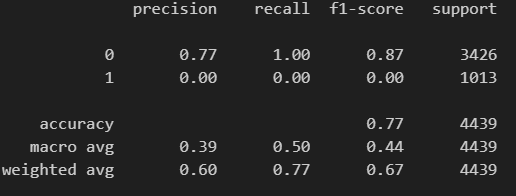

Podemos observar que la clase 1 tiene una precisión, recall y f1-score de 0.00, lo que indica que el modelo no está prediciendo correctamente ninguna instancia de la clase 1.

Por otro lado, como el modelo tiene una precisión, recall y f1-score perfectos para la clase 0, lo que significa que está clasificando casi todas las instancias como clase 0.

Volvimos a correr la red agregando este código, con el fin de balancear las clases.

smote = SMOTE(random_state=42)
Xc_train_resampled, yc_train_resampled = smote.fit_resample(Xc_train, yc_train)

Por el momento no logramos que la red prediga la clase minoritaria, intentaremos buscando los mejores hiperparamétros

### Optimización de hiperparamétros

In [279]:
def objective(trial):

    num_layers = trial.suggest_int('num_layers', 1, 3)
    model = Sequential()

    for i in range(num_layers):
        num_units = trial.suggest_int(f'n_units_layer_{i}', 4, 128) # la cantidad de neuronas de cada capa tambien se puede pasar como hiperparámetro
        # activations = trial.suggest_categorical(f'')
        model.add(Dense(num_units, activation='relu')) # capas densas con activacion ReLU

    # capa de salida
    model.add(Dense(1, activation='softmax')) # 1 clase de salida

    # compilar
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # entrenar
    model.fit(Xc_train, yc_train, validation_data=(Xc_valid, yc_valid), epochs=5, batch_size=32, verbose=0)

    # evaluar
    score = model.evaluate(Xc_valid, yc_valid, verbose=0)
    return score[1]

# crear un estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# obtener los mejores hiperparámetros
best_params = study.best_params
print("Best parámetros encontrados:", best_params)

[I 2024-06-09 22:35:28,811] A new study created in memory with name: no-name-0ca8ed32-fe90-4dfc-9618-9a41c07cac30
[I 2024-06-09 22:35:32,700] Trial 0 finished with value: 0.24015748500823975 and parameters: {'num_layers': 1, 'n_units_layer_0': 61}. Best is trial 0 with value: 0.24015748500823975.
[I 2024-06-09 22:35:36,429] Trial 1 finished with value: 0.24015748500823975 and parameters: {'num_layers': 1, 'n_units_layer_0': 84}. Best is trial 0 with value: 0.24015748500823975.
[I 2024-06-09 22:35:40,758] Trial 2 finished with value: 0.24015748500823975 and parameters: {'num_layers': 3, 'n_units_layer_0': 92, 'n_units_layer_1': 32, 'n_units_layer_2': 103}. Best is trial 0 with value: 0.24015748500823975.
[I 2024-06-09 22:35:44,631] Trial 3 finished with value: 0.24015748500823975 and parameters: {'num_layers': 2, 'n_units_layer_0': 37, 'n_units_layer_1': 100}. Best is trial 0 with value: 0.24015748500823975.
[I 2024-06-09 22:35:51,885] Trial 4 finished with value: 0.24015748500823975 an

Best parámetros encontrados: {'num_layers': 1, 'n_units_layer_0': 61}


Valores obtenidos (pueden variar en cada ejecución):
Best parámetros encontrados: {'num_layers': 2, 'n_units_layer_0': 65, 'n_units_layer_1': 127}.

A conrinuacion volvemos a correr la Red Neuronal tomando estos parametros.


In [280]:
class NeuralNetwork:
    def __init__(self, epochs=50, batch_size=16, learning_rate=0.001):
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.model = None

    def build_model(self, input_shape):
        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(65, activation='relu', input_shape=(input_shape,)),
            tf.keras.layers.Dense(127, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
        optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', 
                      metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        self.model = model

    def train(self, X_train, y_train, X_valid, y_valid):
        # Calcular pesos de clase
        class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
        class_weights_dict = dict(enumerate(class_weights))
        
        # Entrenar el modelo con los pesos de clase
        history = self.model.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                                 epochs=self.epochs, batch_size=self.batch_size, class_weight=class_weights_dict)
        return history.history['loss']

    def evaluate(self, X_test, y_test):
        results = self.model.evaluate(X_test, y_test)
        for name, value in zip(self.model.metrics_names, results):
            print(f"{name}: {value:.4f}")

    def predict(self, X_new):
        predictions = self.model.predict(X_new)
        return predictions

nn = NeuralNetwork(epochs=50, batch_size=16, learning_rate=0.001)

scaler = StandardScaler()
Xc_train_scaled = scaler.fit_transform(Xc_train)

Xc_train, Xc_valid, yc_train, yc_valid = train_test_split(Xc_train_scaled, yc_train, test_size=0.2, random_state=42)

# Aplicamos SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
Xc_train_resampled, yc_train_resampled = smote.fit_resample(Xc_train, yc_train)

print("Distribución de clases después de SMOTE:")
print(np.bincount(yc_train_resampled))


nn.build_model(input_shape=Xc_train_resampled.shape[1])

loss_history = nn.train(Xc_train_resampled, yc_train_resampled, Xc_valid, yc_valid)

nn.evaluate(Xc_test, yc_test)

predictions = nn.predict(Xc_test)
threshold = 0.3 
predictions = (predictions >= threshold).astype(int)

# Métricas de clasificación
print("Classification report:")
print(classification_report(yc_test, predictions))

# Matriz de confusión
conf_matrix = confusion_matrix(yc_test, predictions)
print("Confusion matrix:")
print(conf_matrix)


Distribución de clases después de SMOTE:
[8677 8677]
Epoch 1/50
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7770 - loss: 0.4678 - precision_5: 0.7690 - recall_5: 0.7903 - val_accuracy: 0.8067 - val_loss: 0.4206 - val_precision_5: 0.5589 - val_recall_5: 0.7423
Epoch 2/50
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8136 - loss: 0.4071 - precision_5: 0.8118 - recall_5: 0.8135 - val_accuracy: 0.8014 - val_loss: 0.4282 - val_precision_5: 0.5473 - val_recall_5: 0.7715
Epoch 3/50
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8170 - loss: 0.3944 - precision_5: 0.8194 - recall_5: 0.8176 - val_accuracy: 0.7701 - val_loss: 0.4725 - val_precision_5: 0.4991 - val_recall_5: 0.8067
Epoch 4/50
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8310 - loss: 0.3757 - precision_5: 0.8282 - recall_5: 0.8363 - val_accuracy: 0.8025 - val_loss: 0.4182 - val_precision_5: 0.5520 - val_recall_5: 0.7331
Epoch 5/50
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0

In [263]:
predictions_c2=nn.predict(Xc_test)

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step


In [264]:
# Cálculamos las demás métricas
precision_rn_2 = precision_score(yc_test, predictions_c2)
recall_rn_2 = recall_score(yc_test, predictions_c2)
f1_rn_2 = f1_score(yc_test, predictions_c2)

# print(f"Precision: {precision_rn:.4f}")
# print(f"Recall: {recall_rn:.4f}")
# print(f"F1-Score: {f1_rn:.4f}")

print(classification_report(yc_test, predictions_c2))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3426
           1       0.00      0.00      0.00      1013

    accuracy                           0.77      4439
   macro avg       0.39      0.50      0.44      4439
weighted avg       0.60      0.77      0.67      4439



Ejecutando nuevamente la red con algunas modificaciones, vemos que tampoco predice la clase 1.

# 10) Comparación de modelos

**Regresión Lineal**

Volvemos a mostrar como nos habian dado las metrices en regresion lineal, y agregamos rmse que antes no lo habiamos tenido en cuenta, y agregamos las métricas calculadas para regresión lineal con red neuronal.

In [213]:
print(metrics)

             método   r2 test  rmse test   mse test  r2 train  rmse train
0  Regresion Lineal  0.238463   5.505786  30.313680  0.221196    5.281952
1             Ridge  0.238377   5.506097  30.317105  0.221196    5.281952
2             Lasso  0.238382   5.506079  30.316901  0.221196    5.281952
3        ElasticNet  0.238093   5.507124  30.328416  0.221196    5.281952


In [214]:
data['método'].append("Red Neuronal")
data['r2 test'].append(r2_rn)
data['rmse test'].append(rmse_rn)
data['mse test'].append(mse_rn)
data['r2 train'].append(r2_rn_train)
data['rmse train'].append(rmse_rn_train)


In [215]:
metrics = pd.DataFrame(data)
print(metrics)

             método   r2 test  rmse test   mse test  r2 train  rmse train
0  Regresion Lineal  0.238463   5.505786  30.313680  0.221196    5.281952
1             Ridge  0.238377   5.506097  30.317105  0.221196    5.281952
2             Lasso  0.238382   5.506079  30.316901  0.221196    5.281952
3        ElasticNet  0.238093   5.507124  30.328416  0.221196    5.281952
4      Red Neuronal  0.219473   5.574011  31.069596  0.550029    4.014879


La tabla anterior puede ir variando en cada ejecución, para el caso de Red Neuronal, por lo cual adjuntamos una captura de la tabla obtenida al realizar la conclusión.

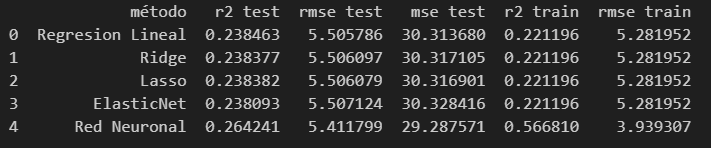

**Conclusiones**

(Vale aclarar que hasta estas conclusiones no habíamos hecho ni regularización ni validación cruzada)

En función de la tabla realizada podemos observar y concluir varias cosas:

* La red neuronal (Red Neuronal) tiene el valor de r^2 de prueba más alto (0.2642), lo que indica que explica la mayor proporción de la variación en los datos de prueba en comparación con los otros modelos.
* También tiene el RMSE de prueba más bajo (5.4118) y el MSE de prueba más bajo (29.2875), lo que sugiere que hace las predicciones más precisas en el conjunto de prueba entre los modelos evaluados.
Desempeño de los Modelos Lineales:
* Como ya habiamos visto en la sección de regresión lineal, los modelos (Regresión Lineal, Ridge, Lasso y ElasticNet) muestran métricas de desempeño muy similares. Sus valores de r^2 de prueba están todos alrededor de 0.238, y sus valores de RMSE de prueba están todos alrededor de 5.506. Esto indica que tienen un desempeño similar en el conjunto de prueba.
Estos modelos también tienen valores idénticos de r^2 de entrenamiento y RMSE de entrenamiento, lo que sugiere que se ajustan a los datos de entrenamiento de manera similar.

* Todos los modelos lineales tienen valores de MSE de prueba más altos (alrededor de 30.31) en comparación con la red neuronal (27.673661), lo que indica que hacen predicciones menos precisas en el conjunto de prueba.
Métricas de Entrenamiento:

La Red Neuronal supera a todos los modelos lineales en el conjunto de prueba en términos de r^2, RMSE y MSE, lo que indica una mejor generalización a datos no vistos.


La Red Neuronal muestra mejores métricas en el conjunto de test, tanto en términos de r^2, RMSE y MSE, lo que sugiere que podría ser el mejor modelo en este caso. Sin embargo, el alto r^2 y bajo RMSE en el conjunto de entrenamiento en comparación con el conjunto de test puede ser indicativo de overfitting.

Por tal caso, y teneiendo en cuenta que la diferencia con las métricas en el resto de los casos es pequeña elegimos como método de regresión lineal Ridge.


Luego de estos resultados decidimos volver a la red neuronal de regresión y volver a calcular las métricas pero ahora utilziando los valores de paramétros obtenidos en la optimización.

**Clasificación**

Recordemos cuales fueron los resultados obtenidos con regresión logística:

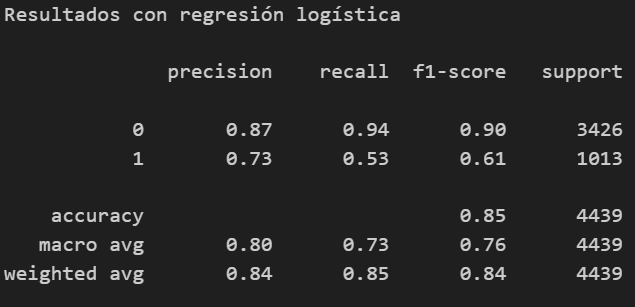

Tabala obtenida utilizando Red Neuronal

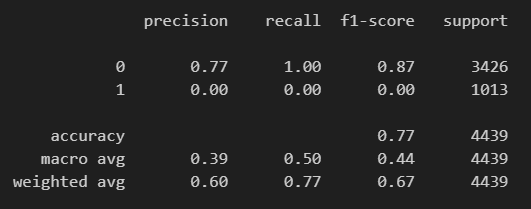

Dado que la regresión logística muestra un rendimiento significativamente mejor en la clase minoritaria (clase 1) y tiene mejores métricas globales, se puede concluir que la regresión logística es el mejor método entre los dos para este problema de clasificación binaria con clases desbalanceadas.

De todos modos lo mejor sería seguir ajustando paramétros, modificar arquitectura de la red, entre otras acciones para lograr que la Red Neuronal pueda predecir la clase 1.
